### Credit Risk Default detection

Our task is to identify high risk potential customers (customers that will not default) so that the lending company's assets are managed well, using the given data.


<br>

### Business objectives and constraints:

1) Cost of mistakes in prediction: Lender will lose a lot of capital if we have more false negatives (we predict high risk customers as low risk).<br>
2) No low latency requirement.<br>
3) Interpretability will play a role in predictions, but accuracy of the predictions matter more for better risk management.<br>
4) We will predict probabilities so that we only accept loans as per our threshold of low chances of defaulting.


<br>

### Evaluation:

We will use logloss for probabilities and auc-score & confusion matrix for evaluating our models

 
 
 <br>

### Importing important libraries:

In [1]:
## For managing data and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split

## Setting some parameters for notebook:
import warnings
np.random.seed(100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

%matplotlib inline

 
 <br>

### Importing data

In [2]:
data = pd.read_csv('final_data.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
print( data.shape )
data.head(2)

(307507, 271)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT NAME_TYPE_SUITE  \
0               Y             0          202500.0    406597.5   Unaccompanied   
1               N             0          270000.0   1293502.5          Family   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0            -2120         -1.0           1                0   
1             -291         -1.0           1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  \
0                 1           1           0                     2   
1                 1           1           0                     1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                       0                       0   
1                           0                       0                       0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   

   YEARS_BEGINEXPLUATATION_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  LANDAREA_AVG  \
0                       0.9722         0.0690         0.0833        0.0369   
1                       0.9851         0.0345         0.2917        0.0130   

   NONLIVINGAREA_AVG EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0             0.0000                  No                       2.0   
1             0.0098                  No                       1.0   

   DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                 -1134.0                0   
1                       0.0                  -828.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0   
1                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0     

 
 <br>

### Missing values:

In [3]:
## NA is not equal to itself

import numpy as np
np.nan == np.nan

False

In [4]:
b = data.isna().sum()
missing = b[b>0].index.tolist()
del b
missing[:5]

['NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

<b>Capturing the missingness of the variables if that has any importance

In [5]:
var = []
for i in missing:
    data[i+'_Missing'] = [0 if j == j else 1 for j in data[i]]

In [6]:
for i in missing:
    print(i)
    print( data[i+'_Missing'].value_counts()/len(data) )
    print('\n')

NAME_TYPE_SUITE
0    0.995798
1    0.004202
Name: NAME_TYPE_SUITE_Missing, dtype: float64


OWN_CAR_AGE
0    0.999984
1    0.000016
Name: OWN_CAR_AGE_Missing, dtype: float64


EXT_SOURCE_1
1    0.563812
0    0.436188
Name: EXT_SOURCE_1_Missing, dtype: float64


EXT_SOURCE_2
0    0.997854
1    0.002146
Name: EXT_SOURCE_2_Missing, dtype: float64


EXT_SOURCE_3
0    0.801744
1    0.198256
Name: EXT_SOURCE_3_Missing, dtype: float64


APARTMENTS_AVG
1    0.507501
0    0.492499
Name: APARTMENTS_AVG_Missing, dtype: float64


BASEMENTAREA_AVG
1    0.585164
0    0.414836
Name: BASEMENTAREA_AVG_Missing, dtype: float64


YEARS_BEGINEXPLUATATION_AVG
0    0.512187
1    0.487813
Name: YEARS_BEGINEXPLUATATION_AVG_Missing, dtype: float64


ENTRANCES_AVG
1    0.503491
0    0.496509
Name: ENTRANCES_AVG_Missing, dtype: float64


FLOORSMAX_AVG
0    0.502389
1    0.497611
Name: FLOORSMAX_AVG_Missing, dtype: float64


LANDAREA_AVG
1    0.593769
0    0.406231
Name: LANDAREA_AVG_Missing, dtype: float64


NONL

In [7]:
data.drop(columns=['OWN_CAR_AGE_Missing'], inplace=True)

In [8]:
del missing

In [9]:
data.shape

(307507, 333)


<br>

### Separating data types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307507 entries, 0 to 307506
Columns: 333 entries, SK_ID_CURR to AMT_INSTALMENT_INSTAL_AVG_Missing
dtypes: float64(68), int64(256), object(9)
memory usage: 781.2+ MB


In [11]:
cat = [i for i in data.columns if data[i].dtype == 'O']
len(cat)

9

In [12]:
cont = [i for i in data.columns if data[i].dtype == 'float64']
# cont.remove('CNT_FAM_MEMBERS')
print(len(cont))

68


In [13]:
disc = [i for i in data.columns if data[i].dtype == 'int64']
# disc.append('CNT_FAM_MEMBERS')
for i in ['SK_ID_CURR', 'TARGET']:
    disc.remove(i)

len(disc)

254

In [14]:
len(cat), len(disc), len(cont), len(cat)+len(disc)+len(cont)

(9, 254, 68, 331)

Makes sense as ID and TARGET are excluded.


<br>

### Removing redundant variables:

In [15]:
data.TARGET.value_counts()/len(data)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

In [16]:
skewed_vars = []

for i in data.columns:
    if (data[i].value_counts().sort_values(ascending=False)/len(data)).iloc[0] > 0.95:
        skewed_vars.append(i)
# skewed_vars.remove('TARGET')
skewed_vars = [i for i in skewed_vars if 'Missing' not in i]
skewed_vars

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'CREDIT_ACTIVE_BUREAU_Bad debt',
 'CREDIT_ACTIVE_BUREAU_Sold',
 'CREDIT_CURRENCY_BUREAU_currency 1',
 'CREDIT_CURRENCY_BUREAU_currency 2',
 'CREDIT_CURRENCY_BUREAU_currency 4',
 'CREDIT_TYPE_BUREAU_Another type of loan',
 'CREDIT_TYPE_BUREAU_Car loan',
 'CREDIT_TYPE_BUREAU_Cash loan (non-earmarked)',
 'CREDIT_TYPE_BUREAU_Loan for business development',
 'CREDIT_TYPE_BUREAU_Loan for purchase of shares (margin lending)',
 'CREDIT_TYPE_BUREAU_Loan for the purchase of equipment',
 'CREDIT_TYPE_BUREAU_Loan for working capital replenishment',
 'CREDIT_TYPE_BUREAU_Microloan',
 'CR

In [17]:
len(data.columns) - len(skewed_vars)

197

In [18]:
data.drop(columns=skewed_vars, inplace=True)
data.shape

(307507, 197)

In [19]:
cont = [i for i in cont if i not in skewed_vars]
disc = [i for i in disc if i not in skewed_vars]

 
<br>

### Data quality checks

<b>Converting days variables to years

In [20]:
days = [i for i in data.columns if 'DAYS' in i]
days[:5]

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [21]:
import re
years = [re.sub('DAY','YEAR',i) for i in days]

In [22]:
cont = [i for i in cont if i not in days]
disc = [i for i in disc if i not in days]
        
cont.extend(years)

In [23]:
rename_dict = {i:j for i,j in zip(days, years)}
rename_dict

{'DAYS_BIRTH': 'YEARS_BIRTH',
 'DAYS_EMPLOYED': 'YEARS_EMPLOYED',
 'DAYS_REGISTRATION': 'YEARS_REGISTRATION',
 'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE': 'YEARS_LAST_PHONE_CHANGE',
 'DAYS_FIRST_DRAWING_PREV_MIN': 'YEARS_FIRST_DRAWING_PREV_MIN',
 'DAYS_FIRST_DUE_PREV_MIN': 'YEARS_FIRST_DUE_PREV_MIN',
 'DAYS_LAST_DUE_1ST_VERSION_PREV_MIN': 'YEARS_LAST_DUE_1ST_VERSION_PREV_MIN',
 'DAYS_LAST_DUE_PREV_MIN': 'YEARS_LAST_DUE_PREV_MIN',
 'DAYS_FIRST_DUE_PREV_MAX': 'YEARS_FIRST_DUE_PREV_MAX',
 'DAYS_LAST_DUE_PREV_MAX': 'YEARS_LAST_DUE_PREV_MAX',
 'DAYS_LAST_PHONE_CHANGE_Missing': 'YEARS_LAST_PHONE_CHANGE_Missing',
 'DAYS_FIRST_DRAWING_PREV_MIN_Missing': 'YEARS_FIRST_DRAWING_PREV_MIN_Missing',
 'DAYS_FIRST_DUE_PREV_MIN_Missing': 'YEARS_FIRST_DUE_PREV_MIN_Missing',
 'DAYS_LAST_DUE_1ST_VERSION_PREV_MIN_Missing': 'YEARS_LAST_DUE_1ST_VERSION_PREV_MIN_Missing',
 'DAYS_LAST_DUE_PREV_MIN_Missing': 'YEARS_LAST_DUE_PREV_MIN_Missing',
 'DAYS_FIRST_DUE_PREV_MAX_Missing': 'YEARS_FIRST

In [24]:
data.rename(columns=rename_dict, inplace=True)
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT NAME_TYPE_SUITE  \
0               Y             0          202500.0    406597.5   Unaccompanied   
1               N             0          270000.0   1293502.5          Family   
2               Y             0           67500.0    135000.0   Unaccompanied   
3               Y             0          135000.0    312682.5   Unaccompanied   
4               Y             0          121500.0    513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801        -9461            -637   
1                    0.003541       -16765           -1188   
2                    0.010032       -19046            -225   
3                    0.008019       -19005           -3039   
4                    0.028663       -19932           -3038   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  \
0             -3648.0             -2120         -1.0                0   
1             -1186.0              -291         -1.0                0   
2             -4260.0             -2531         26.0                1   
3             -9833.0             -2437         -1.0                0   
4             -4311.0             -3458         -1.0                0   

   FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
0           1           0                     2                       10   
1           1           0                     1                       11   
2           1           0                     2                        9   
3           0           0                     2                       17   
4           0           0                     2                       11   

   REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   
3           NaN      0.650442           NaN             NaN               NaN   
4           NaN      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  LANDAREA_AVG  \
0                       0.9722         0.0690         0.0833        0.0369   
1                       0.9851         0.0345         0.2917        0.0130   
2                          NaN            NaN            NaN           NaN   
3                          NaN            NaN            NaN           NaN   
4                

In [25]:
for i in years:
    data[i] = [-1*i/365 if i!=0 else i for i in data[i]]

In [26]:
del years; del days; del skewed_vars

Check negative values for years variables and delete/impute

In [45]:
data.describe()

SK_ID_CURR        TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307507.000000  307507.00000  307507.000000      3.075070e+05   
mean   278181.527256       0.08073       0.417047      1.687977e+05   
std    102790.132982       0.27242       0.722119      2.371246e+05   
min    100002.000000       0.00000       0.000000      2.565000e+04   
25%    189146.500000       0.00000       0.000000      1.125000e+05   
50%    278203.000000       0.00000       0.000000      1.471500e+05   
75%    367143.500000       0.00000       1.000000      2.025000e+05   
max    456255.000000       1.00000      19.000000      1.170000e+08   

         AMT_CREDIT  REGION_POPULATION_RELATIVE    YEARS_BIRTH  \
count  3.075070e+05               307507.000000  307507.000000   
mean   5.990286e+05                    0.020868      43.937061   
std    4.024926e+05                    0.013831      11.956116   
min    4.500000e+04                    0.000290      20.517808   
25%    2.700000e+05                    0.010006      34.008219   
50%    5.135310e+05                    0.018850      43.150685   
75%    8.086500e+05                    0.028663      53.923288   
max    4.050000e+06                    0.072508      69.120548   

       YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH    OWN_CAR_AGE  \
count   307507.000000       307507.000000     307507.000000  307502.000000   
mean         5.355672           13.660634          8.203292       3.442026   
std          6.320649            9.651734          4.135492       9.317255   
min          0.000000            0.000000          0.000000      -1.000000   
25%          0.791781            5.506849          4.712329      -1.000000   
50%          3.323288           12.339726          8.915068      -1.000000   
75%          7.561644           20.491781         11.778082       5.000000   
max         49.073973           67.594521         19.717808      91.000000   

       FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  REGION_RATING_CLIENT  \
count    307507.000000  307507.000000  307507.000000         307507.000000   
mean          0.199358       0.281057       0.056721              2.052461   
std           0.399518       0.449516       0.231308              0.509034   
min           0.000000       0.000000       0.000000              1.000000   
25%           0.000000       0.000000       0.000000              2.000000   
50%           0.000000       0.000000       0.000000              2.000000   
75%           0.000000       1.000000       0.000000              2.000000   
max           1.000000       1.000000       1.000000              3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
count            307507.000000               307507.000000   
mean                 12.063394                    0.050770   
std                   3.265835                    0.219527   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY   EXT_SOURCE_1  \
count           307507.000000           307507.000000  134131.000000   
mean                 0.078174                0.230457       0.502129   
std                  0.268445                0.421126       0.211063   
min                  0.000000                0.000000       0.014568   
25%                  0.000000                0.000000       0.334007   
50%                  0.000000                0.000000       0.505998   
75%                  0.000000                0.000000       0.675057   
max                  1.000000                1.000000       0.962693   

       EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
count  3.068470e+05  246542.000000   151447.000000     127565.000000   
mean   5.143918e-


<br>

1) 19 Children is a bit too unusual, might have to treat.<br>
2) Years employed for next 1000 years in future is improper.<br>
3) YEARS_FIRST_DUE_PREV_MIN, YEARS_LAST_DUE_1ST_VERSION_PREV_MIN, YEARS_LAST_DUE_PREV_MIN, YEARS_FIRST_DUE_PREV_MAX, YEARS_LAST_DUE_PREV_MAX,  also has an unusual value of 100.<br>


<br>

In [41]:
for i in [i for i in data.columns if 'YEARS' in i]:
    data.loc[data[i] < 0, i] = data[data[i] >= 0][i].quantile(0)

In [43]:
data.drop(columns=['YEARS_FIRST_DRAWING_PREV_MIN', 'YEARS_FIRST_DUE_PREV_MAX', 'YEARS_LAST_DUE_PREV_MAX', 
                   'YEARS_BEGINEXPLUATATION_AVG_Missing', 'YEARS_LAST_PHONE_CHANGE_Missing', 
                   'YEARS_FIRST_DRAWING_PREV_MIN_Missing', 'YEARS_FIRST_DUE_PREV_MIN_Missing', 
                   'YEARS_LAST_DUE_1ST_VERSION_PREV_MIN_Missing', 'YEARS_LAST_DUE_PREV_MIN_Missing',
                   'YEARS_FIRST_DUE_PREV_MAX_Missing', 'YEARS_LAST_DUE_PREV_MAX_Missing'], inplace=True)

In [72]:
for i in ['YEARS_FIRST_DRAWING_PREV_MIN', 'YEARS_FIRST_DUE_PREV_MAX', 'YEARS_LAST_DUE_PREV_MAX', 'YEARS_BEGINEXPLUATATION_AVG_Missing', 'YEARS_LAST_PHONE_CHANGE_Missing', 'YEARS_FIRST_DRAWING_PREV_MIN_Missing', 'YEARS_FIRST_DUE_PREV_MIN_Missing', 'YEARS_LAST_DUE_1ST_VERSION_PREV_MIN_Missing', 'YEARS_LAST_DUE_PREV_MIN_Missing', 'YEARS_FIRST_DUE_PREV_MAX_Missing', 'YEARS_LAST_DUE_PREV_MAX_Missing']:
    try:
        cont.remove(i)
    except:
        print(i,' not in list')

YEARS_FIRST_DRAWING_PREV_MIN  not in list
YEARS_FIRST_DUE_PREV_MAX  not in list
YEARS_LAST_DUE_PREV_MAX  not in list
YEARS_BEGINEXPLUATATION_AVG_Missing  not in list


In [46]:
data.CNT_CHILDREN.quantile(0.999)

4.0

In [49]:
temp = data[ data['CNT_CHILDREN'] >= data.CNT_CHILDREN.quantile(0.999) ]
print(temp.shape)
# temp[['CNT_CHILDREN','TARGET']]
temp['TARGET'].value_counts()

(555, 186)


0    484
1     71
Name: TARGET, dtype: int64

These families with an unusual number of kids have mostly 1 or 2 parents and most of them are not defaulting, seem like anamolous data. Let's drop them.

In [50]:
data = data[ data['CNT_CHILDREN'] < data.CNT_CHILDREN.quantile(0.999) ]
data.shape

(306952, 186)


<br>

In [51]:
train, test = train_test_split(data, test_size=0.3)

In [52]:
train.shape, test.shape

((214866, 186), (92086, 186))


<br> 

### Checking distributions of the variables

<b>Target variable

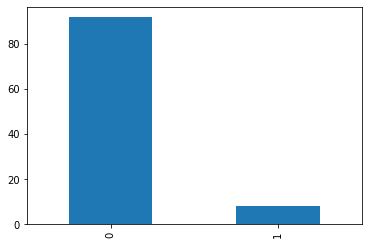

In [53]:
( train.TARGET.value_counts()/len(train)*100).plot.bar()
plt.show()

<b>Categoric

In [54]:
def check_cat_print(df, cat_vars):
    for i in cat_vars:
        print(i)
        print(df[i].value_counts().sort_values(ascending=False))
        print('\n')
        print(df[i].value_counts().sort_values(ascending=False)/len(df)*100)
        print('='*90)
        print('\n')
        
check_cat_print(train, cat)

NAME_CONTRACT_TYPE
Cash loans         194451
Revolving loans     20415
Name: NAME_CONTRACT_TYPE, dtype: int64


Cash loans         90.498729
Revolving loans     9.501271
Name: NAME_CONTRACT_TYPE, dtype: float64


CODE_GENDER
F    141580
M     73286
Name: CODE_GENDER, dtype: int64


F    65.892231
M    34.107769
Name: CODE_GENDER, dtype: float64


FLAG_OWN_CAR
N    141920
Y     72946
Name: FLAG_OWN_CAR, dtype: int64


N    66.050469
Y    33.949531
Name: FLAG_OWN_CAR, dtype: float64


FLAG_OWN_REALTY
Y    149037
N     65829
Name: FLAG_OWN_REALTY, dtype: int64


Y    69.362766
N    30.637234
Name: FLAG_OWN_REALTY, dtype: float64


NAME_TYPE_SUITE
Unaccompanied      173669
Family              28013
Spouse, partner      7924
Children             2305
Other_B              1241
Other_A               603
Group of people       193
Name: NAME_TYPE_SUITE, dtype: int64


Unaccompanied      80.826655
Family             13.037428
Spouse, partner     3.687880
Children            1.072762
Other_B     

1. Check if NAME_TYPE_SUITE can be binarized.
2. Check if NAME_CONTRACT_TYPE can be dropped.
3. In NAME_INCOME_TYPE and NAME_EDUCATION_TYPE can categories be combined?
4. In NAME_FAMILY_STATUS, can Unknown category be dropped?
5. NAME_HOUSING_TYPE category combine.
6. WEEKDAY_APPR_PROCESS_START might not be important.
7. OCCUPATION_TYPE can categories be combined?
8. Too many categories in ORGANIZATION_TYPE, drop/do feature engineering.
9. drop HOUSETYPE_MODE and EMERGENCYSTATE_MODE.
10. Handle cardinality in WALLSMATERIAL_MODE.

In [62]:
train.drop(columns=['EMERGENCYSTATE_MODE'], inplace=True)
test.drop(columns=['EMERGENCYSTATE_MODE'], inplace=True)

for i in ['EMERGENCYSTATE_MODE']:
    cat.remove(i)

NAME_CONTRACT_TYPE


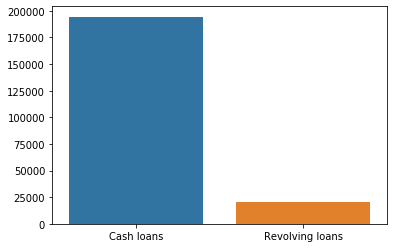

CODE_GENDER


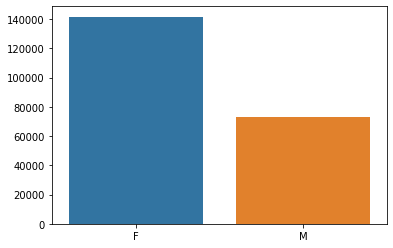

FLAG_OWN_CAR


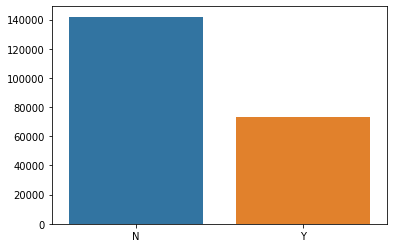

FLAG_OWN_REALTY


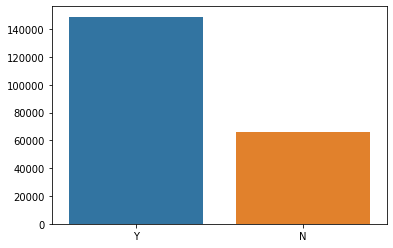

NAME_TYPE_SUITE


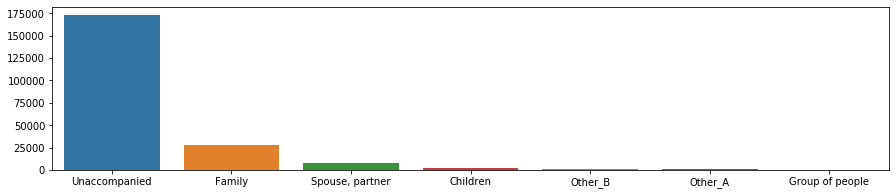

NAME_INCOME_TYPE


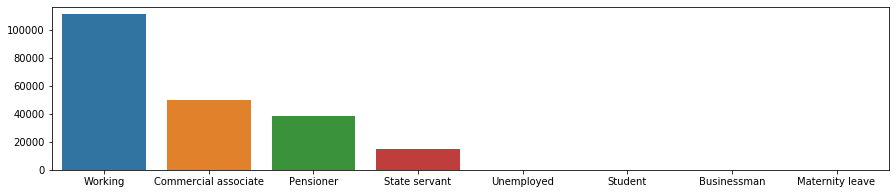

NAME_EDUCATION_TYPE


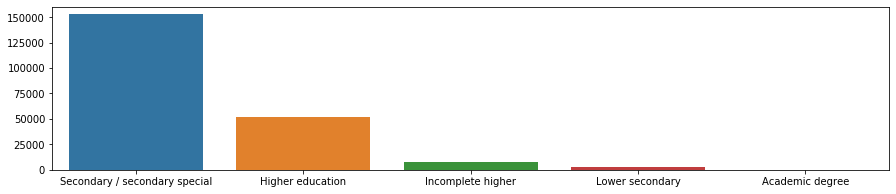

NAME_FAMILY_STATUS


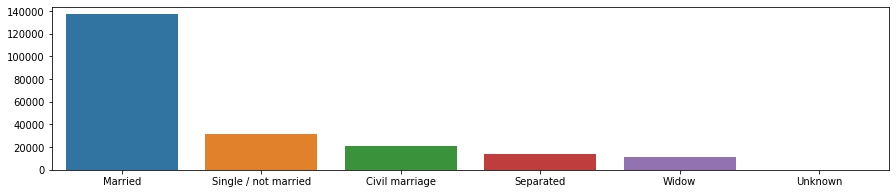

CNT_CHILDREN


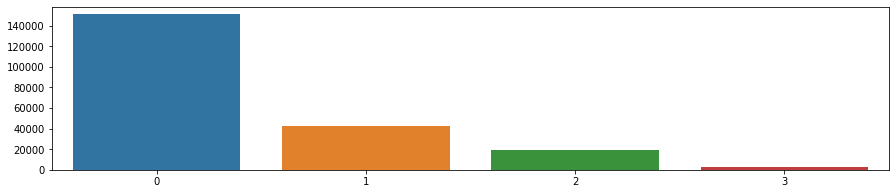

FLAG_WORK_PHONE


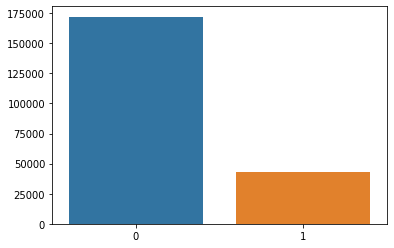

FLAG_PHONE


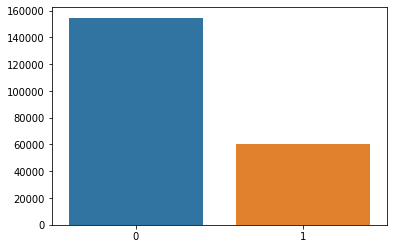

FLAG_EMAIL


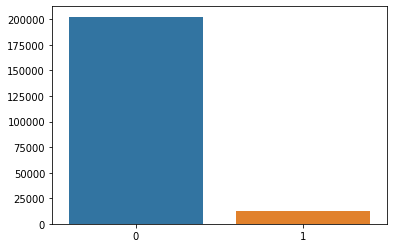

REGION_RATING_CLIENT


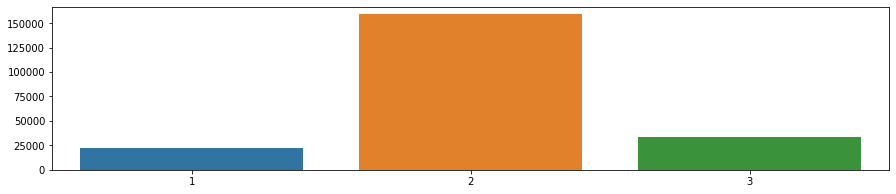

HOUR_APPR_PROCESS_START


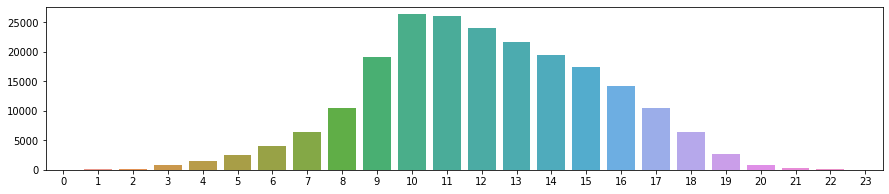

REG_REGION_NOT_WORK_REGION


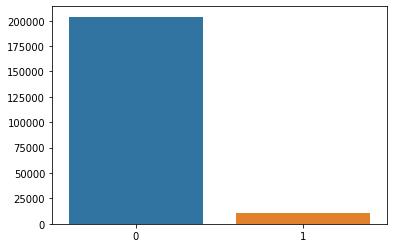

REG_CITY_NOT_LIVE_CITY


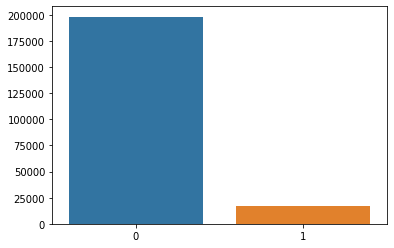

REG_CITY_NOT_WORK_CITY


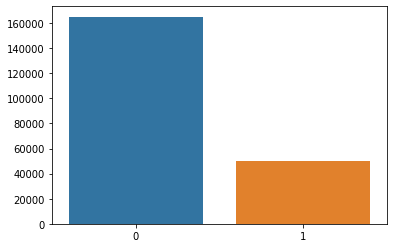

FLAG_DOCUMENT_3


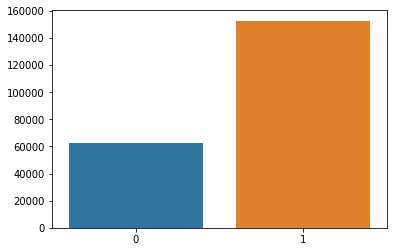

FLAG_DOCUMENT_6


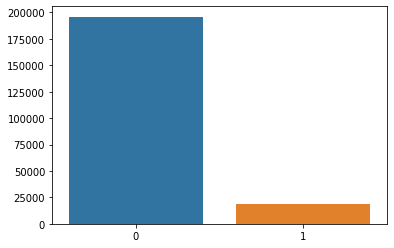

FLAG_DOCUMENT_8


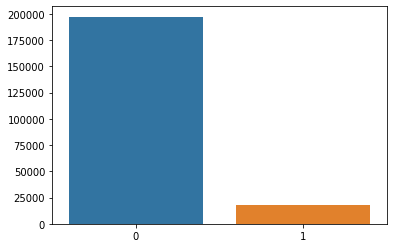

NO_OF_DOCS_SUBMITTED


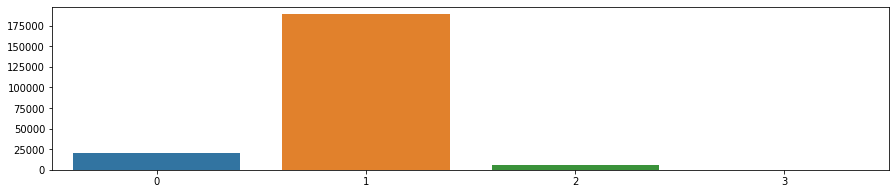

CREDIT_ACTIVE_BUREAU_Active


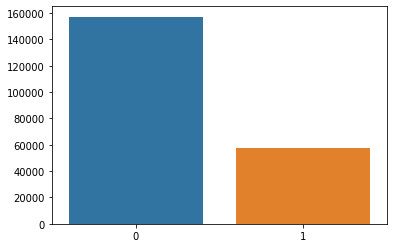

CREDIT_TYPE_BUREAU_Consumer credit


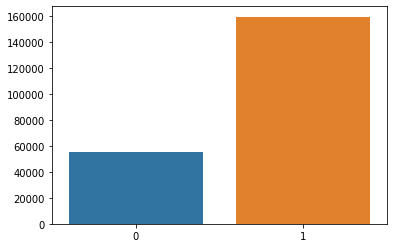

STATUS_BUREAU_BAL_0


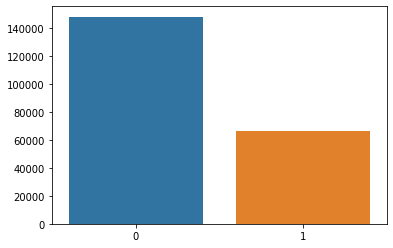

STATUS_BUREAU_BAL_C


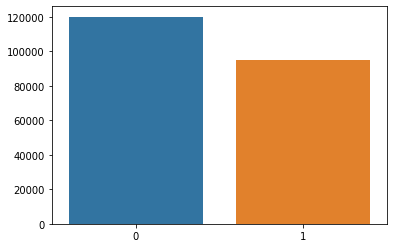

STATUS_BUREAU_BAL_X


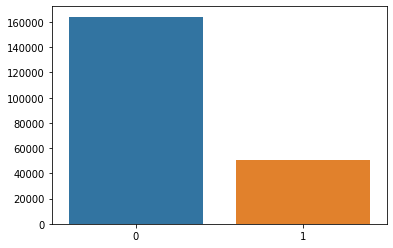

NAME_CONTRACT_STATUS_POS_Active


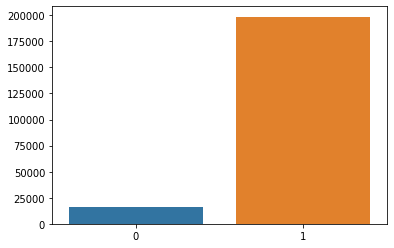

NAME_CONTRACT_TYPE_PREV_Cash loans


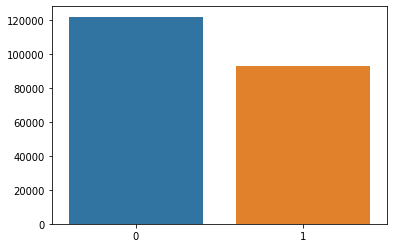

NAME_CONTRACT_TYPE_PREV_Revolving loans


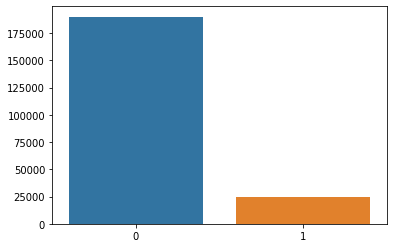

WEEKDAY_APPR_PROCESS_START_PREV_FRIDAY


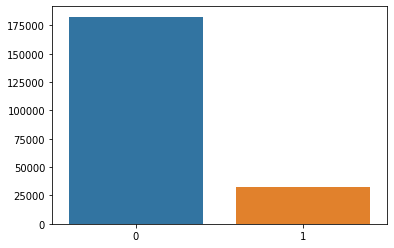

WEEKDAY_APPR_PROCESS_START_PREV_MONDAY


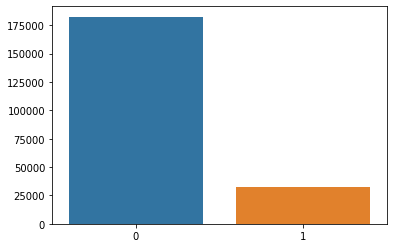

WEEKDAY_APPR_PROCESS_START_PREV_SATURDAY


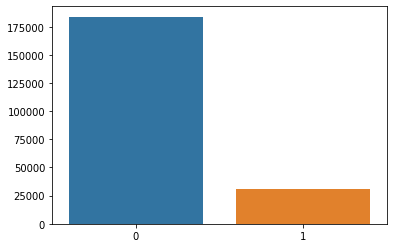

WEEKDAY_APPR_PROCESS_START_PREV_SUNDAY


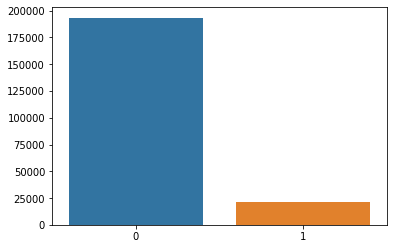

WEEKDAY_APPR_PROCESS_START_PREV_THURSDAY


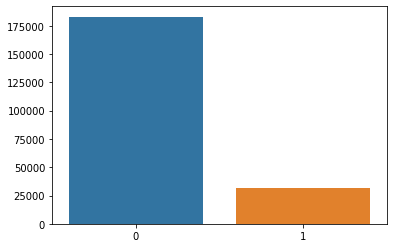

WEEKDAY_APPR_PROCESS_START_PREV_TUESDAY


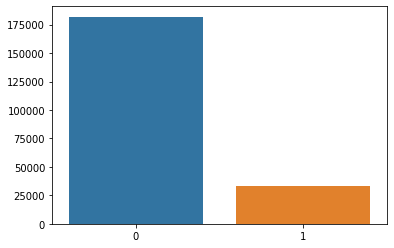

WEEKDAY_APPR_PROCESS_START_PREV_WEDNESDAY


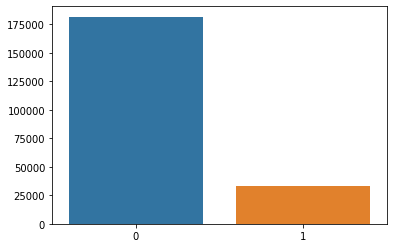

NAME_CONTRACT_STATUS_PREV_Approved


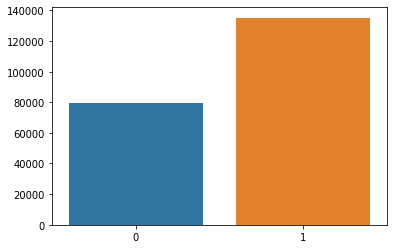

NAME_CONTRACT_STATUS_PREV_Canceled


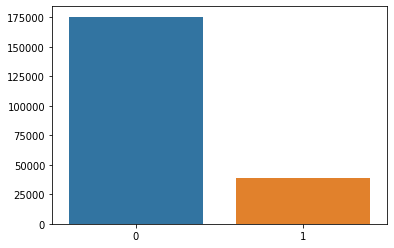

NAME_CONTRACT_STATUS_PREV_Refused


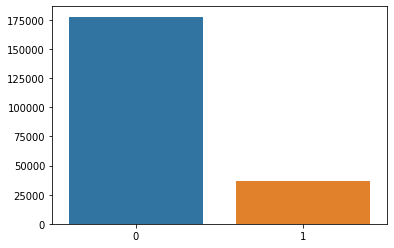

NAME_PAYMENT_TYPE_PREV_Cash through the bank


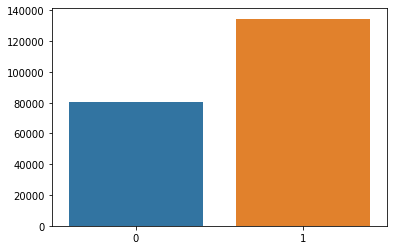

NAME_TYPE_SUITE_PREV_Family


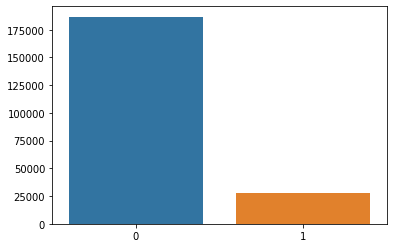

NAME_TYPE_SUITE_PREV_Unaccompanied


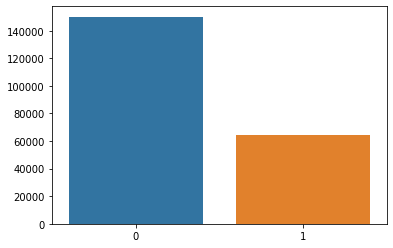

NAME_CLIENT_TYPE_PREV_New


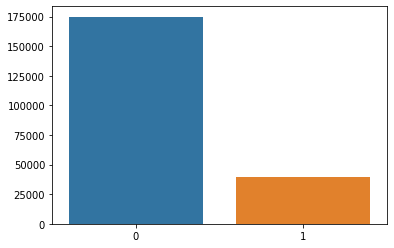

NAME_CLIENT_TYPE_PREV_Refreshed


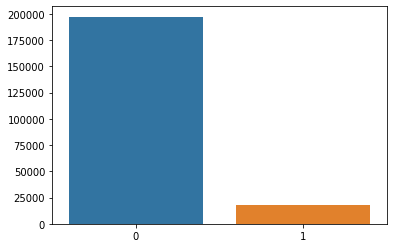

NAME_GOODS_CATEGORY_PREV_Audio/Video


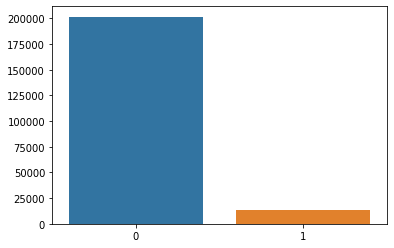

NAME_GOODS_CATEGORY_PREV_Computers


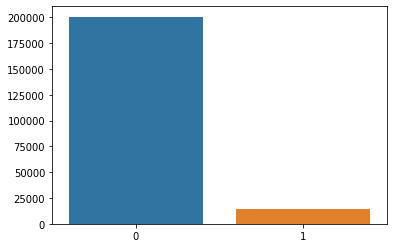

NAME_GOODS_CATEGORY_PREV_Consumer Electronics


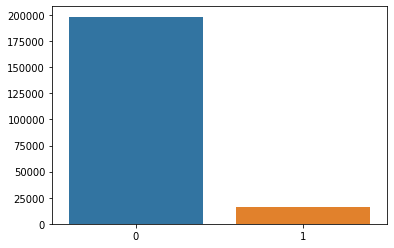

NAME_GOODS_CATEGORY_PREV_Mobile


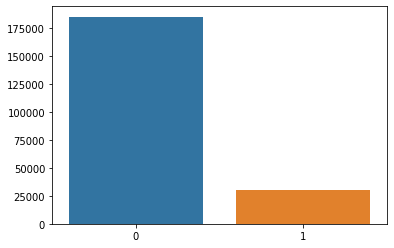

NAME_PORTFOLIO_PREV_Cash


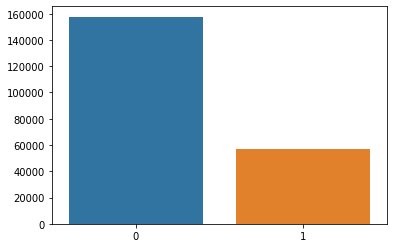

NAME_PRODUCT_TYPE_PREV_walk-in


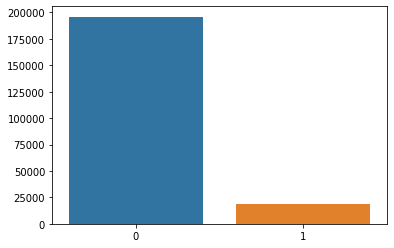

CHANNEL_TYPE_PREV_Country-wide


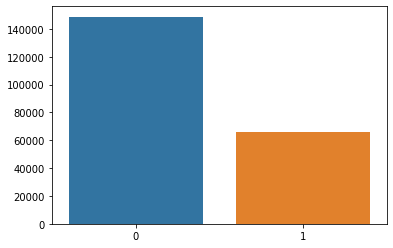

CHANNEL_TYPE_PREV_Regional / Local


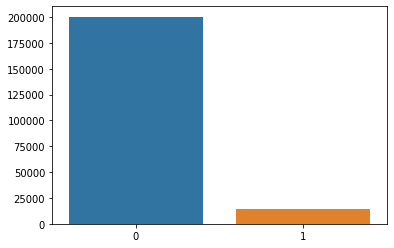

CHANNEL_TYPE_PREV_Stone


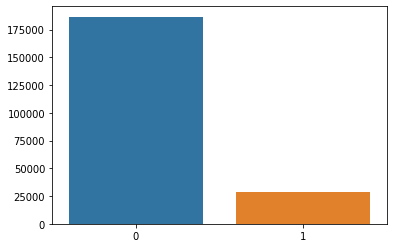

NAME_SELLER_INDUSTRY_PREV_Consumer electronics


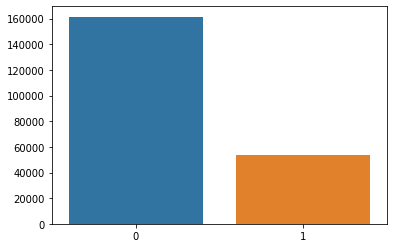

NAME_YIELD_GROUP_PREV_high


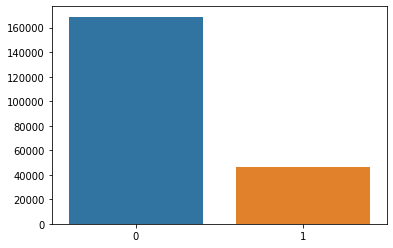

NAME_YIELD_GROUP_PREV_low_action


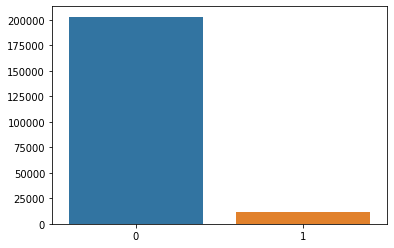

NAME_YIELD_GROUP_PREV_low_normal


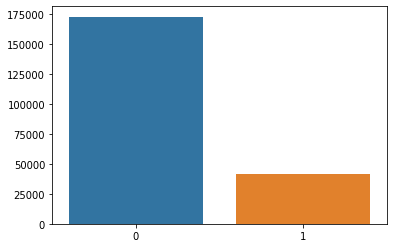

NAME_YIELD_GROUP_PREV_middle


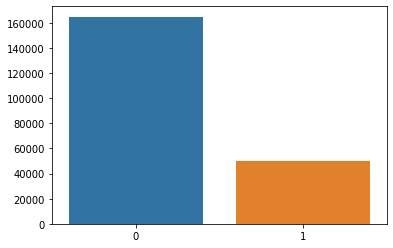

PRODUCT_COMBINATION_PREV_Cash X-Sell: low


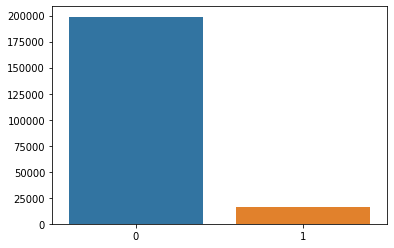

PRODUCT_COMBINATION_PREV_Cash X-Sell: middle


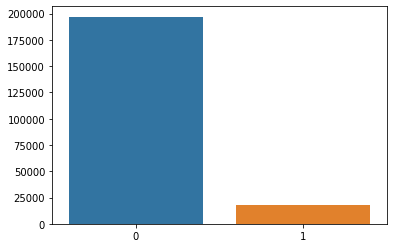

PRODUCT_COMBINATION_PREV_POS household without interest


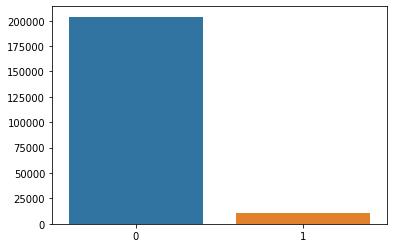

PRODUCT_COMBINATION_PREV_POS industry with interest


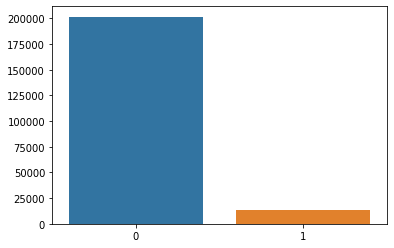

NAME_TYPE_SUITE_Missing


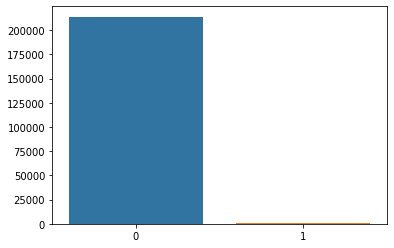

EXT_SOURCE_1_Missing


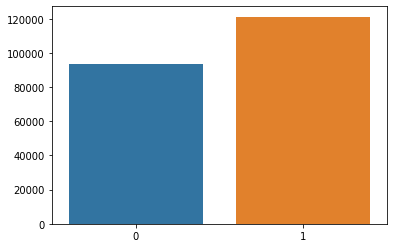

EXT_SOURCE_2_Missing


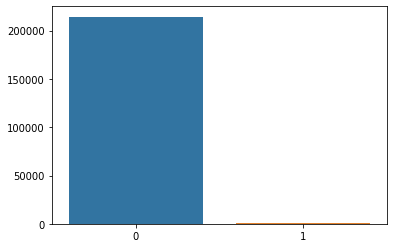

EXT_SOURCE_3_Missing


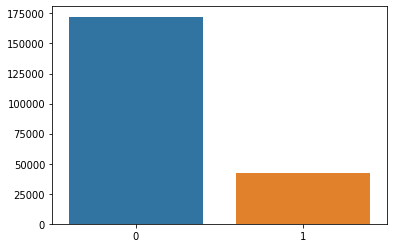

APARTMENTS_AVG_Missing


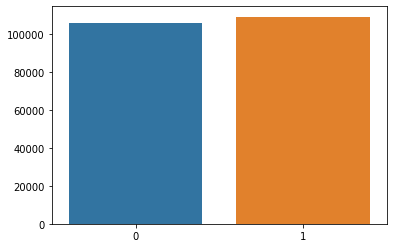

BASEMENTAREA_AVG_Missing


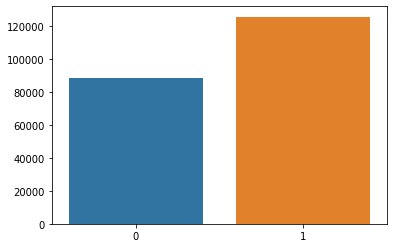

KeyError: 'YEARS_BEGINEXPLUATATION_AVG_Missing'

In [63]:
def check_dist_catdisc(df, cat_vars, disc_vars):
    for i in cat_vars + disc_vars:
        b = df[i].value_counts()
        if len(b) > 2:
            plt.figure(figsize=(15,3))
        print(i)
        sns.barplot(b.index, b.values)
        plt.show()

check_dist_catdisc(train, cat, disc)


<br>

<b>Numeric

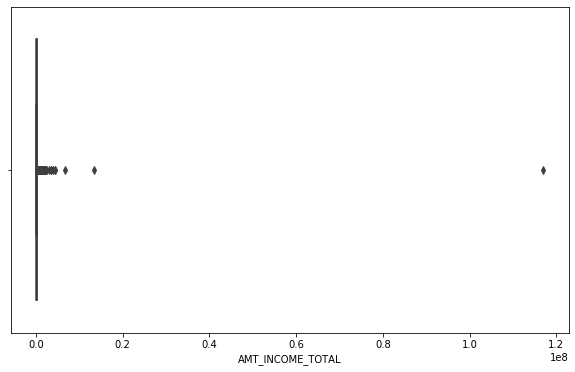

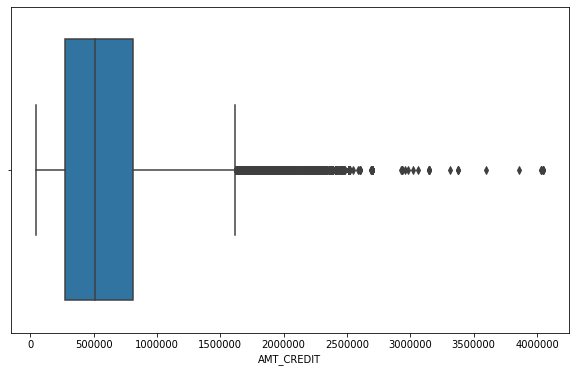

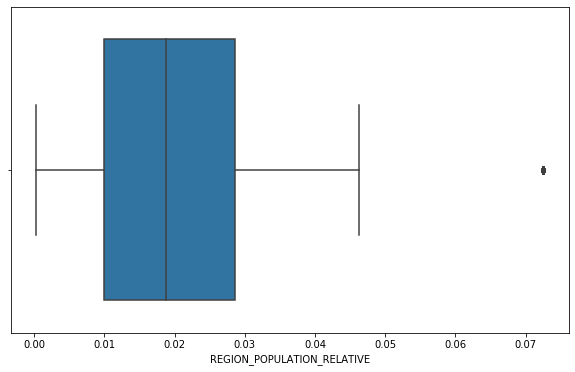

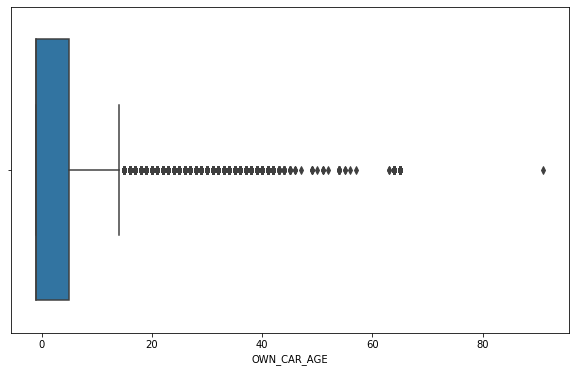

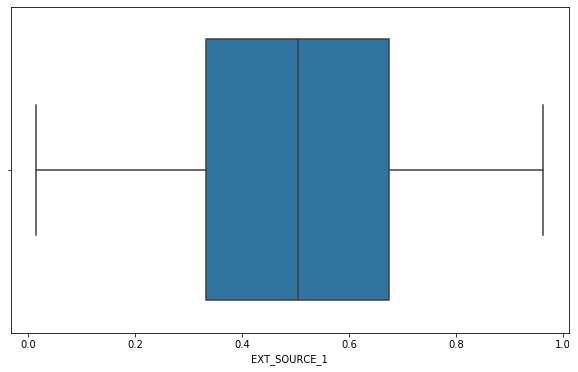

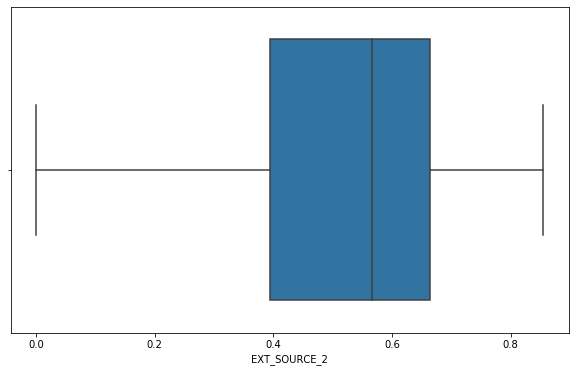

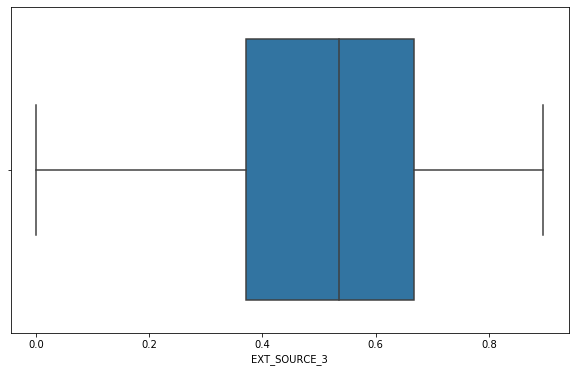

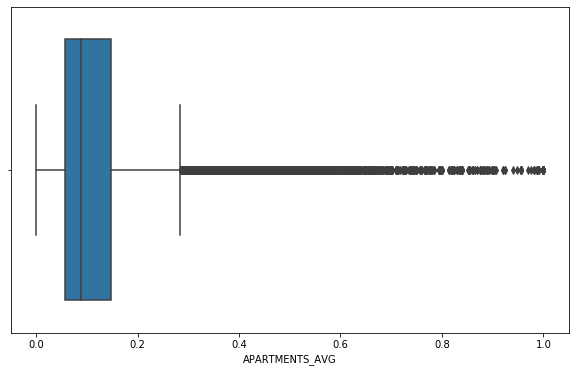

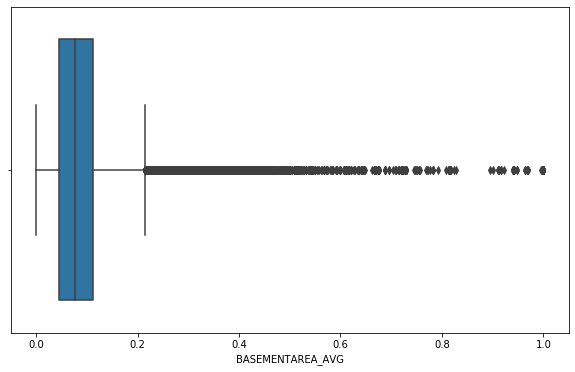

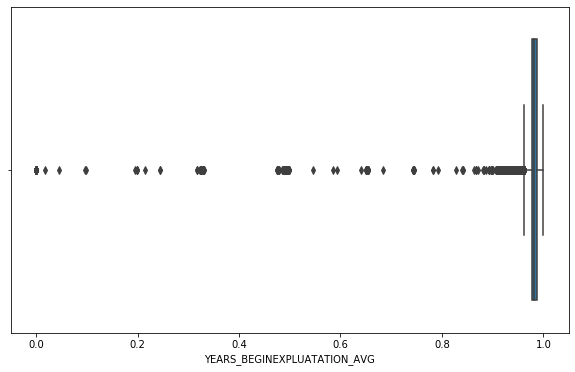

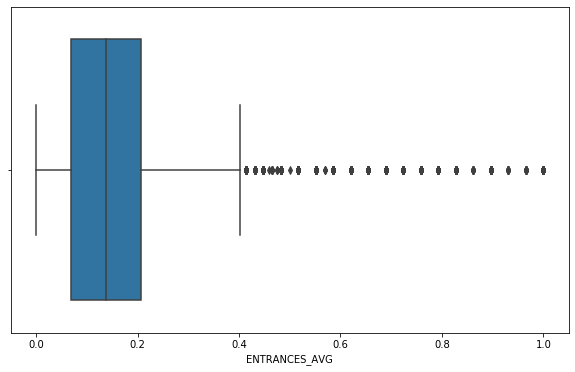

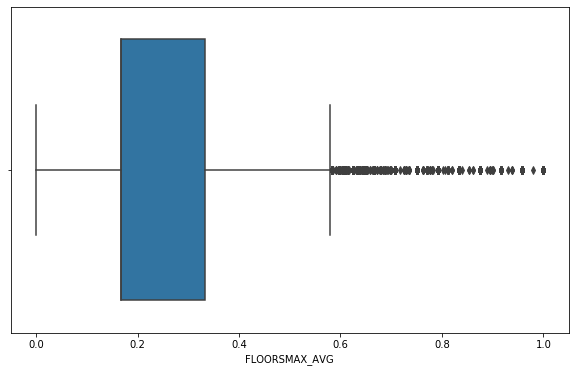

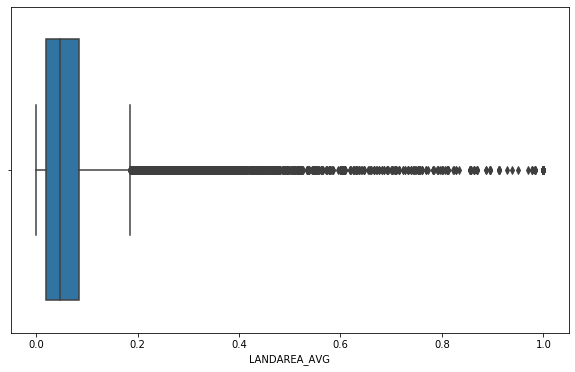

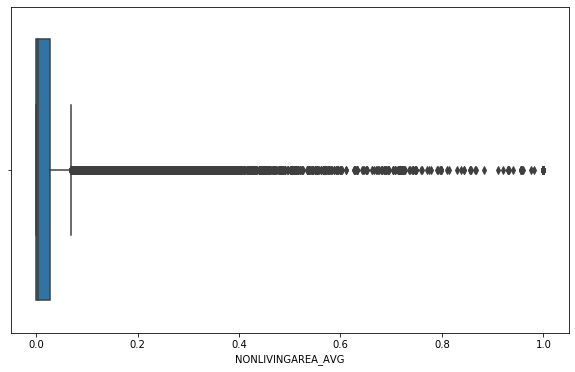

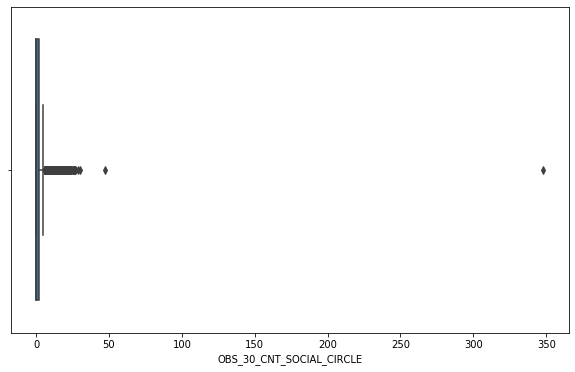

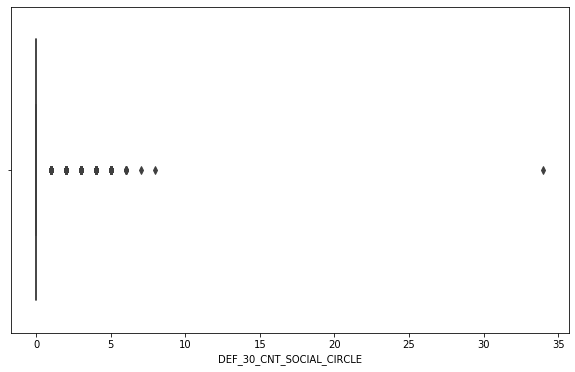

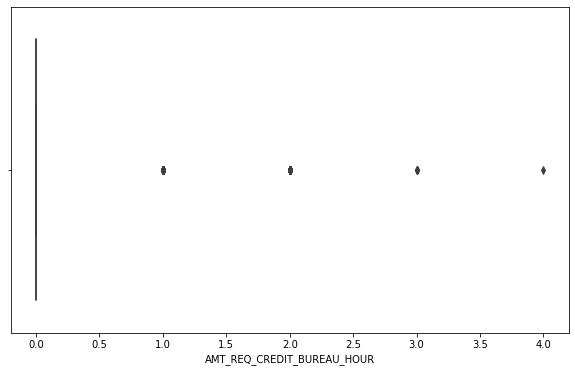

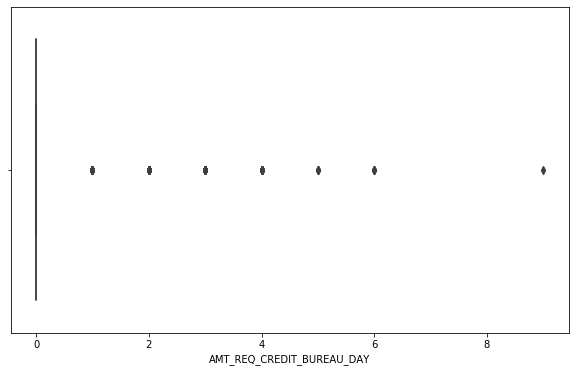

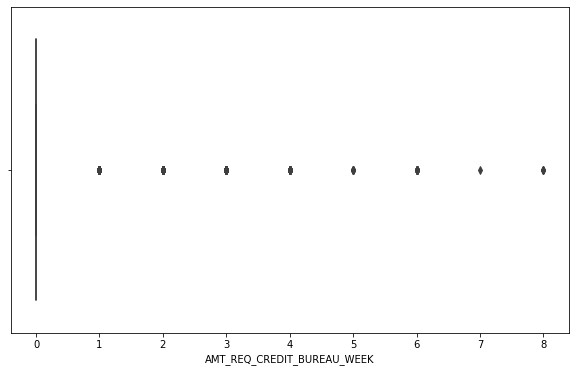

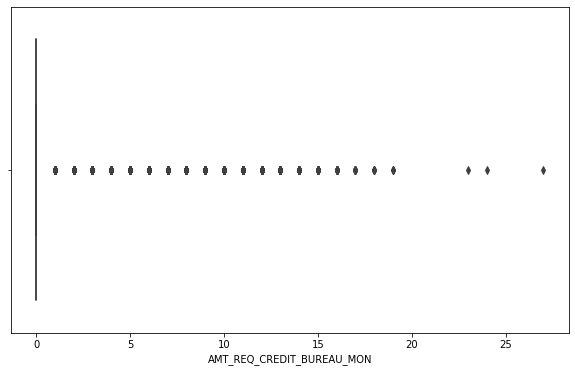

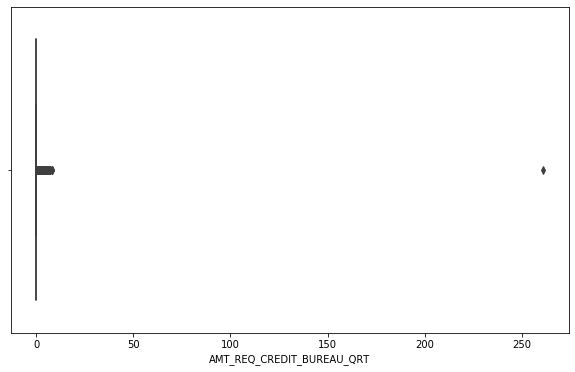

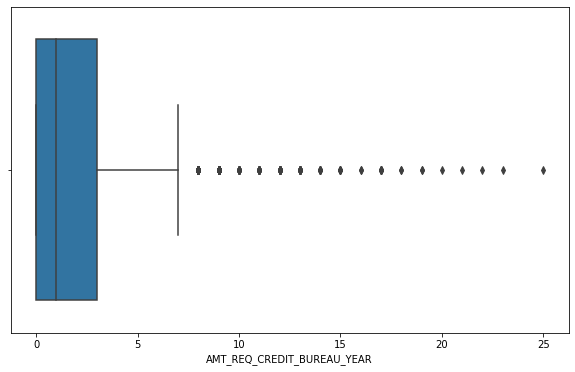

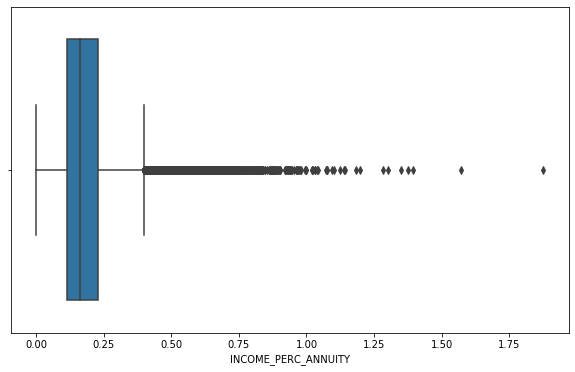

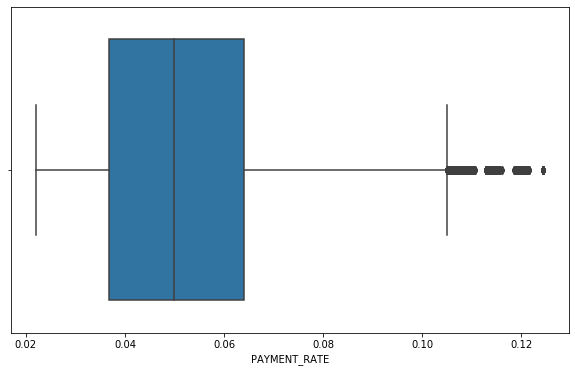

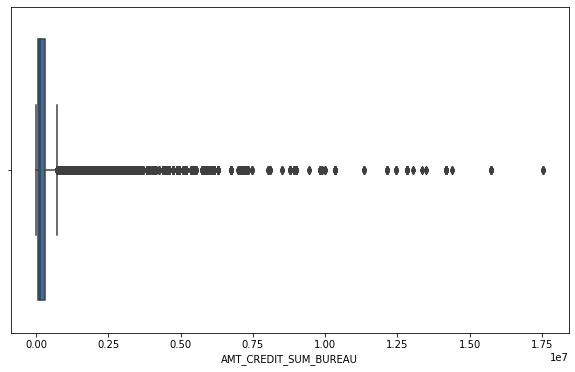

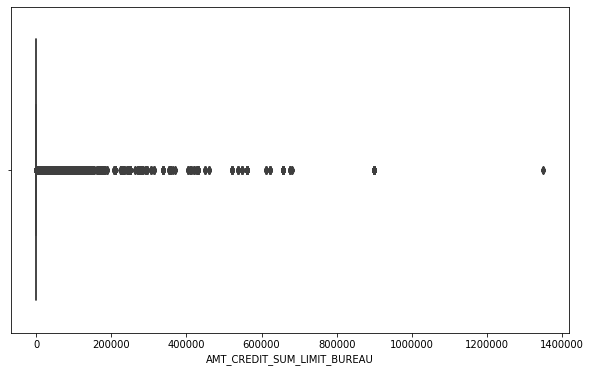

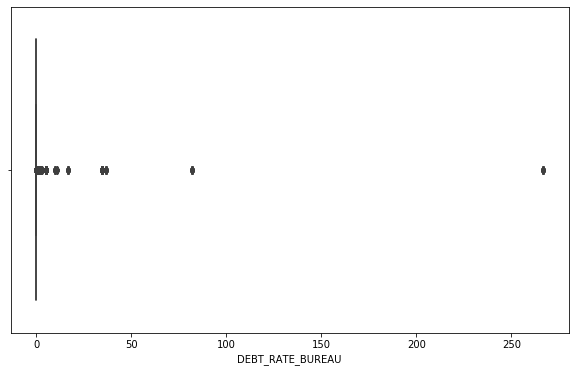

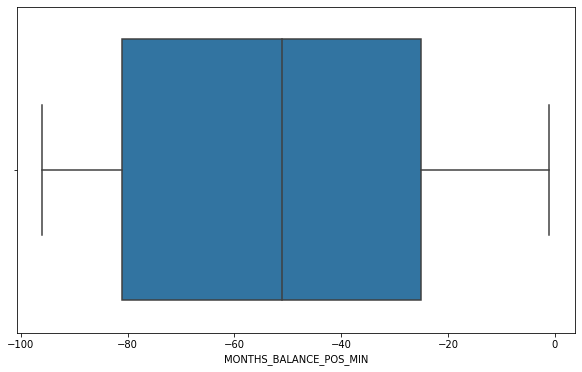

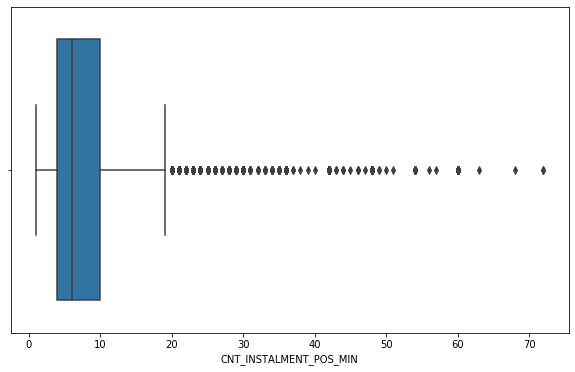

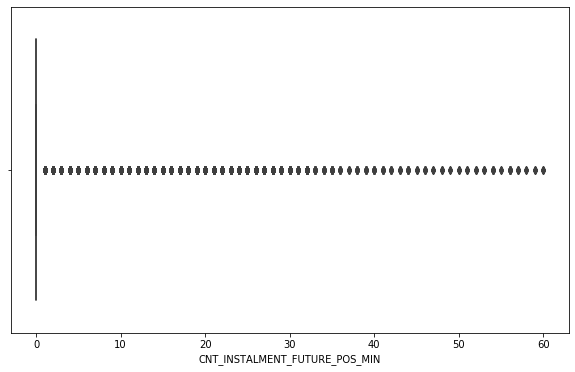

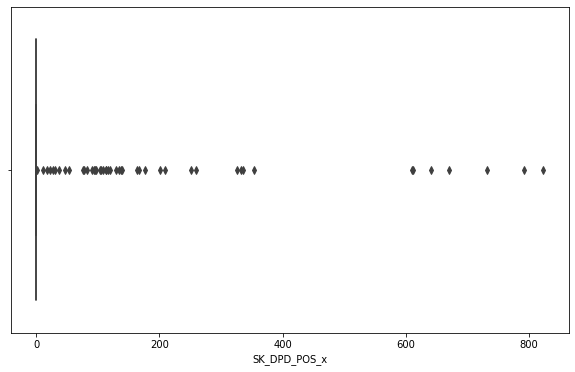

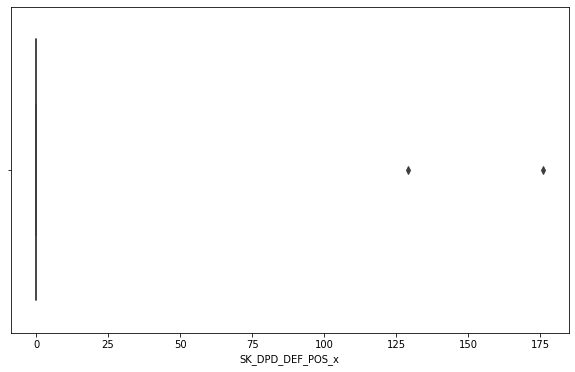

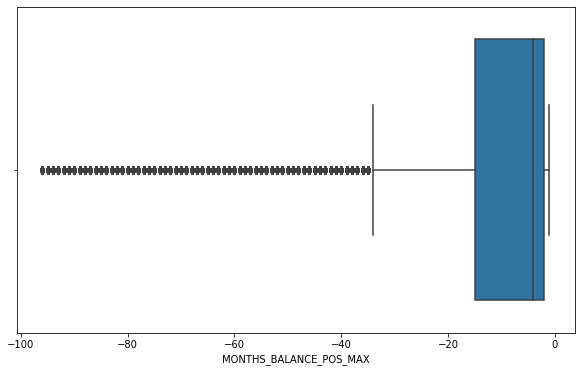

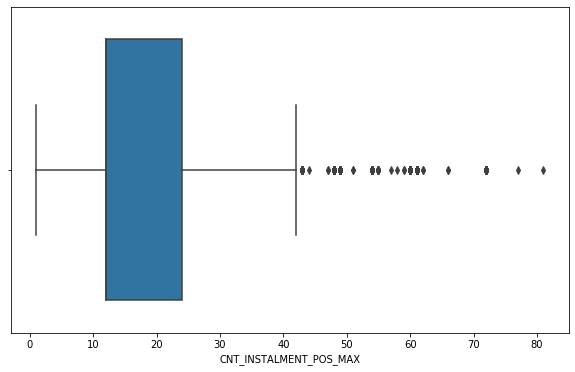

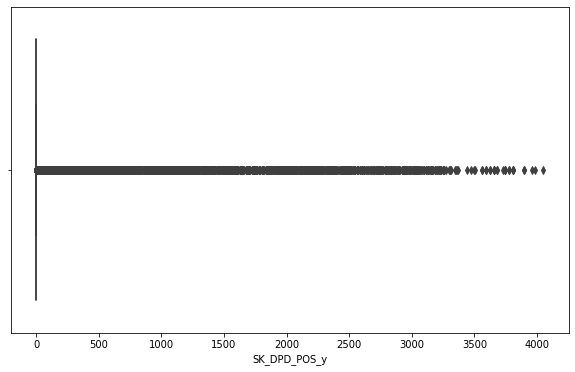

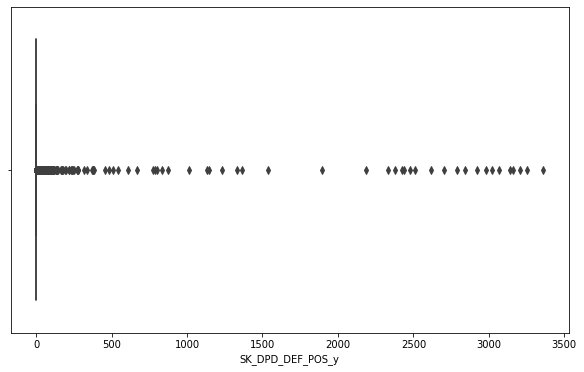

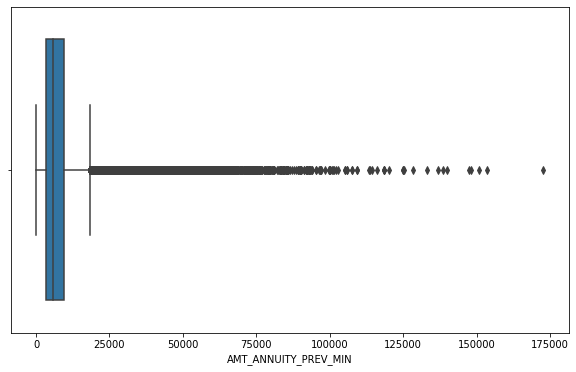

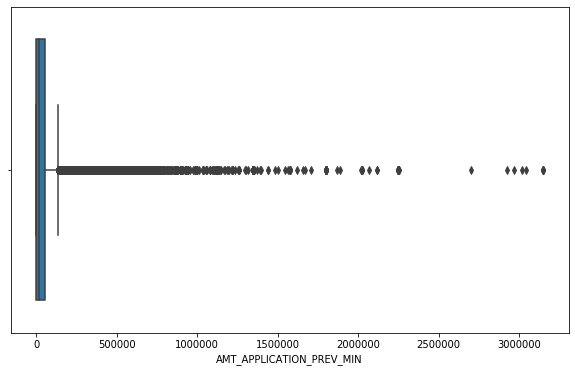

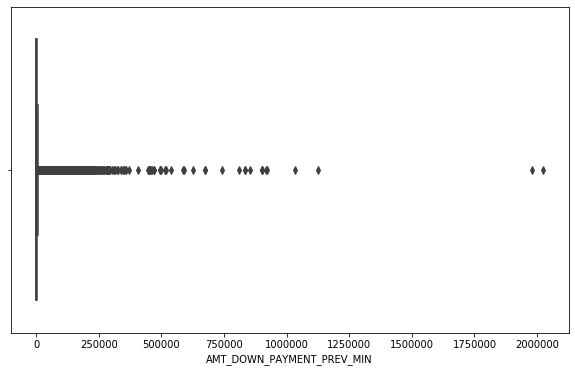

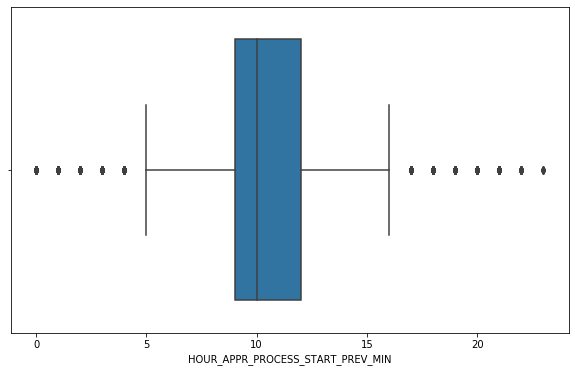

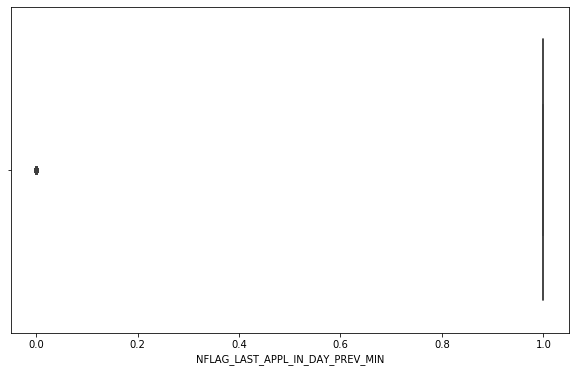

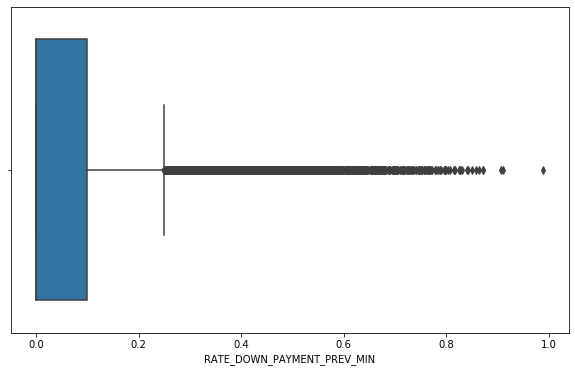

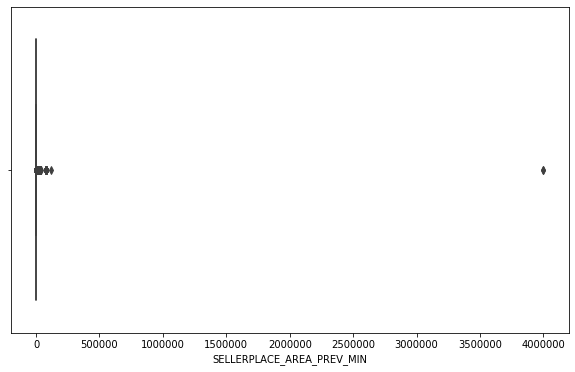

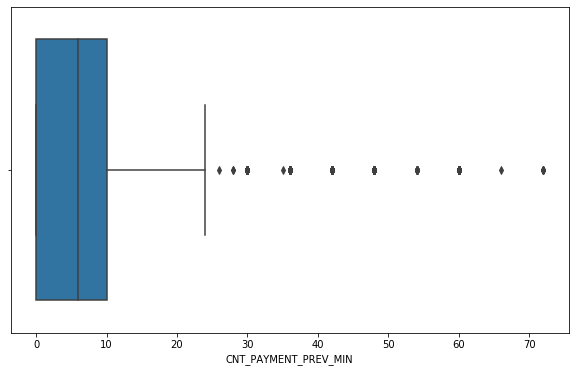

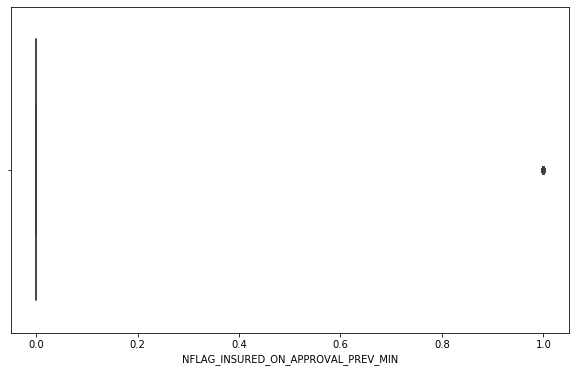

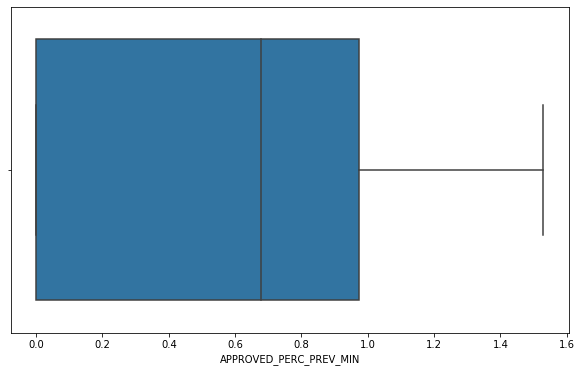

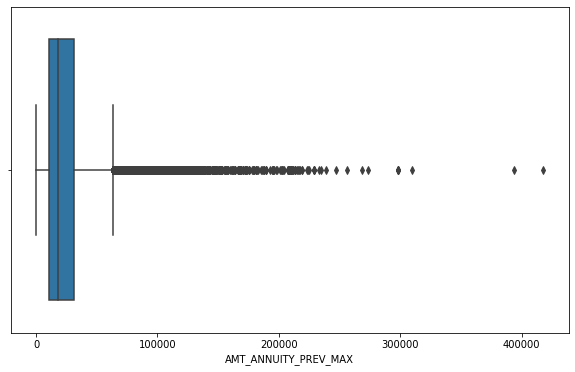

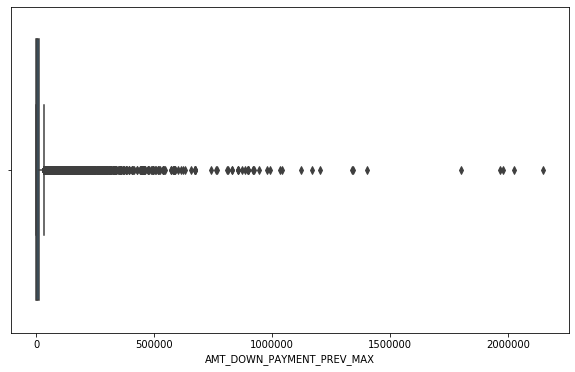

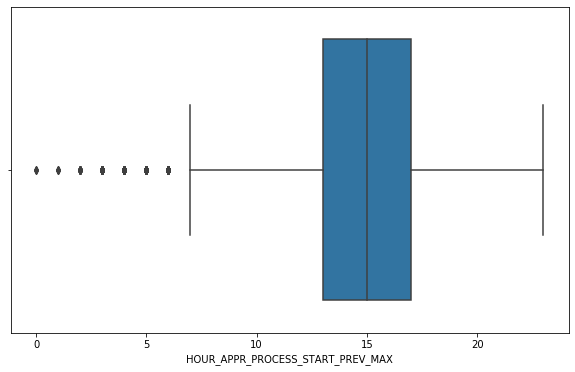

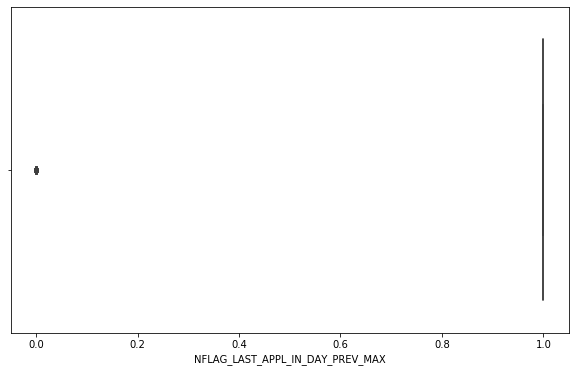

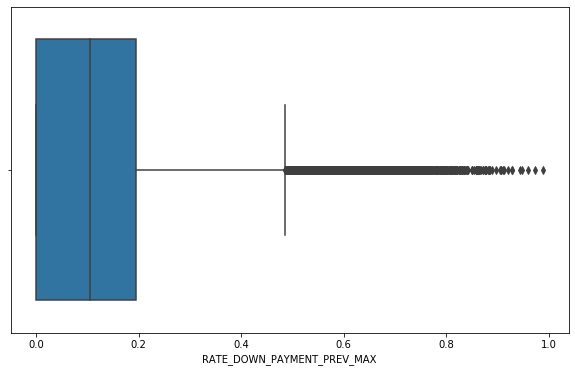

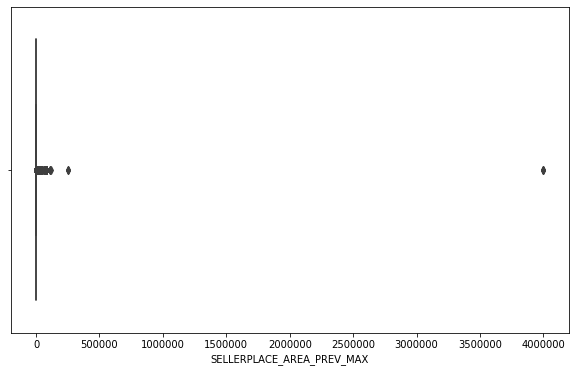

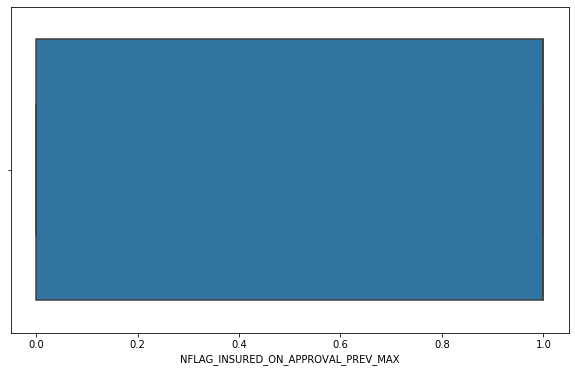

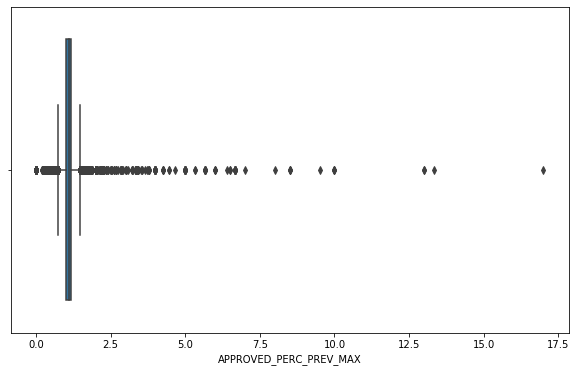

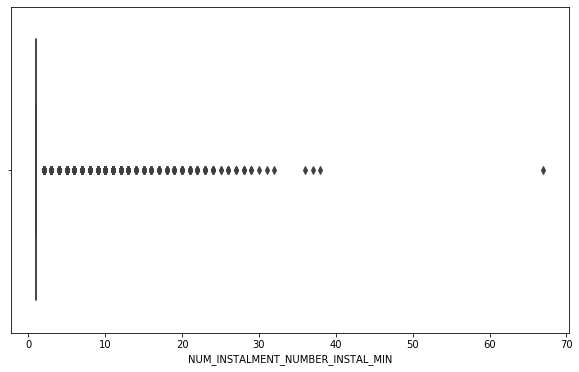

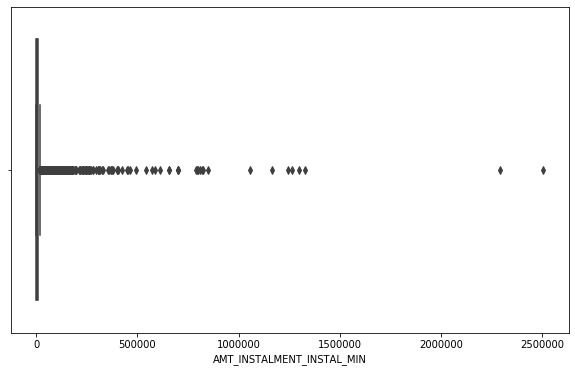

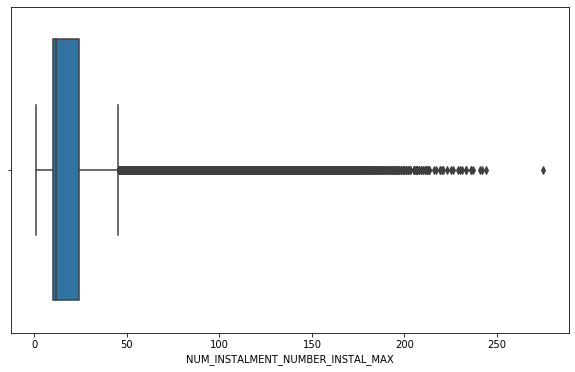

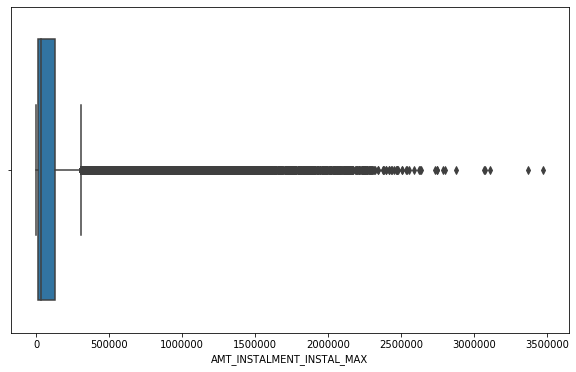

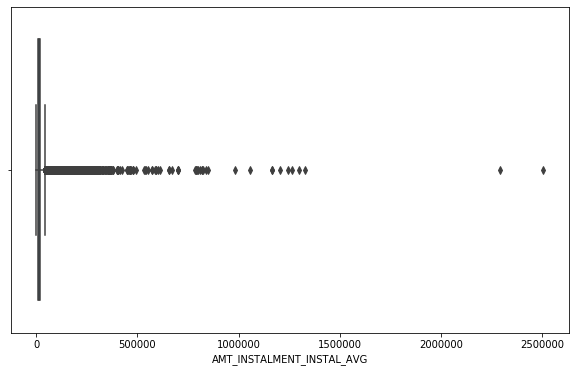

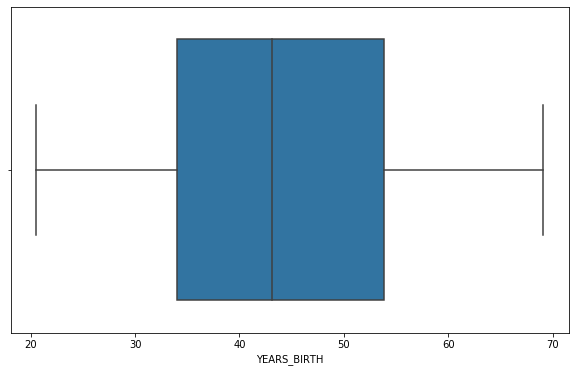

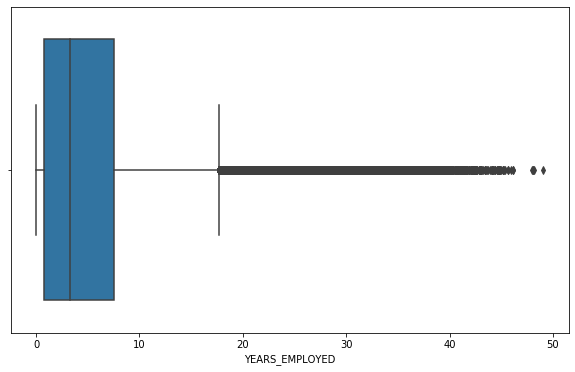

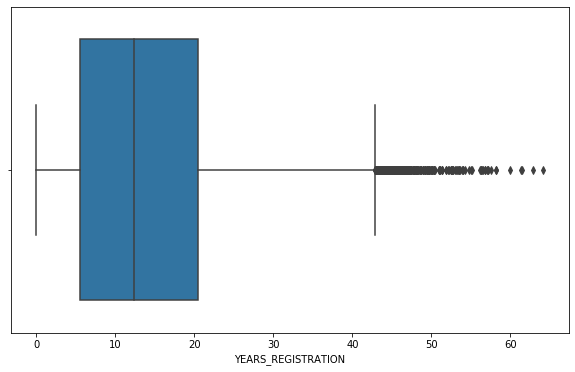

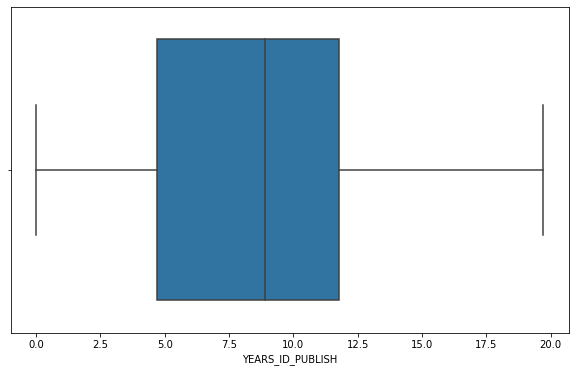

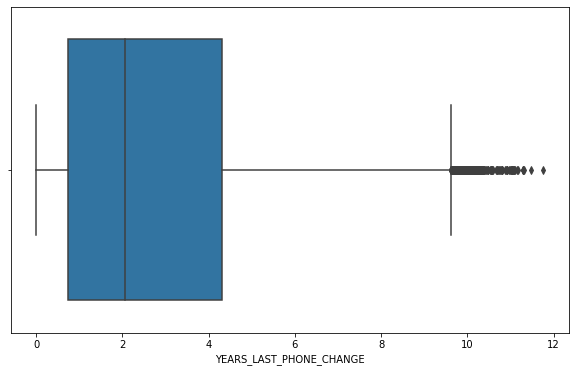

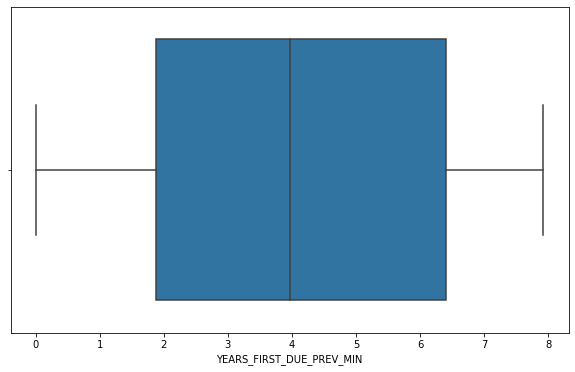

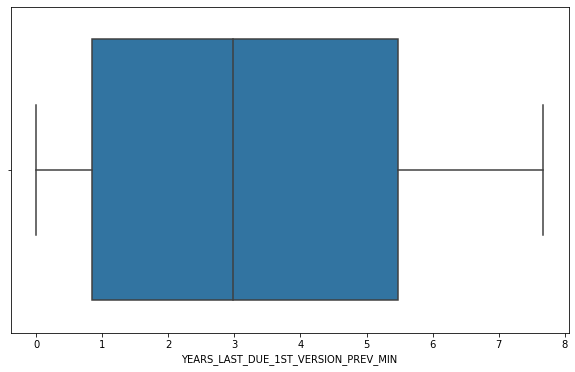

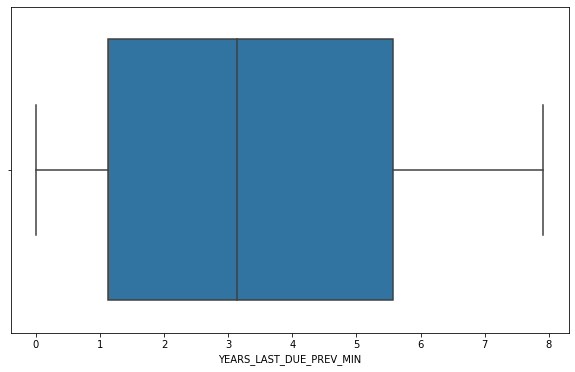

In [73]:
def boxplots(df, cont_vars):
    for i in range(len(cont_vars)):
        plt.figure(figsize=(10,6))
        sns.boxplot(df[cont_vars].iloc[:,i])
        plt.show()

boxplots(train, cont)

In [74]:
def check_extreme_skew(df, cont_vars):
    from scipy.stats import skew
    skewed = []
    skewness = []
    for i in cont:
        if abs( skew( df[i].dropna()) ) > 30:
            skewed.append( i )
            skewness.append( abs(skew( data[i].dropna() )) )
    skewed = pd.DataFrame({'col':skewed, 'Skewness':skewness})
    skewed.sort_values(by='Skewness', ascending=False, inplace=True)
    return skewed

In [75]:
skewed = check_extreme_skew(train, cont)

In [76]:
skewed = skewed.col.tolist()
skewed

['SK_DPD_DEF_POS_x',
 'AMT_INCOME_TOTAL',
 'SELLERPLACE_AREA_PREV_MIN',
 'SELLERPLACE_AREA_PREV_MAX',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'SK_DPD_POS_x',
 'DEBT_RATE_BUREAU',
 'SK_DPD_DEF_POS_y',
 'NFLAG_LAST_APPL_IN_DAY_PREV_MAX',
 'AMT_INSTALMENT_INSTAL_MIN',
 'AMT_DOWN_PAYMENT_PREV_MIN']


<br>

### Variables vs Target

In [77]:
missing = [i for i in cont if 'Missing' in i]
for i in missing:
    cont.remove(i)
    disc.append(i)

 
 <br>

<b>Numeric

In [78]:
def classify_cont_analysis(df, cont_vars, target):
    temp1 = df[df[target] == 1]
    temp2 = df[df[target] == 0]

    for i in cont_vars:
        print(i)
        plt.figure(figsize=(15,5))
        try:
            sns.kdeplot(temp1[i], color='red', label='default')
            sns.kdeplot(temp2[i], color='blue', label = 'not default')
        except:
            sns.kdeplot(temp1[i], color='red', label='default', bw=1)
            sns.kdeplot(temp2[i], color='blue', label = 'not default', bw=1)
        plt.show()

AMT_INCOME_TOTAL


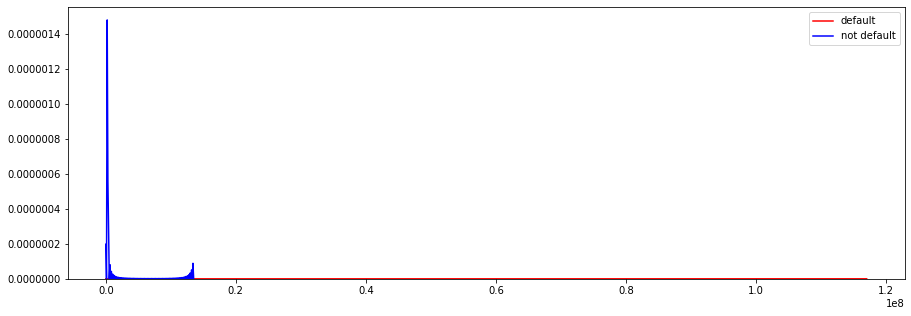

AMT_CREDIT


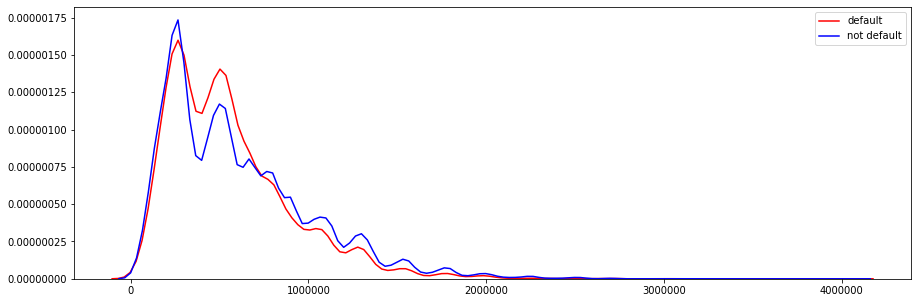

REGION_POPULATION_RELATIVE


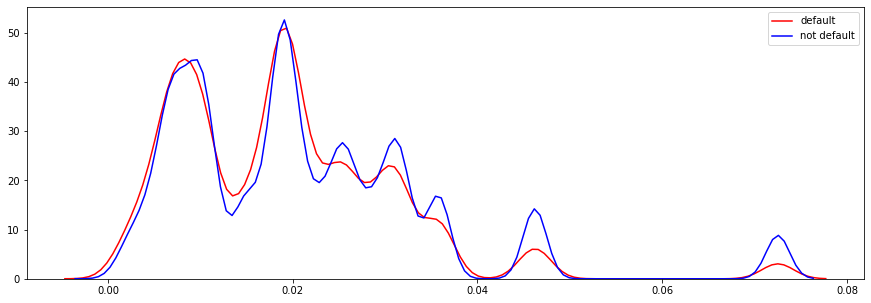

OWN_CAR_AGE


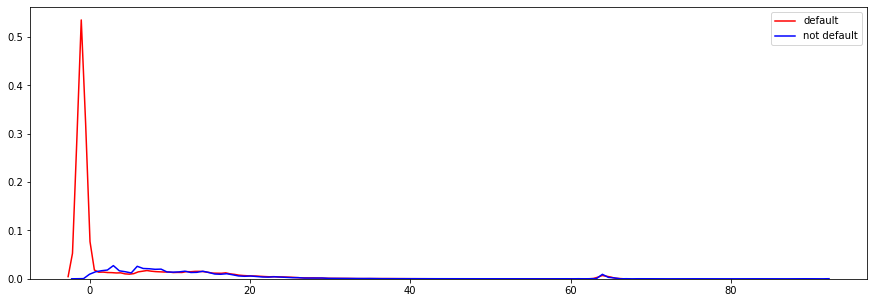

EXT_SOURCE_1


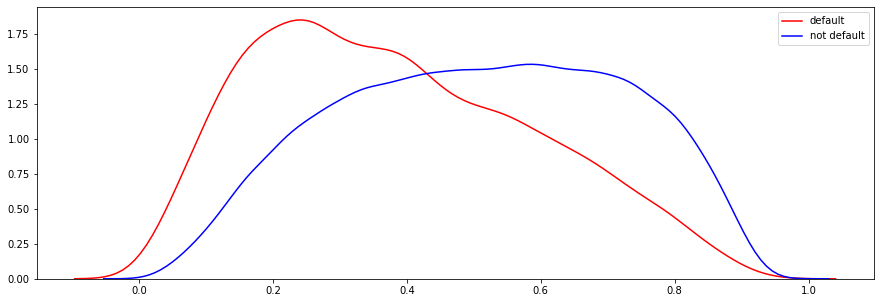

EXT_SOURCE_2


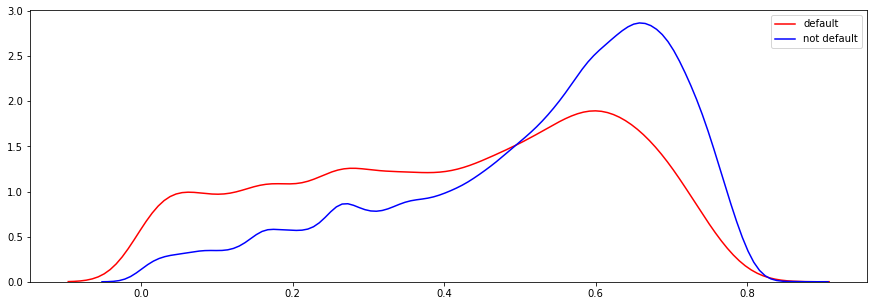

EXT_SOURCE_3


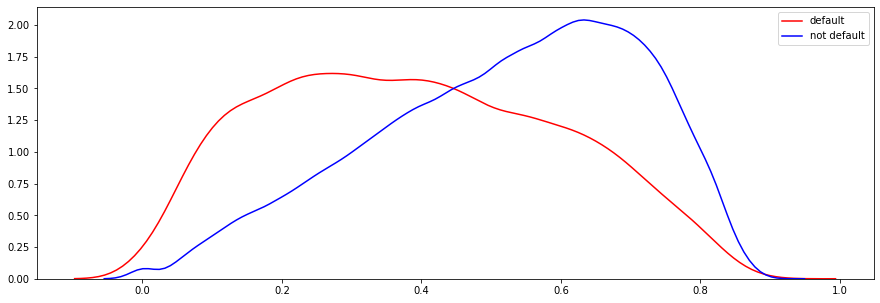

APARTMENTS_AVG


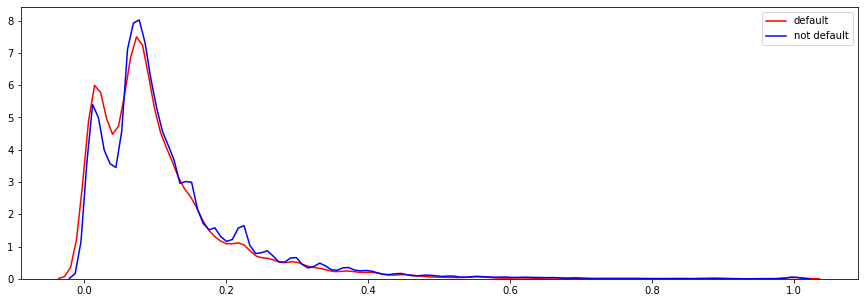

BASEMENTAREA_AVG


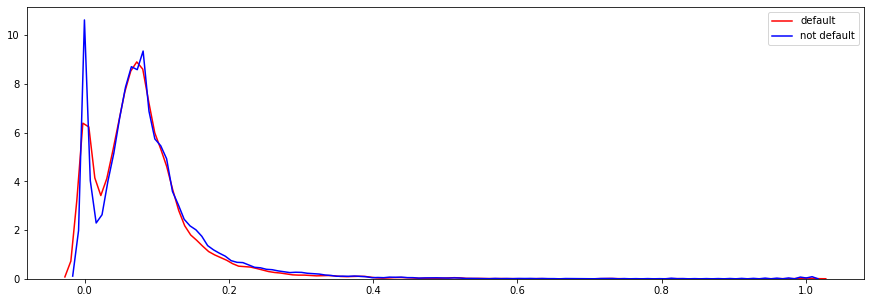

YEARS_BEGINEXPLUATATION_AVG


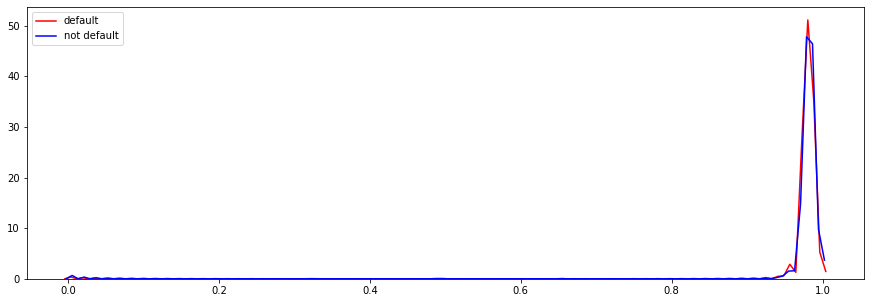

ENTRANCES_AVG


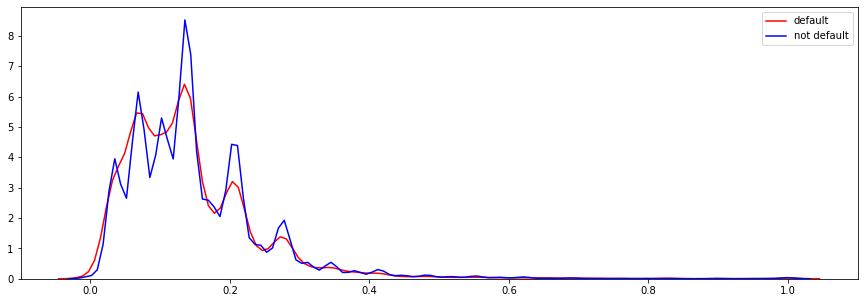

FLOORSMAX_AVG


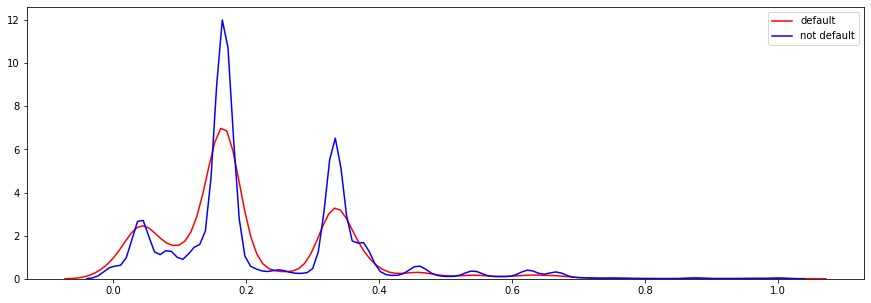

LANDAREA_AVG


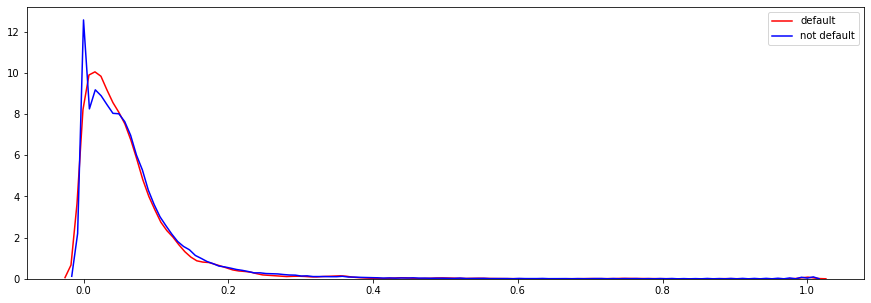

NONLIVINGAREA_AVG


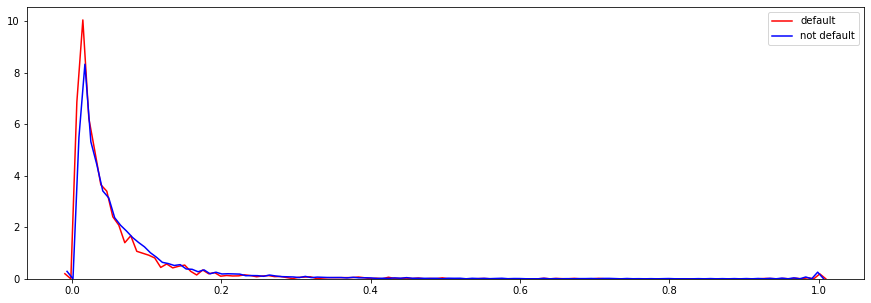

OBS_30_CNT_SOCIAL_CIRCLE


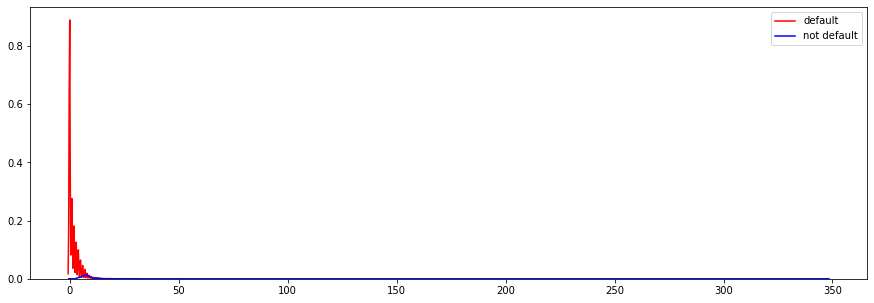

DEF_30_CNT_SOCIAL_CIRCLE


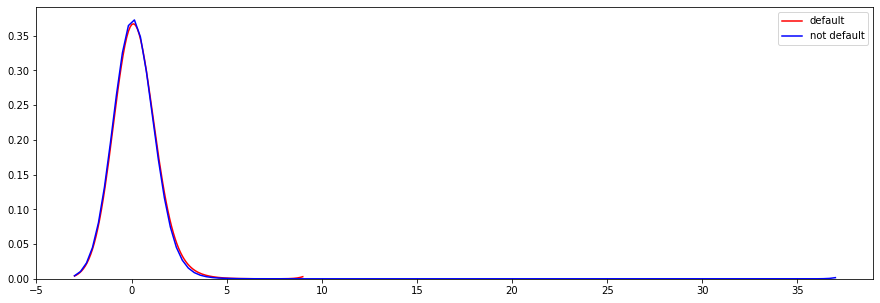

AMT_REQ_CREDIT_BUREAU_HOUR


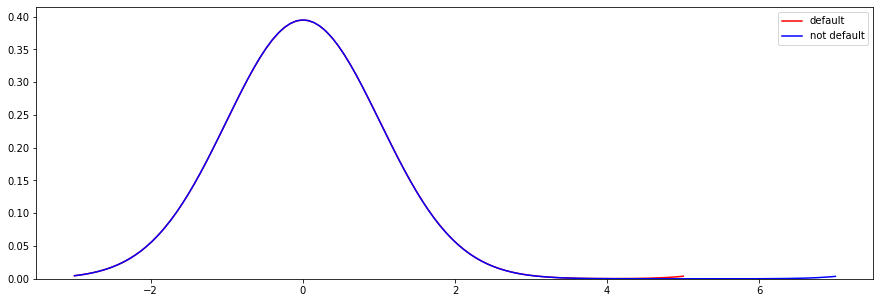

AMT_REQ_CREDIT_BUREAU_DAY


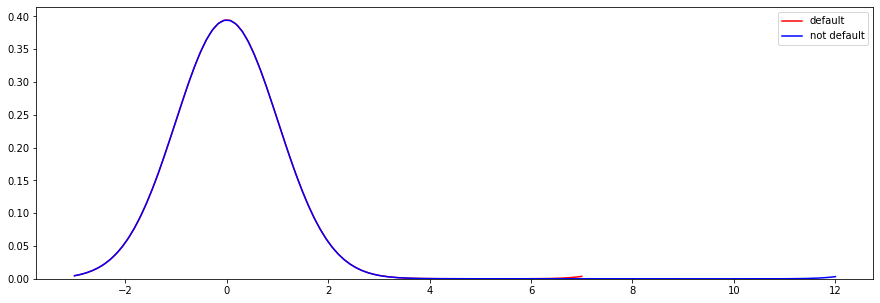

AMT_REQ_CREDIT_BUREAU_WEEK


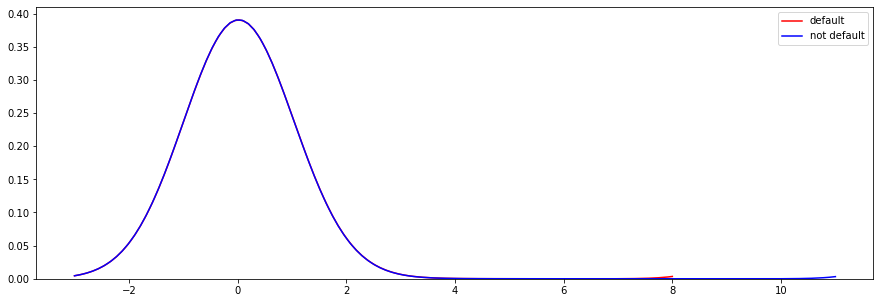

AMT_REQ_CREDIT_BUREAU_MON


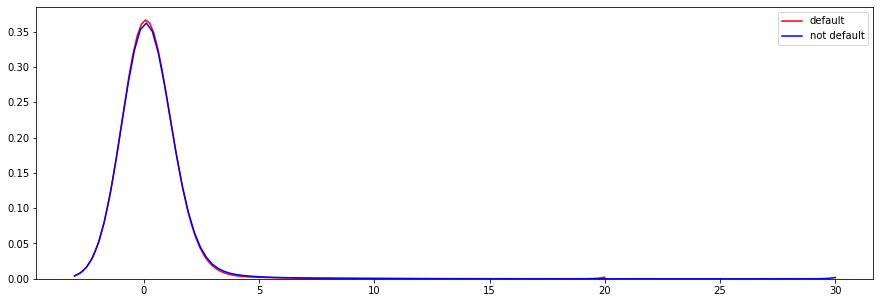

AMT_REQ_CREDIT_BUREAU_QRT


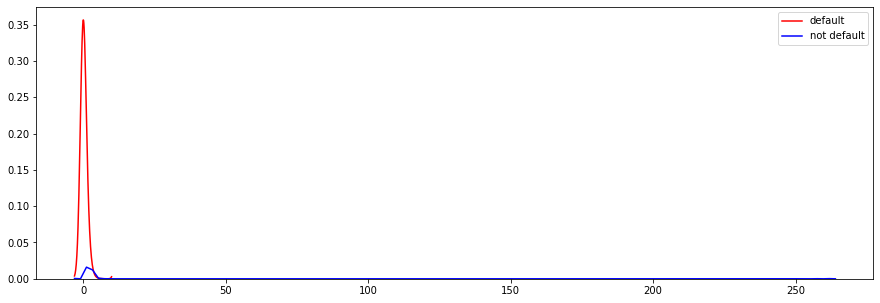

AMT_REQ_CREDIT_BUREAU_YEAR


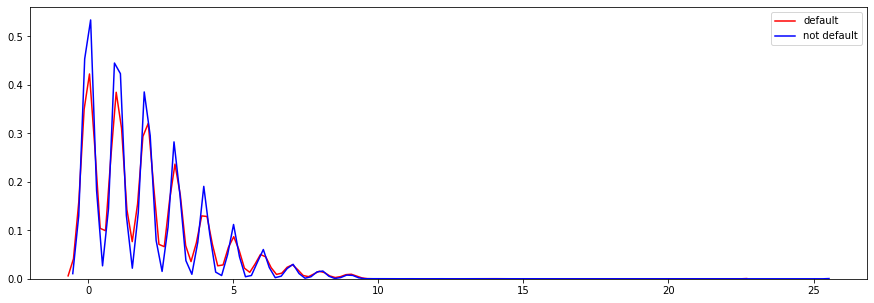

INCOME_PERC_ANNUITY


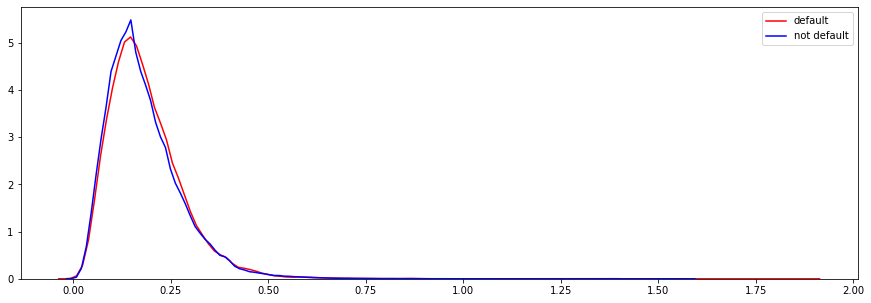

PAYMENT_RATE


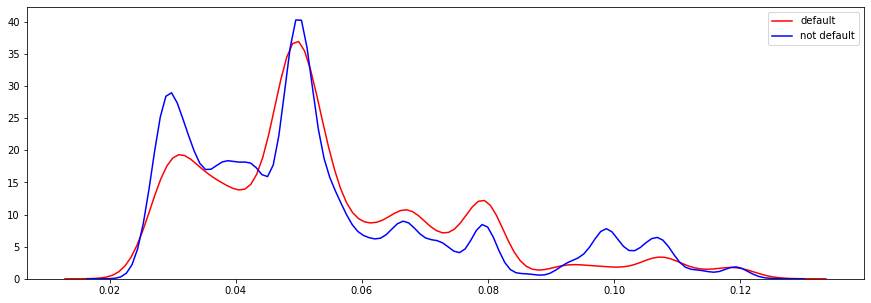

AMT_CREDIT_SUM_BUREAU


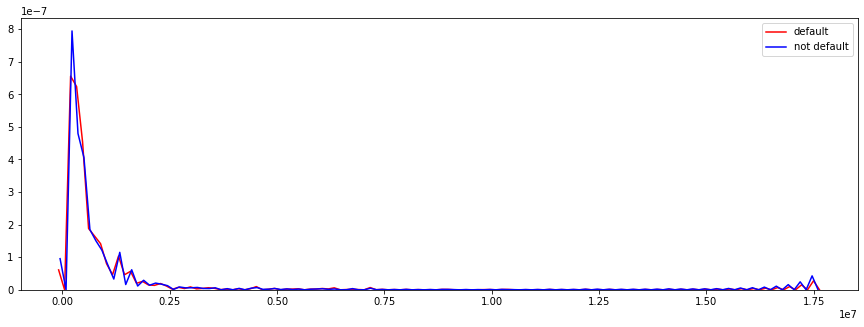

AMT_CREDIT_SUM_LIMIT_BUREAU


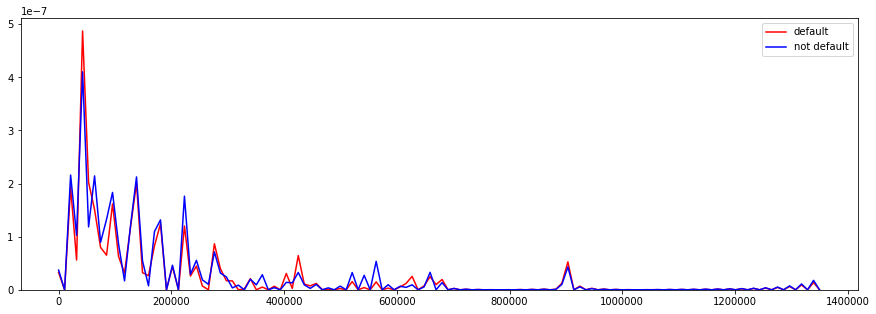

DEBT_RATE_BUREAU


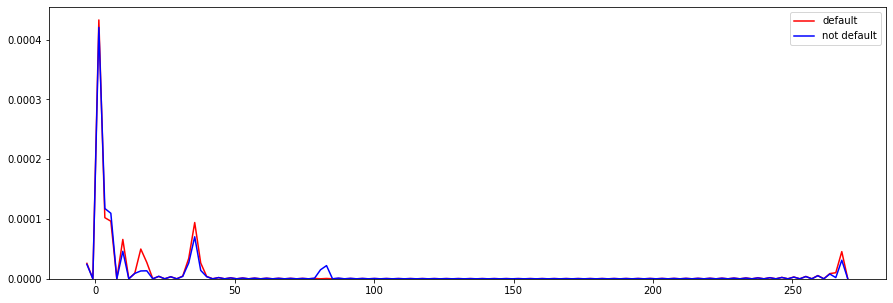

MONTHS_BALANCE_POS_MIN


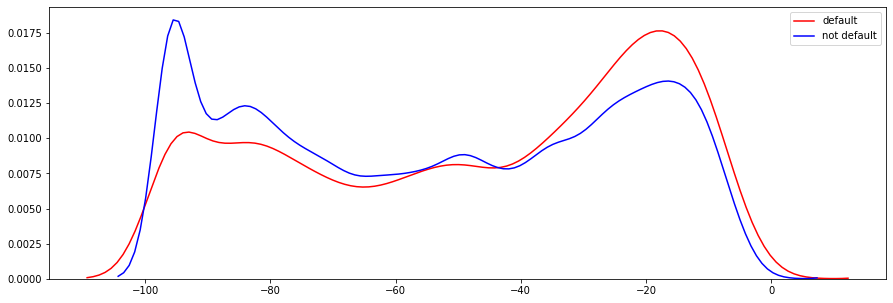

CNT_INSTALMENT_POS_MIN


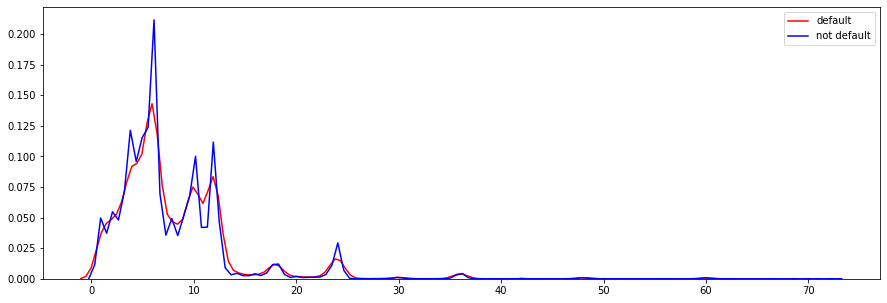

CNT_INSTALMENT_FUTURE_POS_MIN


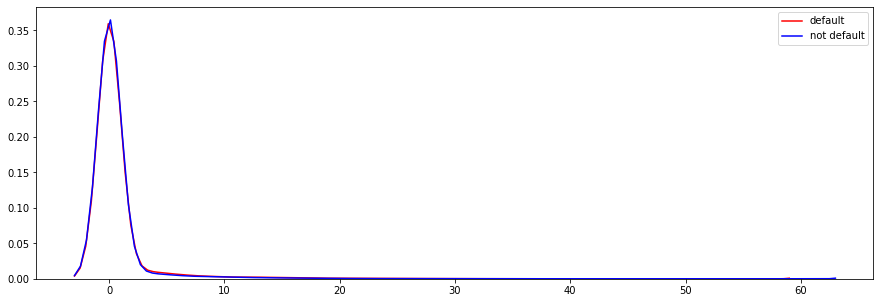

SK_DPD_POS_x


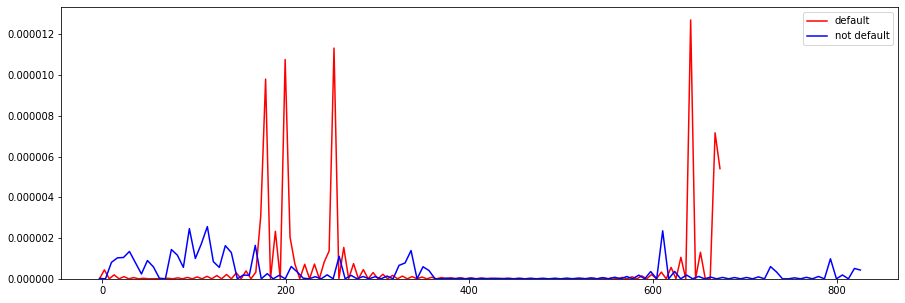

SK_DPD_DEF_POS_x


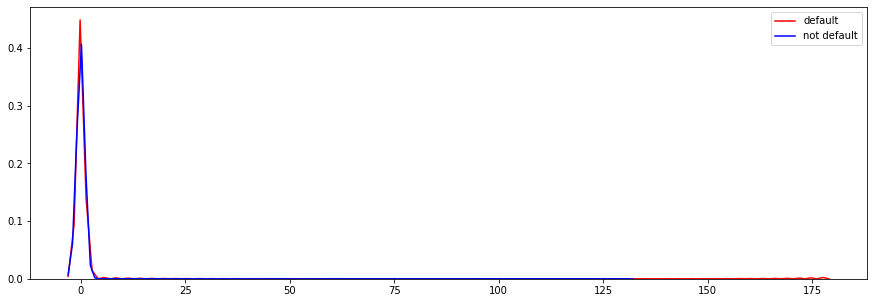

MONTHS_BALANCE_POS_MAX


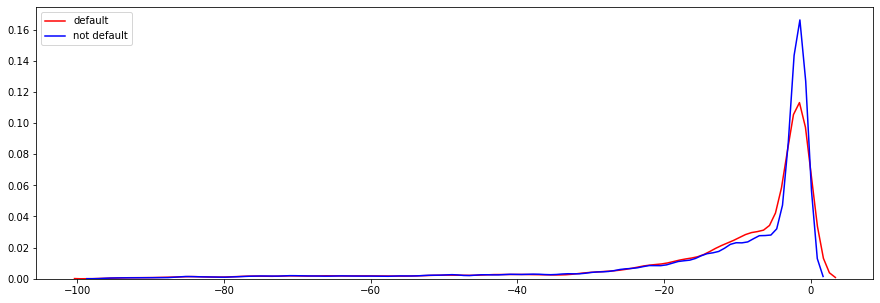

CNT_INSTALMENT_POS_MAX


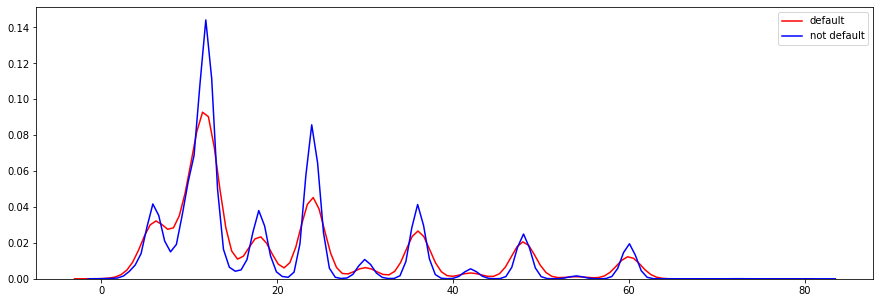

SK_DPD_POS_y


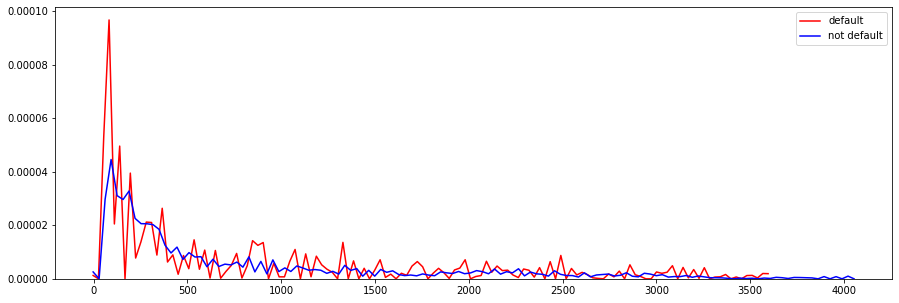

SK_DPD_DEF_POS_y


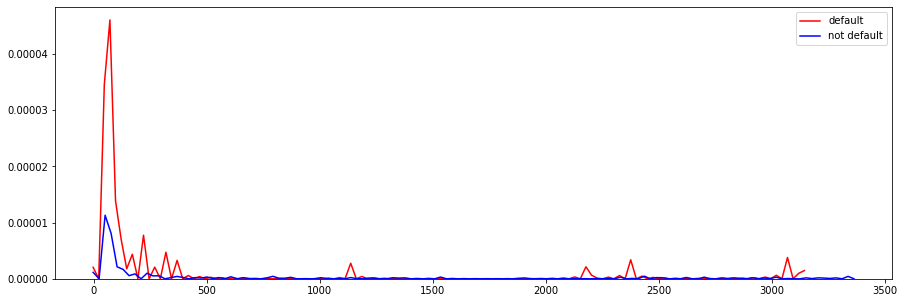

AMT_ANNUITY_PREV_MIN


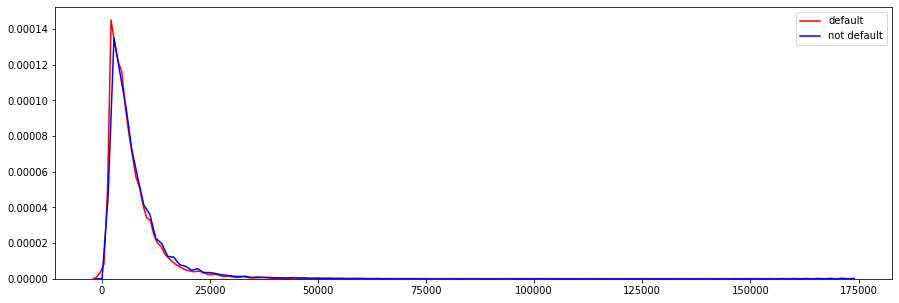

AMT_APPLICATION_PREV_MIN


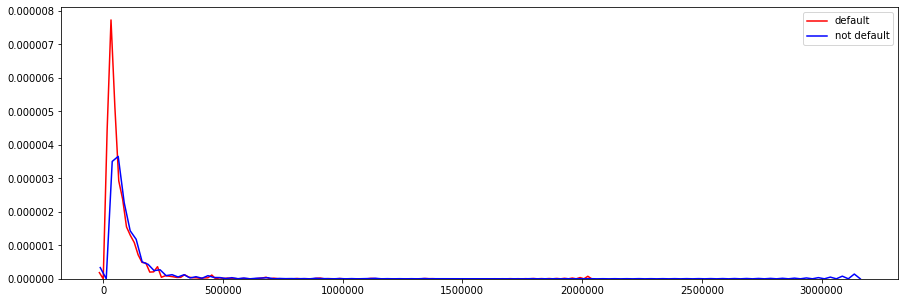

AMT_DOWN_PAYMENT_PREV_MIN


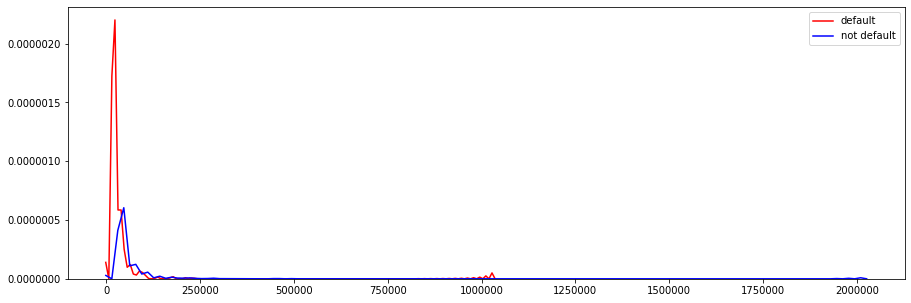

HOUR_APPR_PROCESS_START_PREV_MIN


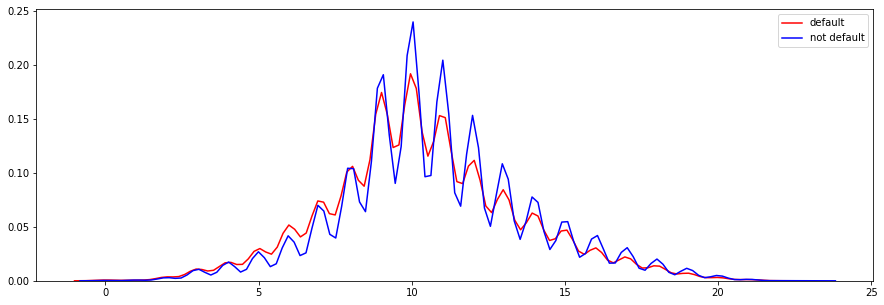

NFLAG_LAST_APPL_IN_DAY_PREV_MIN


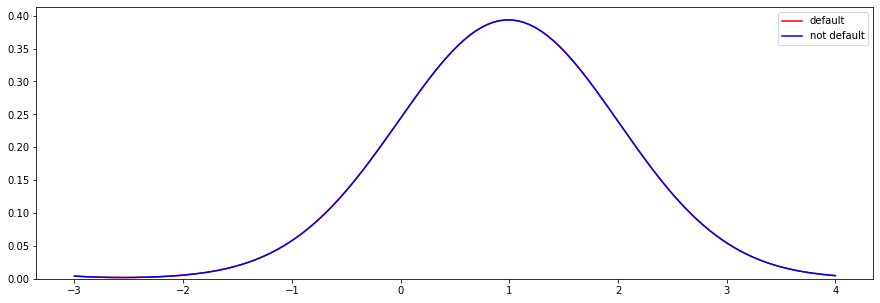

RATE_DOWN_PAYMENT_PREV_MIN


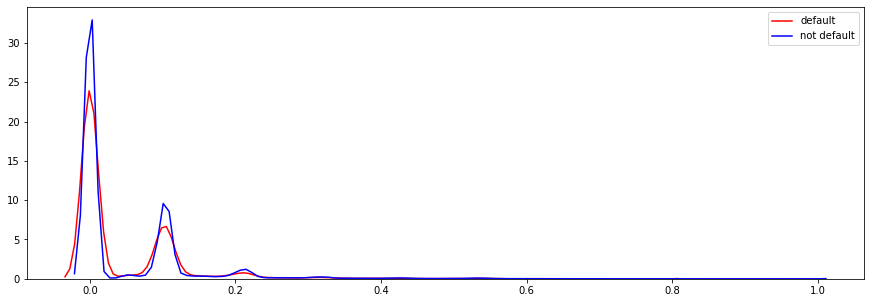

SELLERPLACE_AREA_PREV_MIN


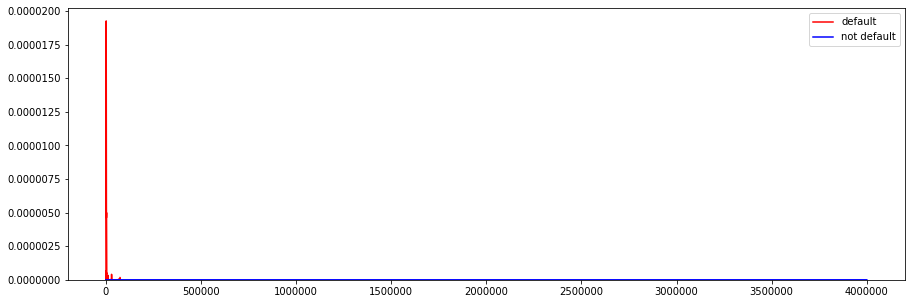

CNT_PAYMENT_PREV_MIN


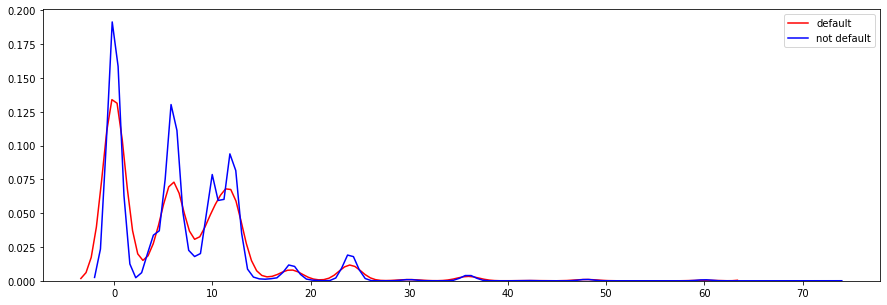

NFLAG_INSURED_ON_APPROVAL_PREV_MIN


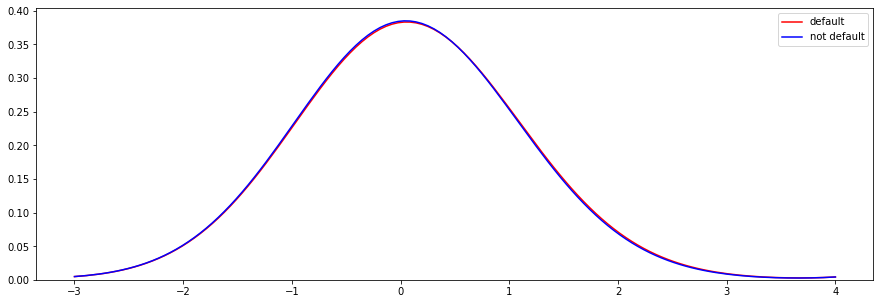

APPROVED_PERC_PREV_MIN


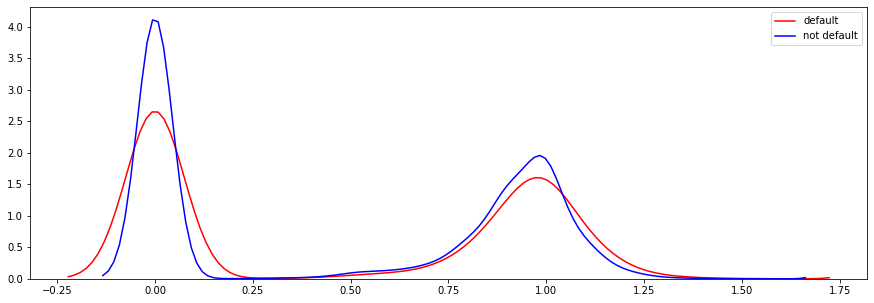

AMT_ANNUITY_PREV_MAX


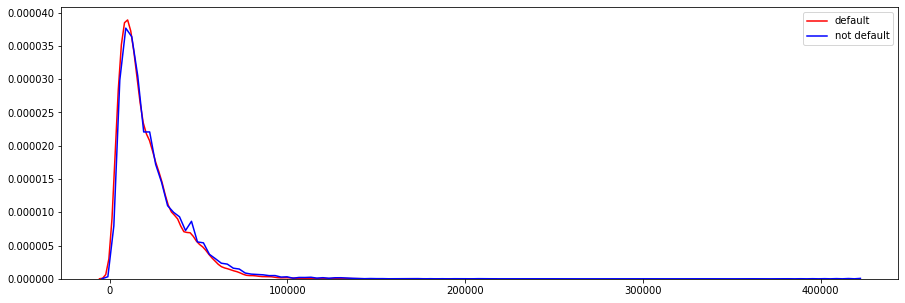

AMT_DOWN_PAYMENT_PREV_MAX


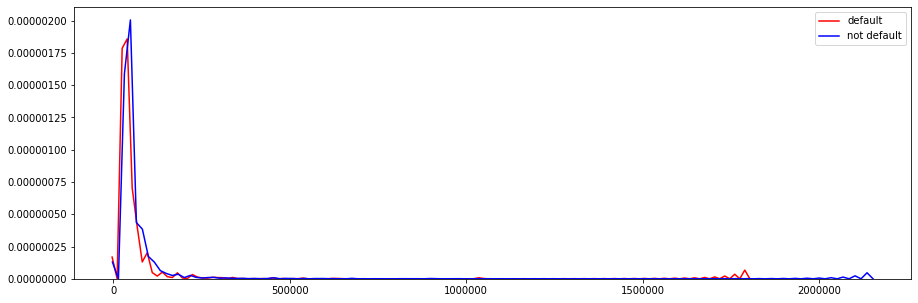

HOUR_APPR_PROCESS_START_PREV_MAX


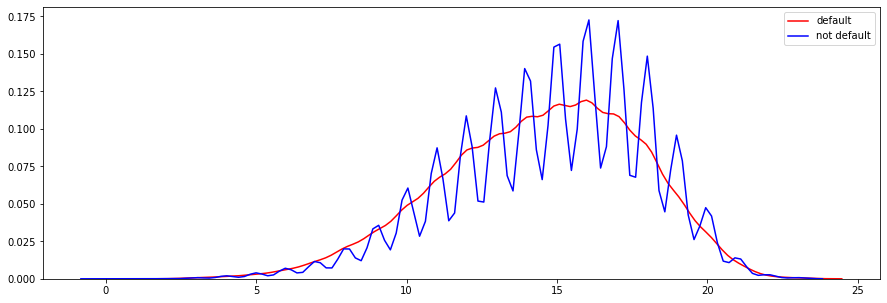

NFLAG_LAST_APPL_IN_DAY_PREV_MAX


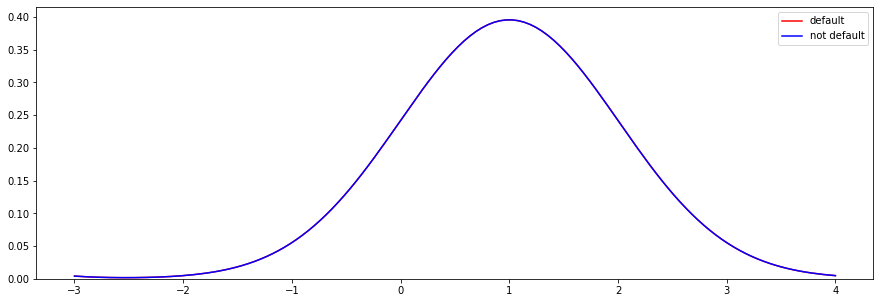

RATE_DOWN_PAYMENT_PREV_MAX


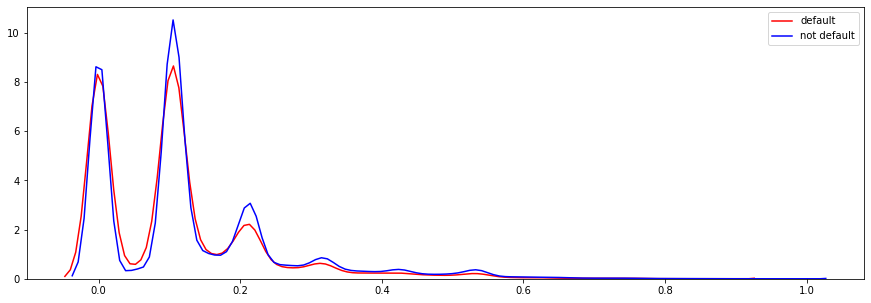

SELLERPLACE_AREA_PREV_MAX


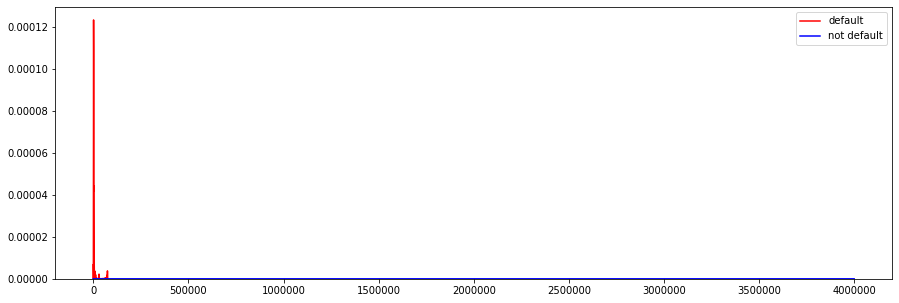

NFLAG_INSURED_ON_APPROVAL_PREV_MAX


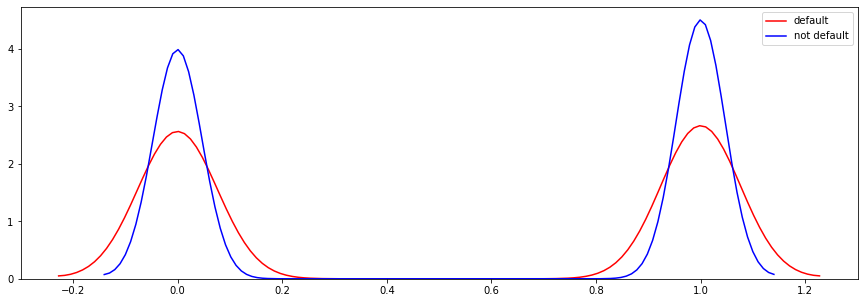

APPROVED_PERC_PREV_MAX


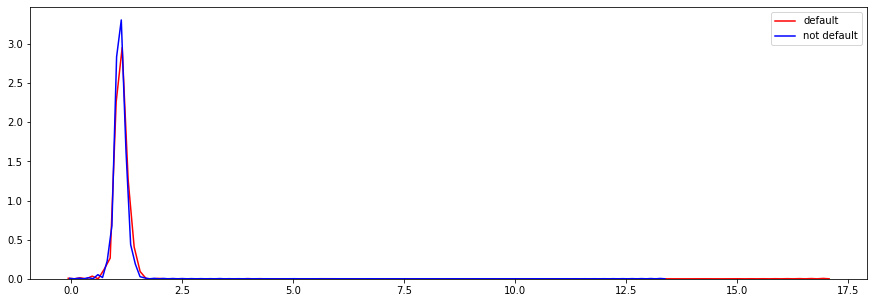

NUM_INSTALMENT_NUMBER_INSTAL_MIN


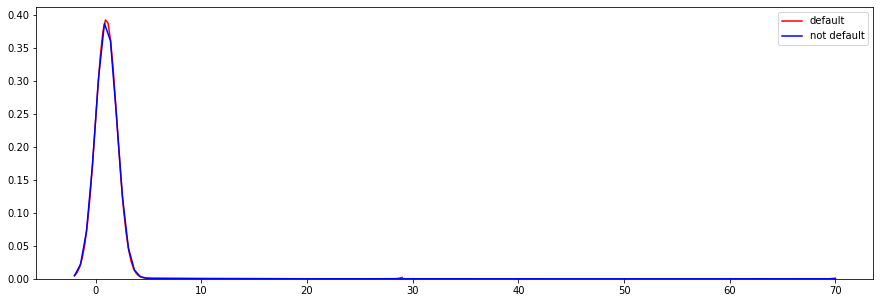

AMT_INSTALMENT_INSTAL_MIN


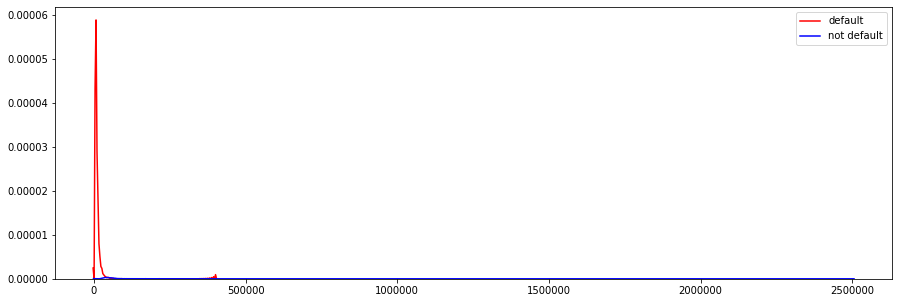

NUM_INSTALMENT_NUMBER_INSTAL_MAX


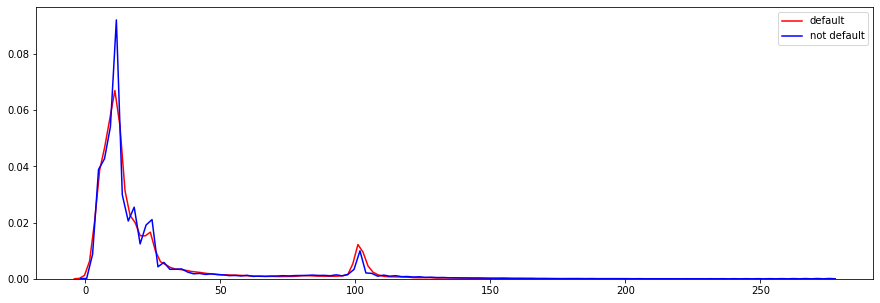

AMT_INSTALMENT_INSTAL_MAX


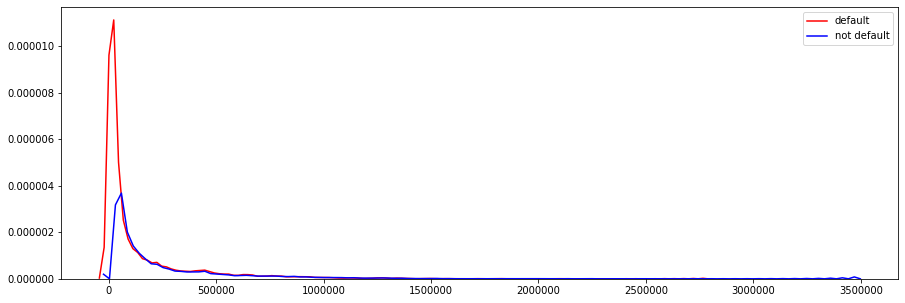

AMT_INSTALMENT_INSTAL_AVG


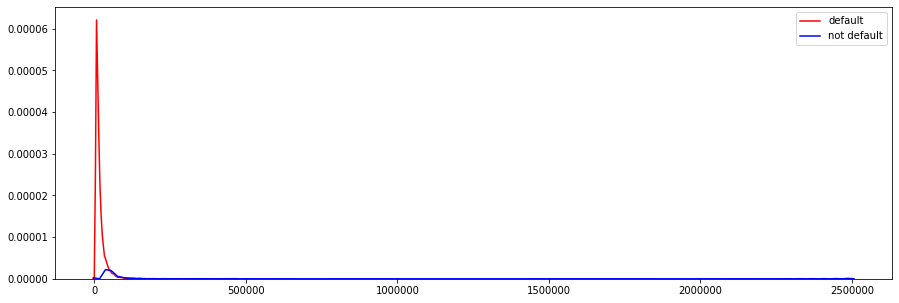

YEARS_BIRTH


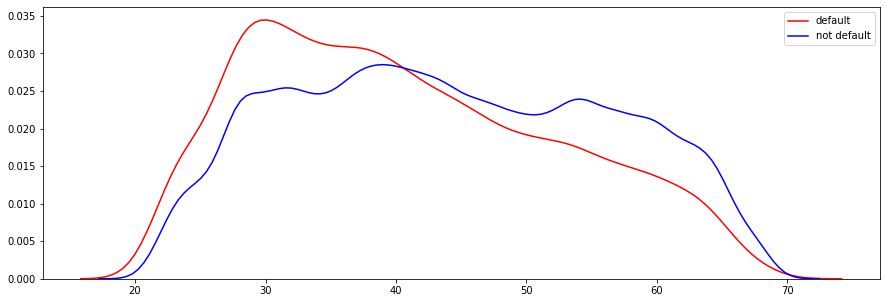

YEARS_EMPLOYED


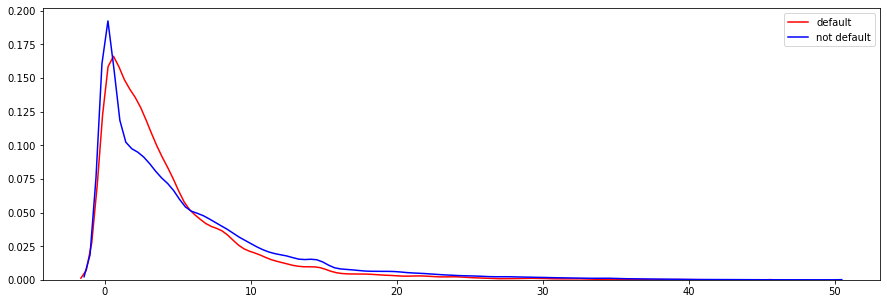

YEARS_REGISTRATION


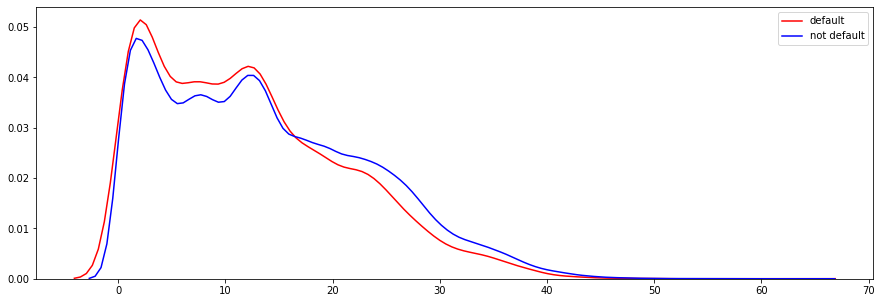

YEARS_ID_PUBLISH


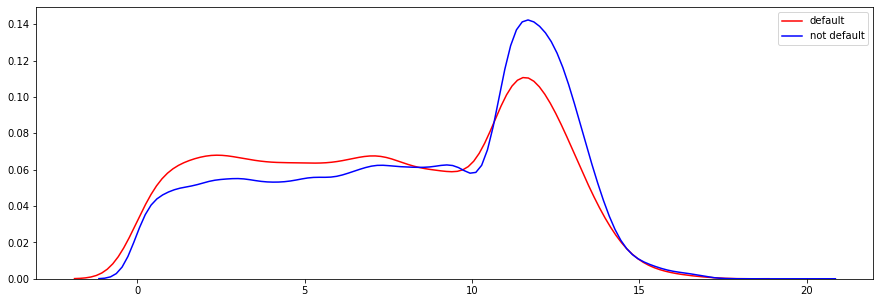

YEARS_LAST_PHONE_CHANGE


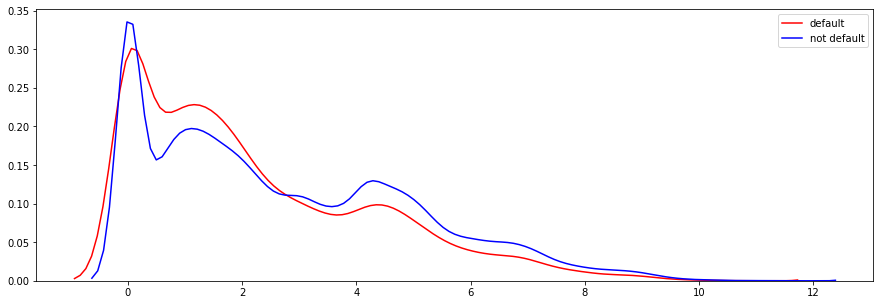

YEARS_FIRST_DUE_PREV_MIN


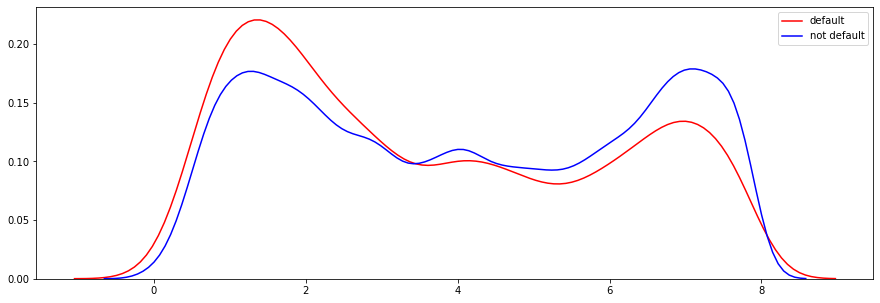

YEARS_LAST_DUE_1ST_VERSION_PREV_MIN


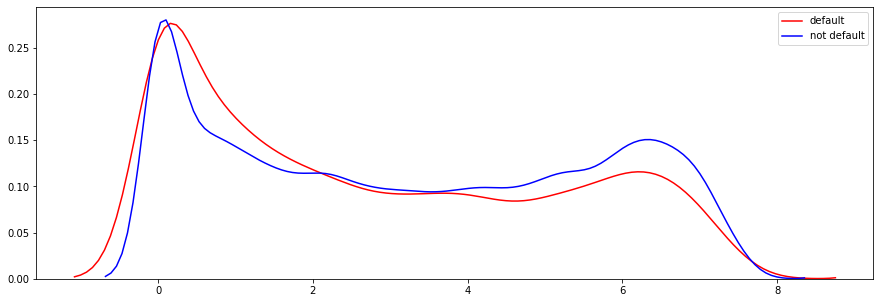

YEARS_LAST_DUE_PREV_MIN


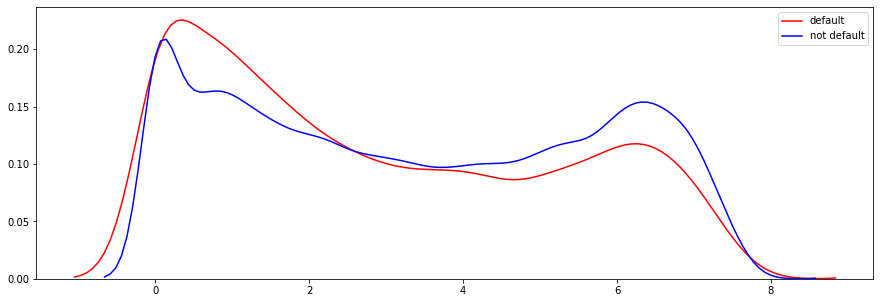

In [79]:
classify_cont_analysis(train, cont, 'TARGET')


<br>

Features like AMT_INCOME_TOTAL, OWN_CAR_AGE, EXT_SOURCE_1,EXT_SOURCE_2,  EXT_SOURCE_3, LANDAREA_AVG, NONLIVINGAREA_AVG, OBS_30_CNT_SOCIAL_CIRCLE,  AMT_REQ_CREDIT_BUREAU_QRT, INCOME_PERCENT_CREDIT,  INCOME_DIST_FAM, PERC_30_DEF_SOCIAL_CIRCLE,  PAYMENT_RATE,  SK_DPD_POS_x, SK_DPD_POS_y,  SK_DPD_DEF_POS_y, MONTHS_BALANCE_POS_MIN,  CNT_INSTALMENT_POS_AVG, MONTHS_BALANCE_POS_AVG,  AMT_APPLICATION_PREV_MIN,  AMT_DOWN_PAYMENT_PREV_MIN, AMT_DOWN_PAYMENT_PREV_AVG,  HOUR_APPR_PROCESS_START_PREV_AVG,  AMT_INSTALMENT_INSTAL_MIN,  AMT_INSTALMENT_INSTAL_MAX,  AMT_INSTALMENT_INSTAL_AVG,  YEARS_BIRTH,  YEARS_EMPLOYED, YEARS_LAST_PHONE_CHANGE, YEARS_LAST_DUE_PREV_MIN, YEARS_FIRST_DUE_PREV_MAX, YEARS_DECISION_PREV_AVG.

 
<br>

In [80]:
imp_cont = ['AMT_INCOME_TOTAL', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'LANDAREA_AVG',\
            'NONLIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_PERCENT_CREDIT',\
            'INCOME_DIST_FAM', 'PERC_30_DEF_SOCIAL_CIRCLE', 'PAYMENT_RATE', 'SK_DPD_POS_x', 'SK_DPD_POS_y',\
            'SK_DPD_DEF_POS_y', 'MONTHS_BALANCE_POS_MIN', 'CNT_INSTALMENT_POS_AVG', 'MONTHS_BALANCE_POS_AVG',\
            'AMT_APPLICATION_PREV_MIN', 'AMT_DOWN_PAYMENT_PREV_MIN', 'AMT_DOWN_PAYMENT_PREV_AVG',\
            'HOUR_APPR_PROCESS_START_PREV_AVG', 'AMT_INSTALMENT_INSTAL_MIN', 'AMT_INSTALMENT_INSTAL_MAX',\
            'AMT_INSTALMENT_INSTAL_AVG', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_LAST_PHONE_CHANGE',\
            'YEARS_LAST_DUE_PREV_MIN', 'YEARS_FIRST_DUE_PREV_MAX', 'YEARS_DECISION_PREV_AVG']


<br>

In [84]:
disc.remove('YEARS_BEGINEXPLUATATION_AVG_Missing')

<b>Categoric:

In [85]:
train[cat+disc].nunique()

NAME_CONTRACT_TYPE                                          2
CODE_GENDER                                                 2
FLAG_OWN_CAR                                                2
FLAG_OWN_REALTY                                             2
NAME_TYPE_SUITE                                             7
NAME_INCOME_TYPE                                            8
NAME_EDUCATION_TYPE                                         5
NAME_FAMILY_STATUS                                          6
CNT_CHILDREN                                                4
FLAG_WORK_PHONE                                             2
FLAG_PHONE                                                  2
FLAG_EMAIL                                                  2
REGION_RATING_CLIENT                                        3
HOUR_APPR_PROCESS_START                                    24
REG_REGION_NOT_WORK_REGION                                  2
REG_CITY_NOT_LIVE_CITY                                      2
REG_CITY


<br>

In [86]:
def classify_cat_disc_analysis(df, i):
    a = df[i].value_counts().index.tolist()
    b = (df[df.TARGET == 1][i].value_counts()/df[i].value_counts()*100).values.tolist()
    r = list(range( len(df[i].value_counts()) ))
    if len(r) > 3:
        plt.figure(figsize=(18,7))
    else:
        plt.figure(figsize=(7,5))
    sns.barplot(a,b)
    plt.title(i+' vs TARGET')
    plt.xlabel(i)
    plt.ylabel('% values in  TARGET')
    plt.xticks(r, a)
    plt.show()

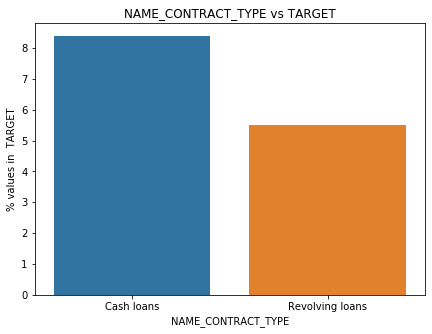

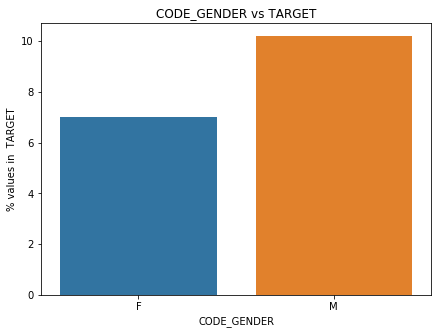

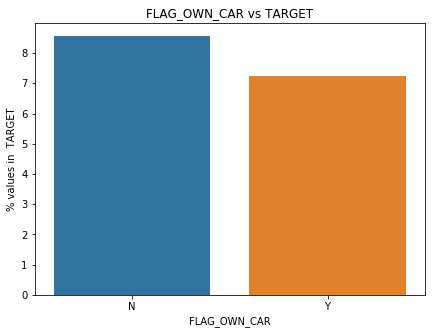

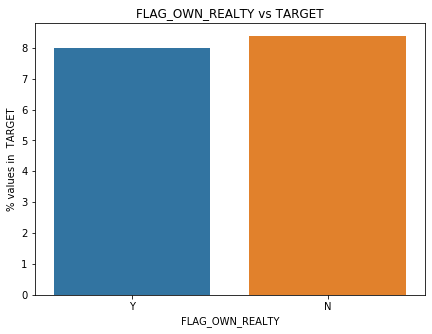

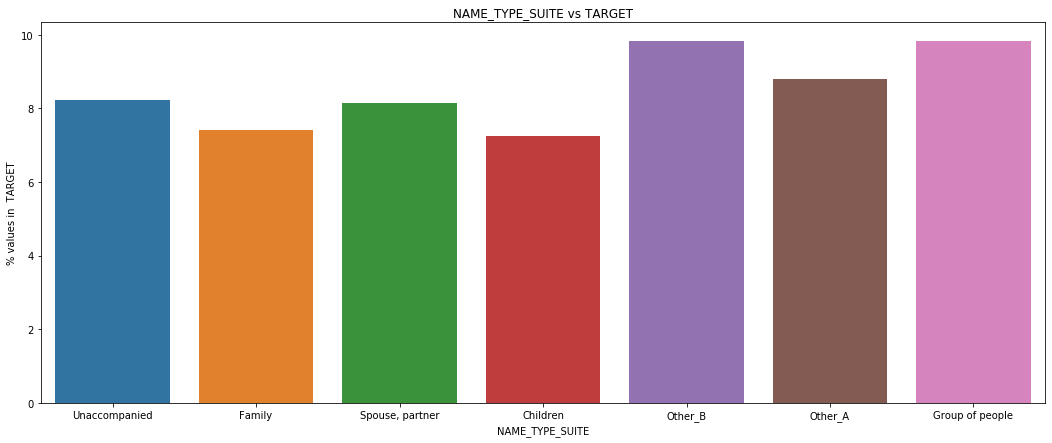

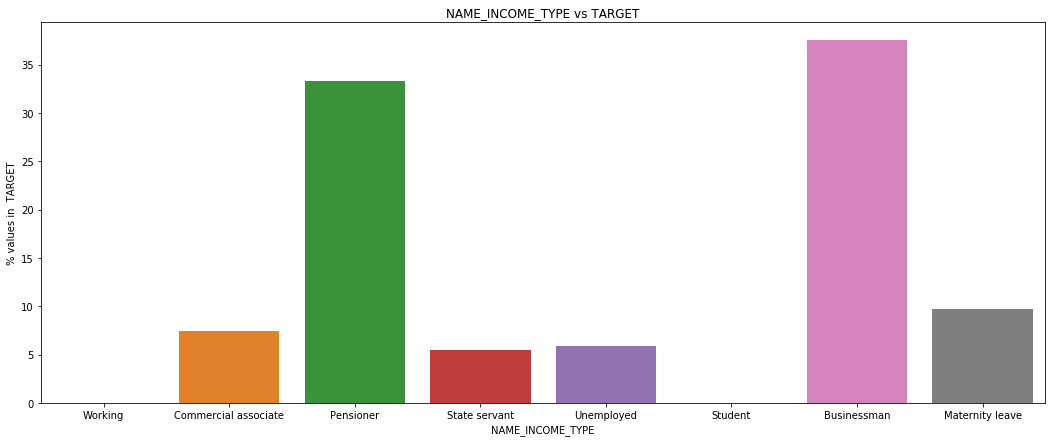

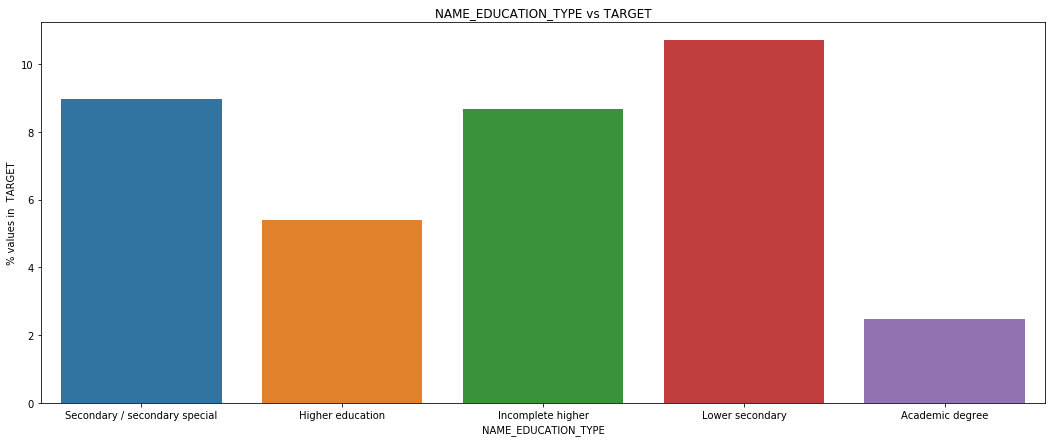

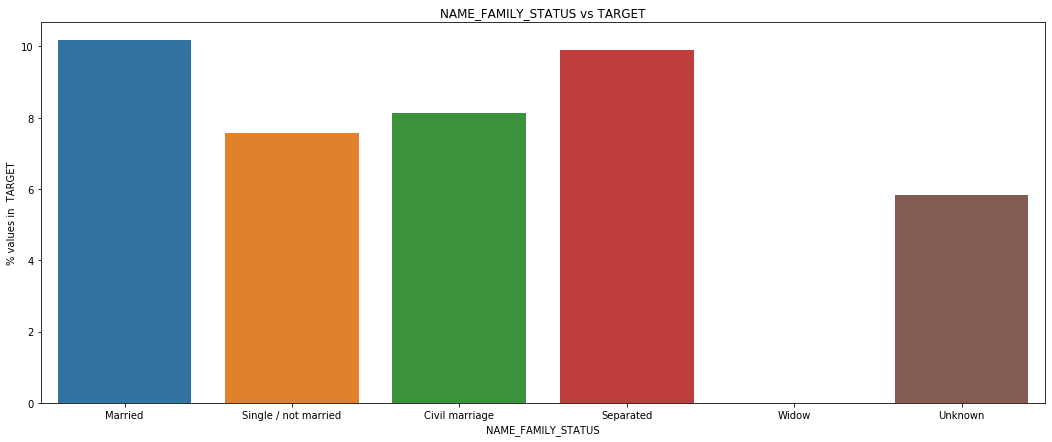

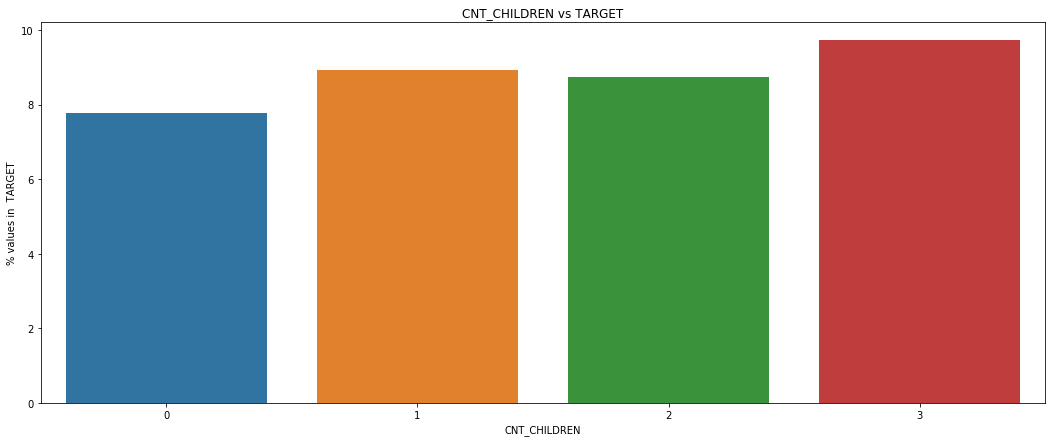

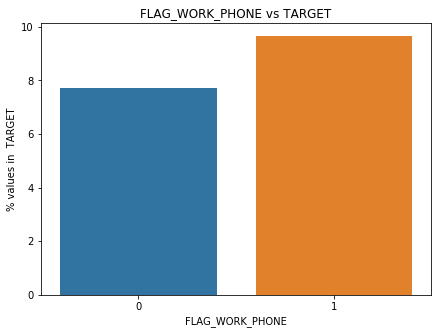

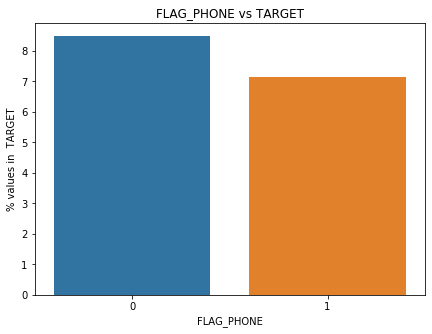

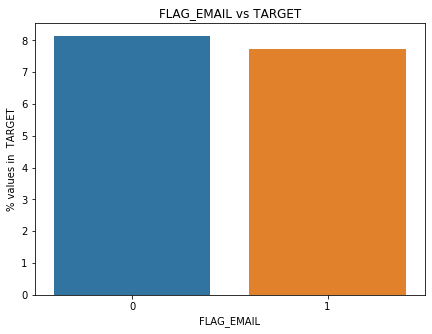

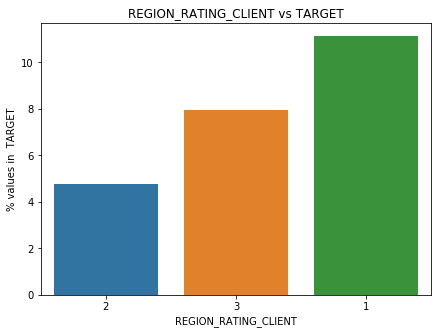

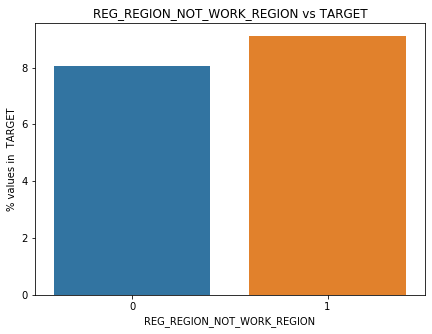

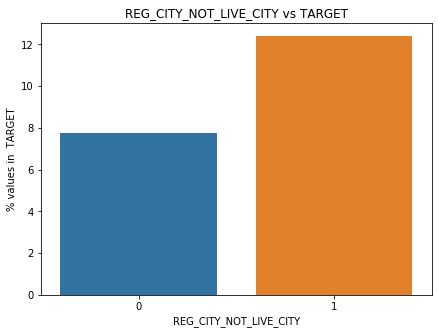

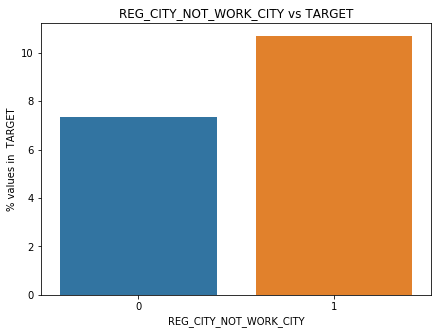

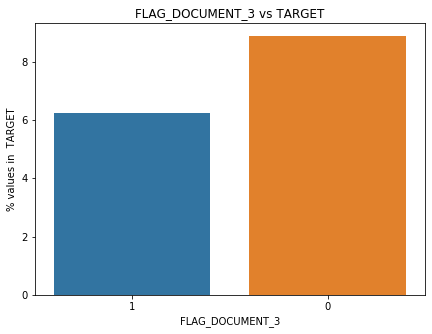

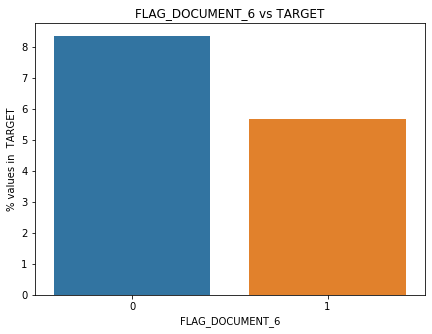

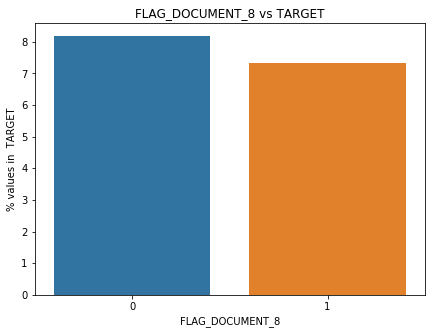

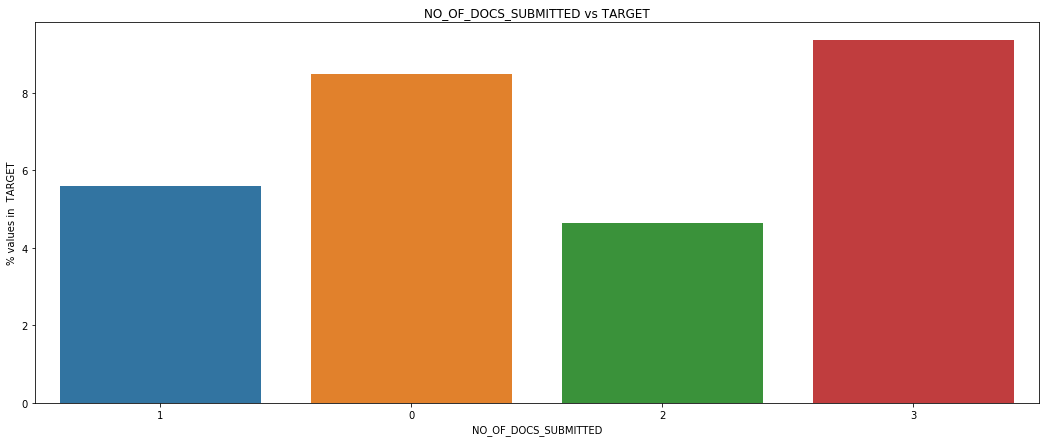

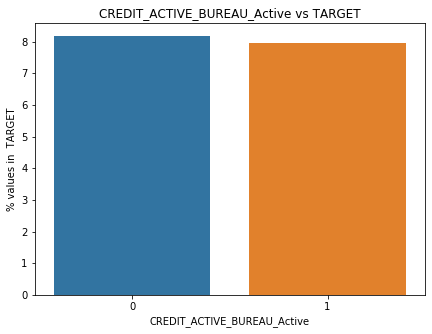

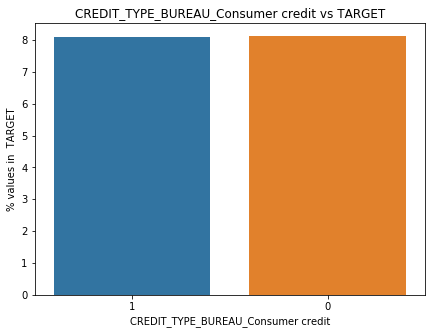

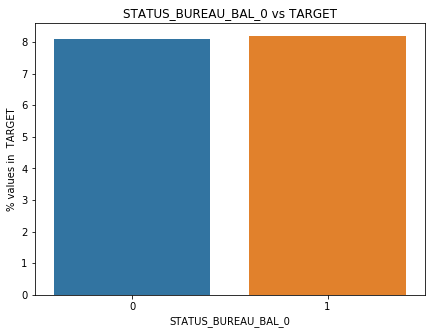

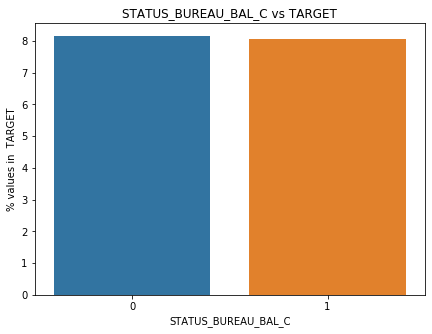

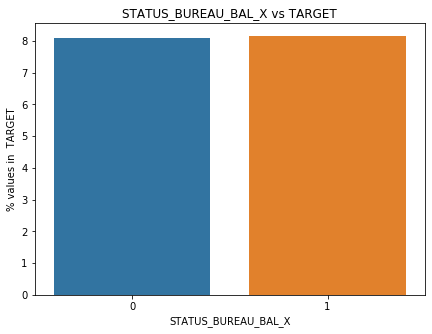

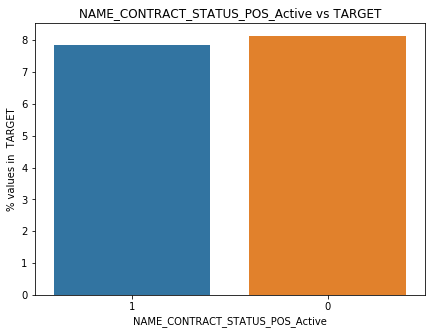

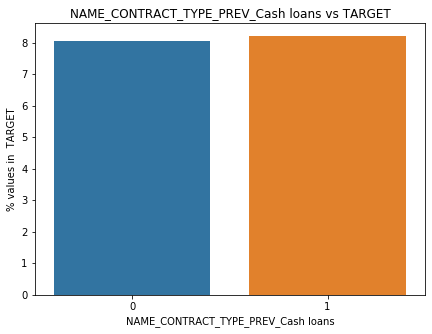

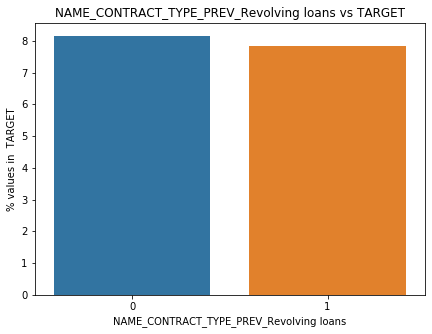

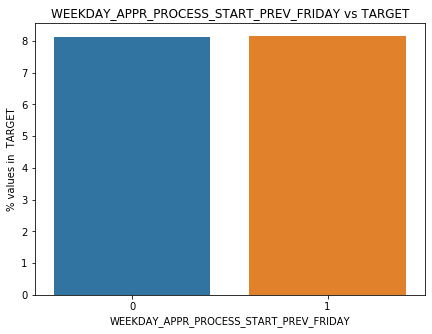

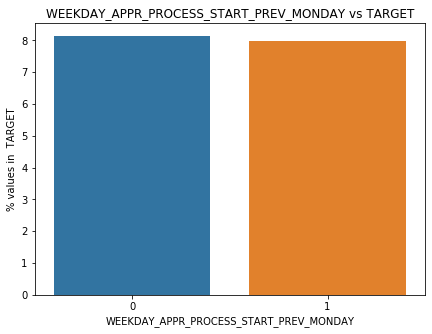

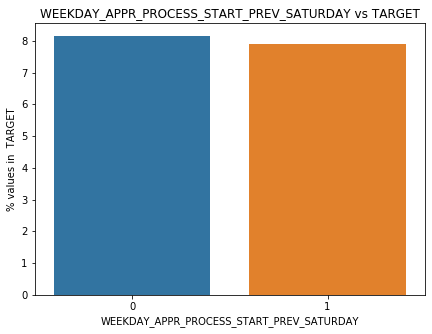

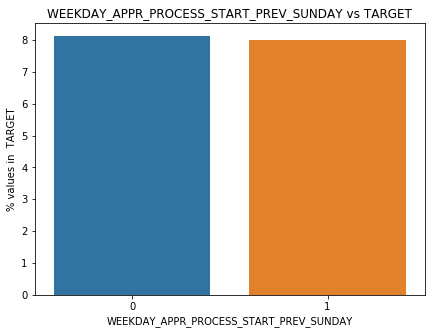

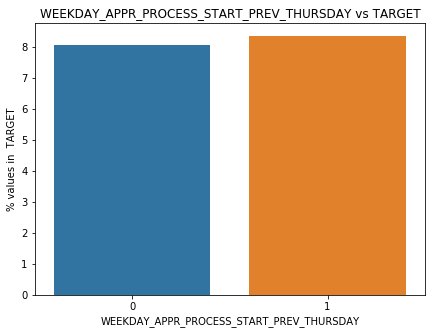

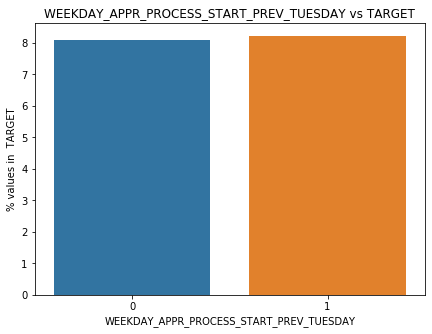

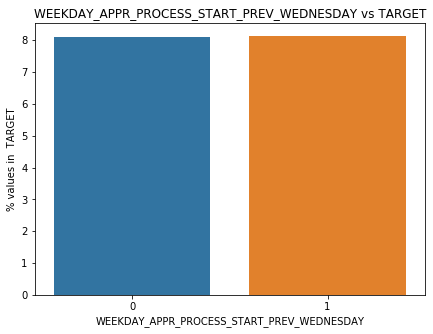

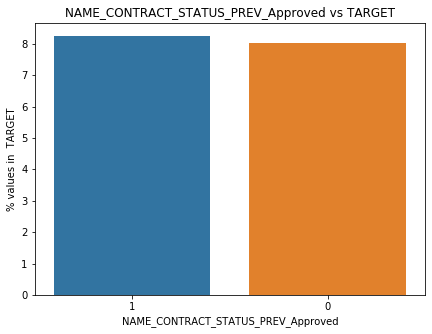

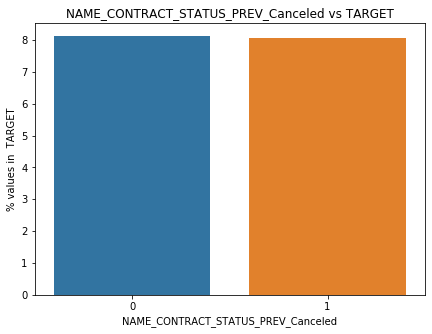

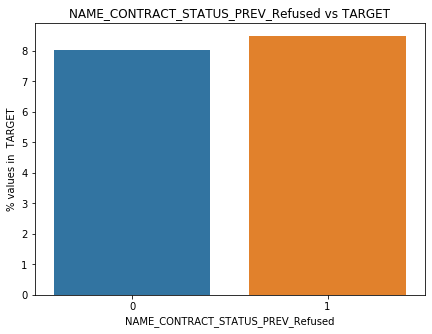

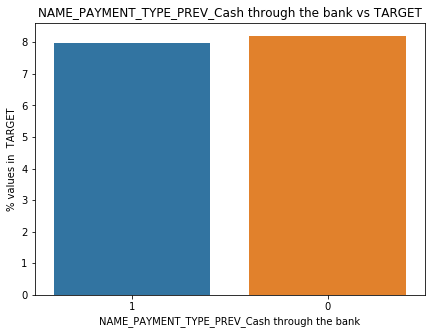

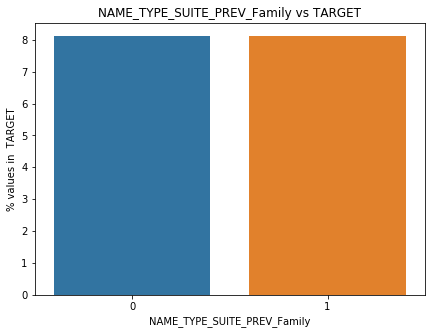

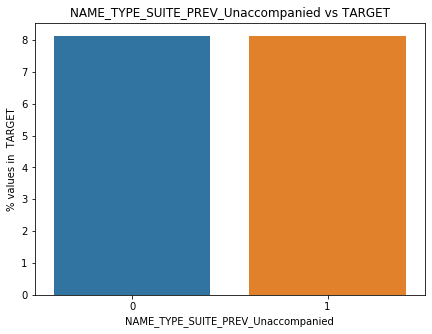

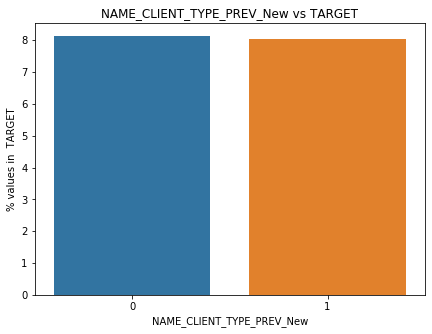

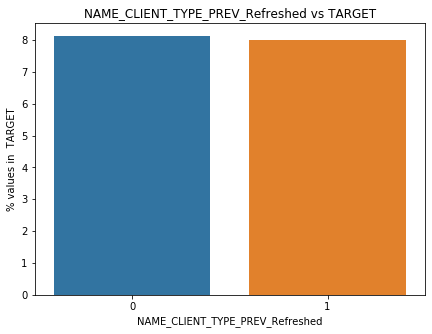

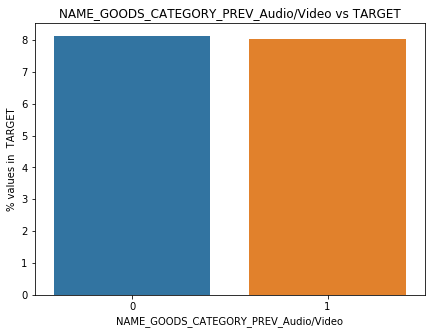

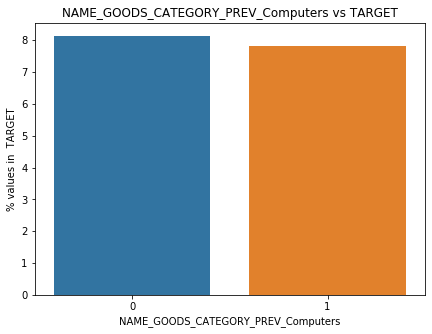

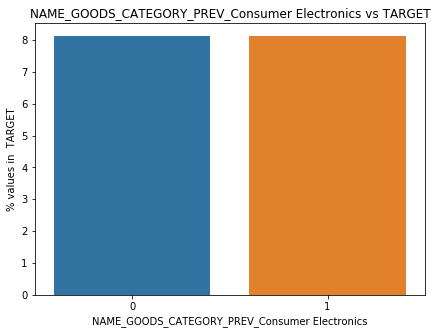

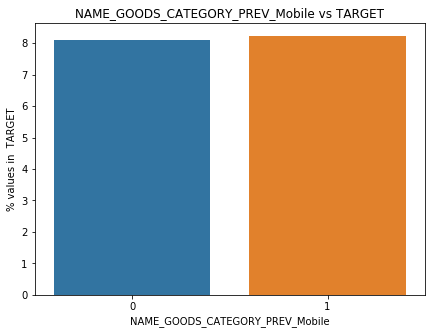

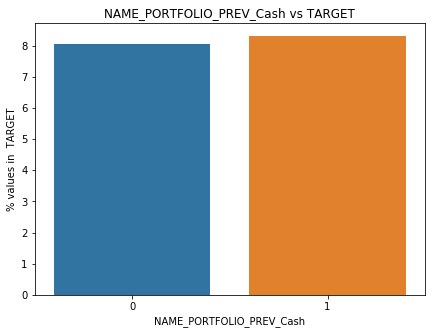

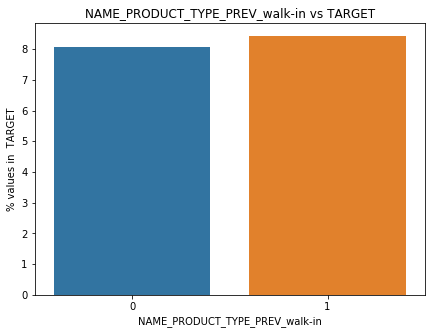

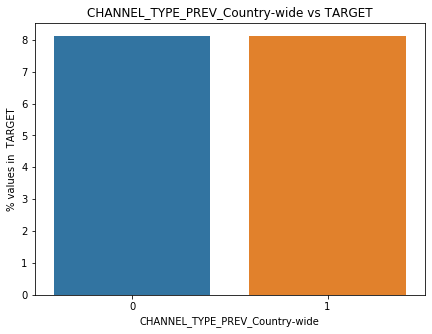

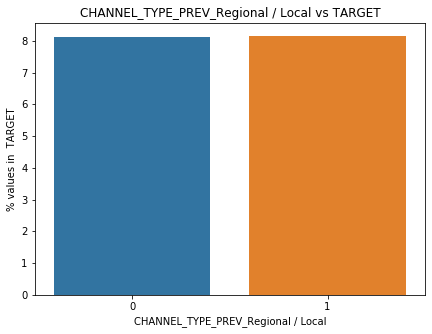

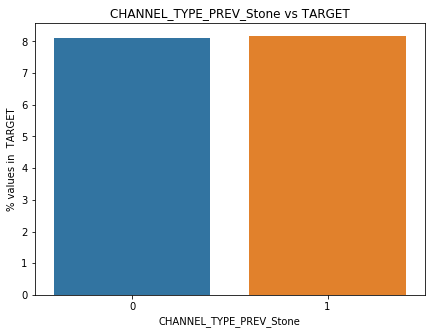

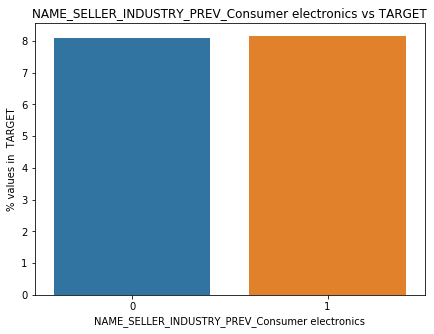

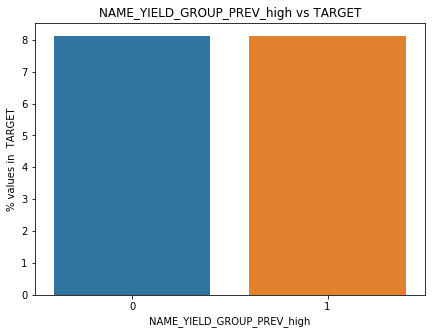

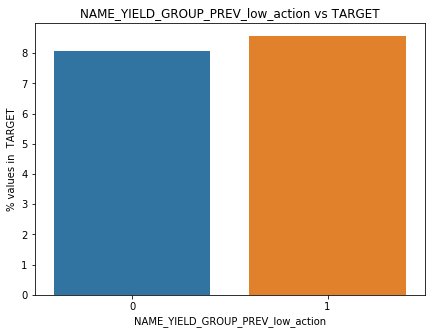

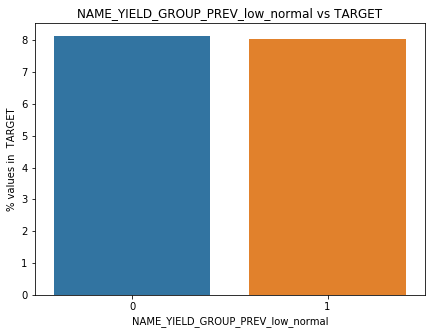

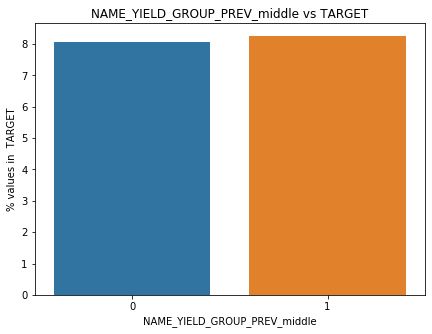

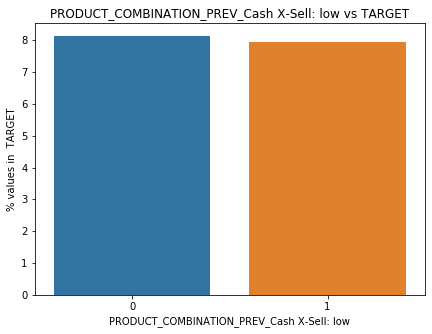

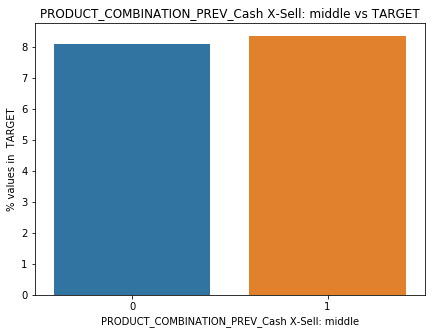

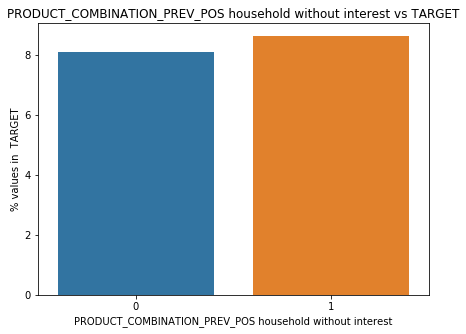

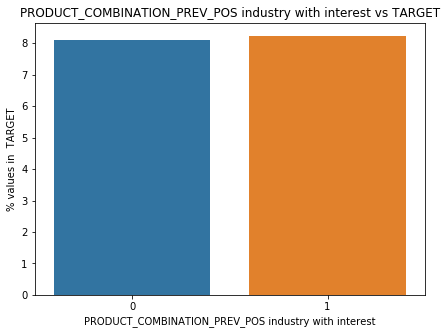

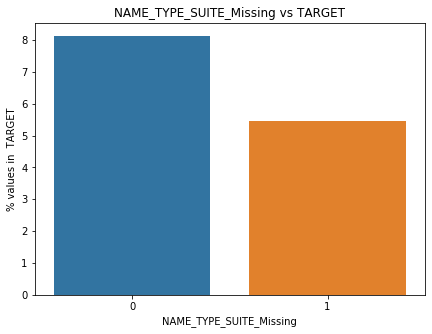

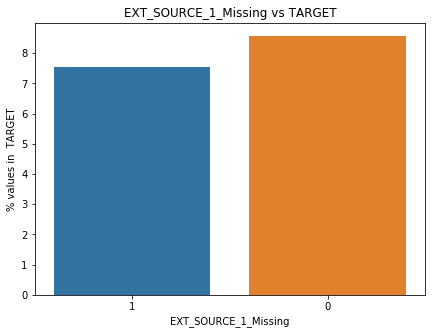

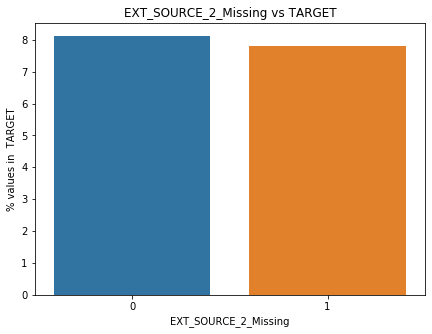

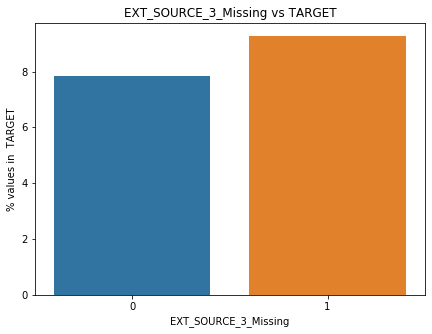

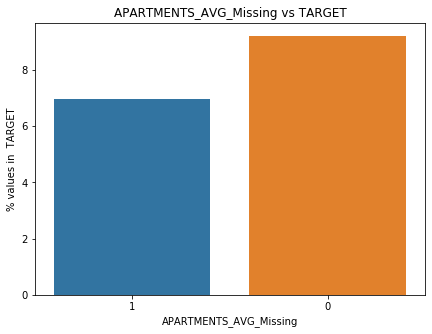

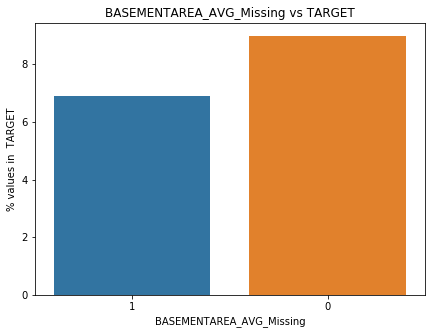

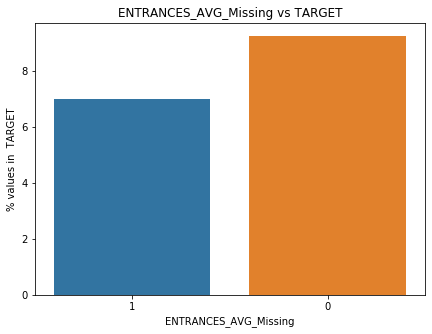

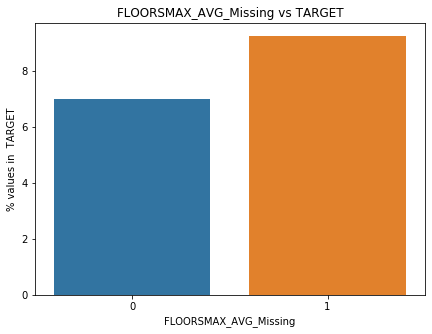

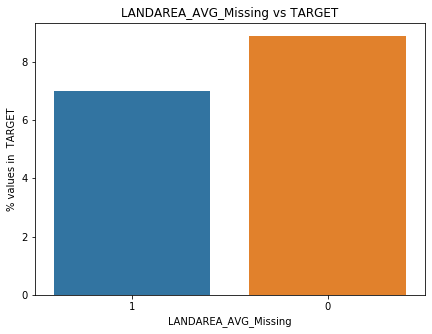

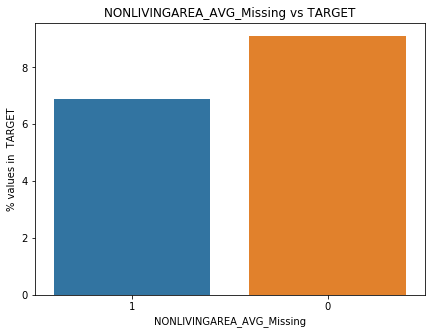

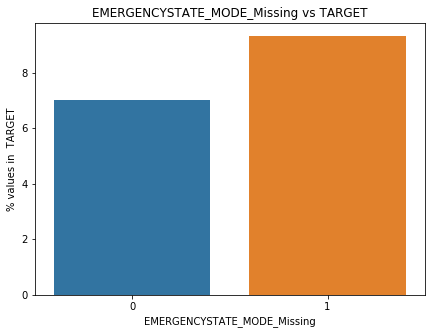

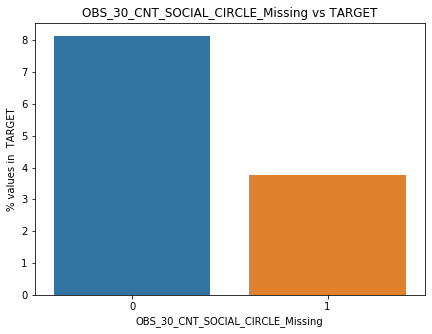

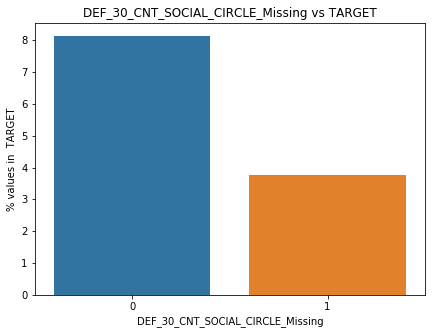

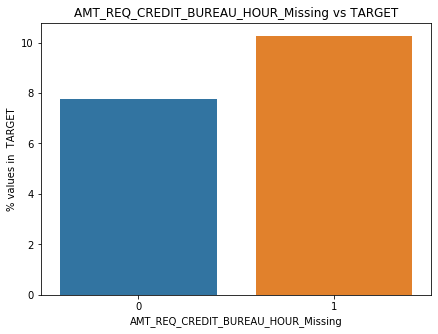

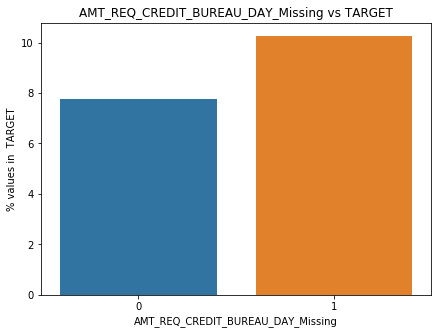

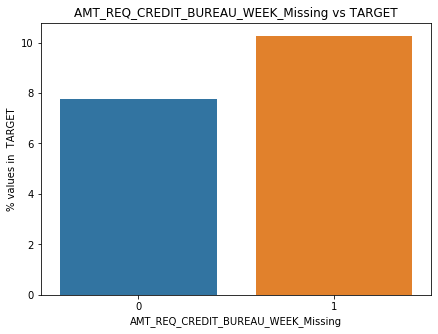

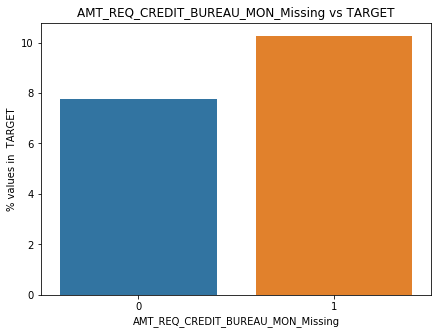

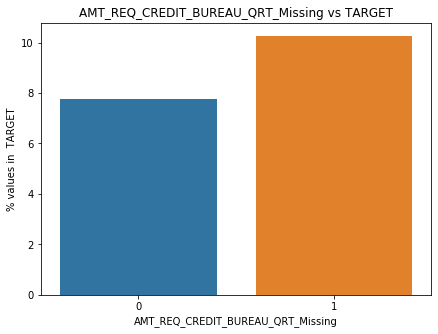

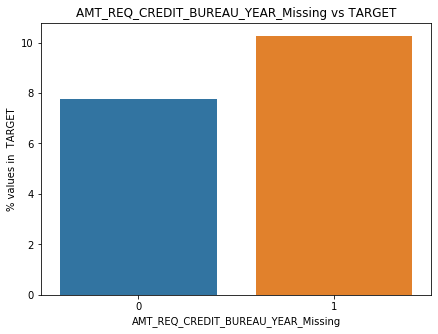

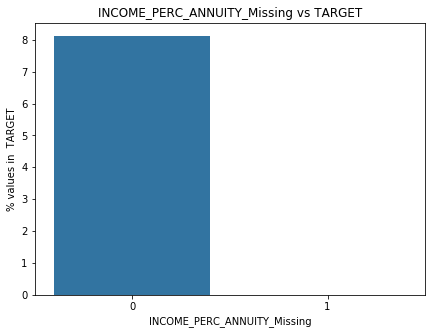

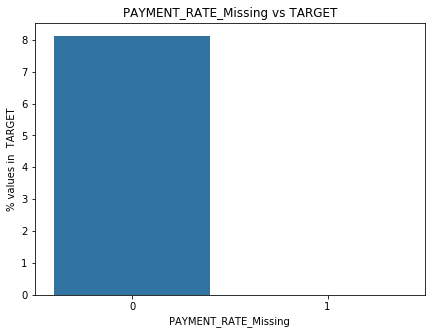

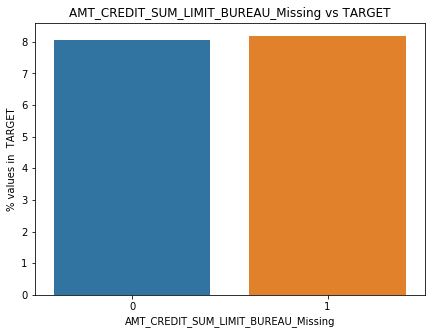

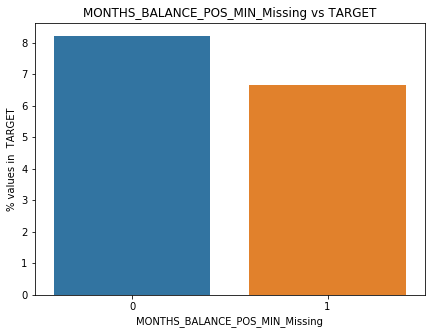

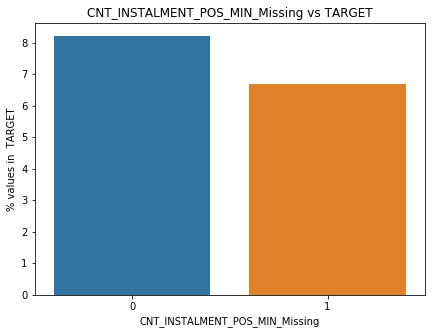

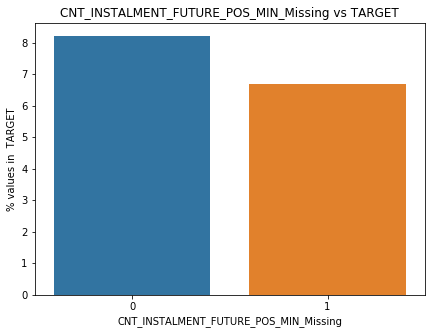

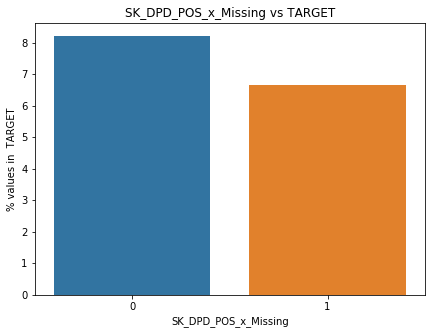

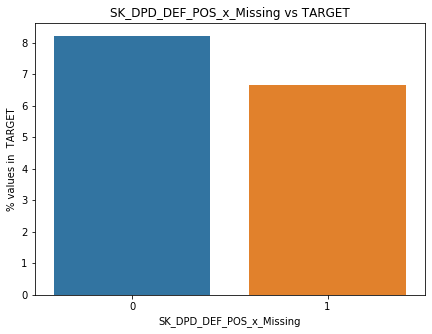

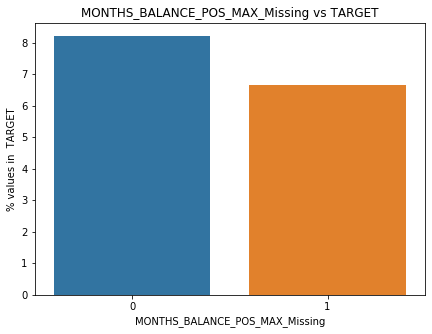

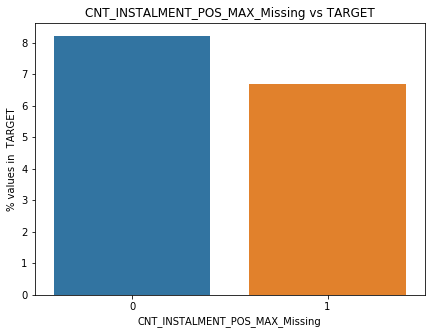

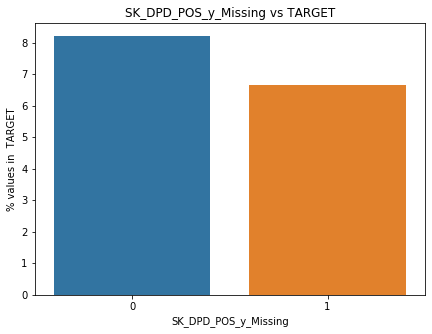

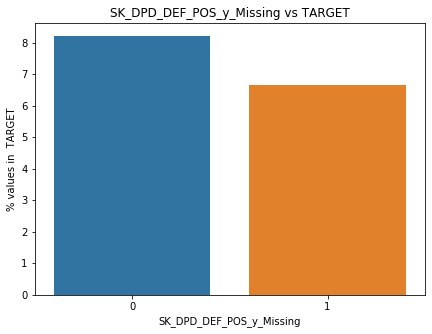

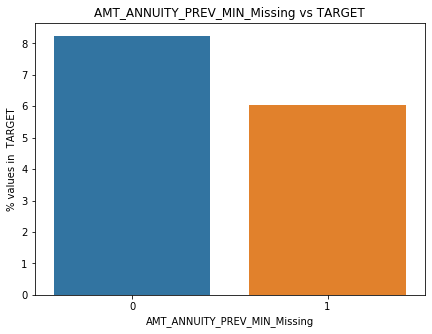

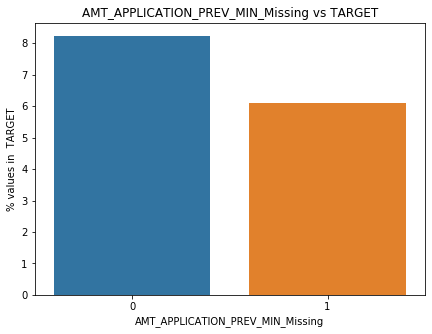

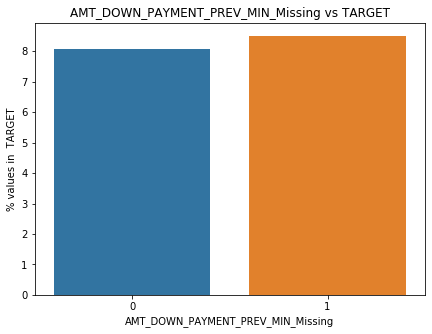

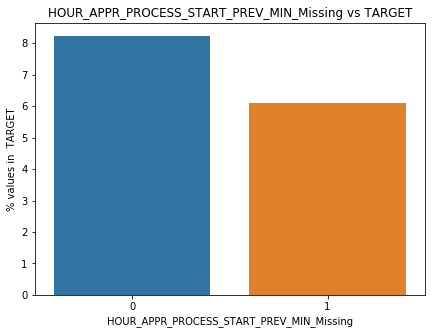

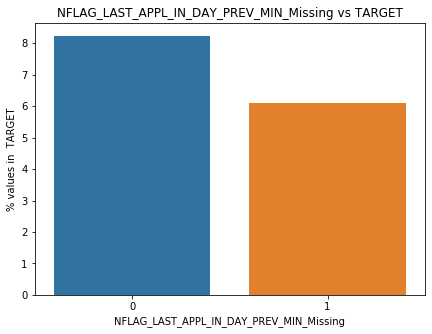

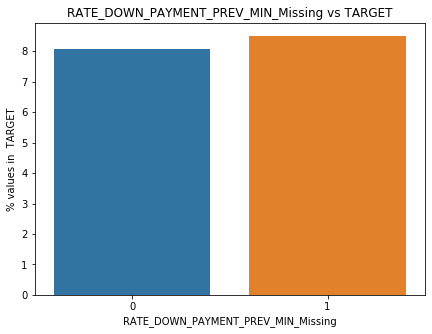

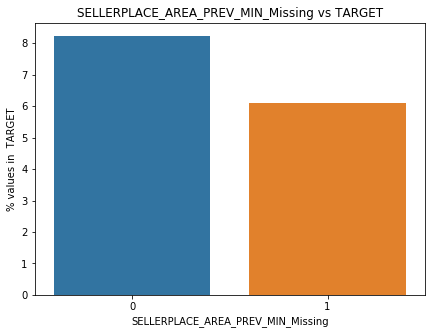

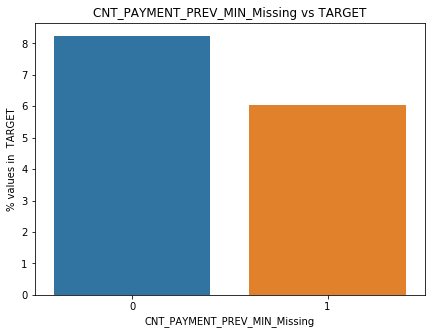

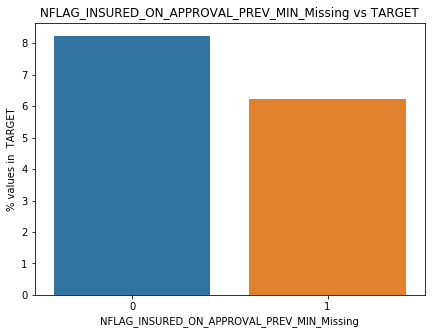

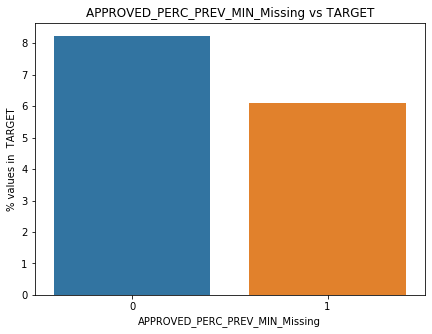

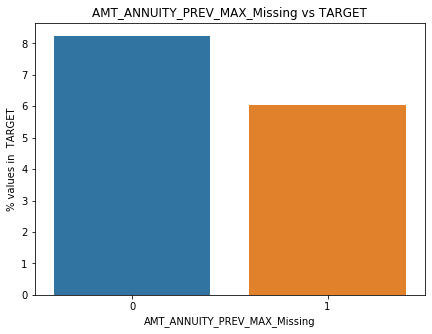

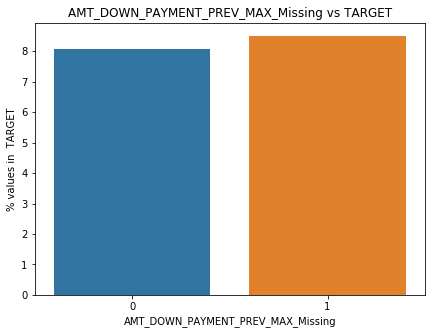

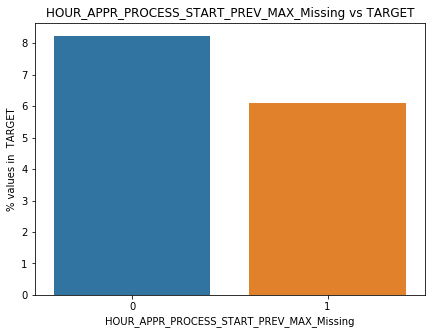

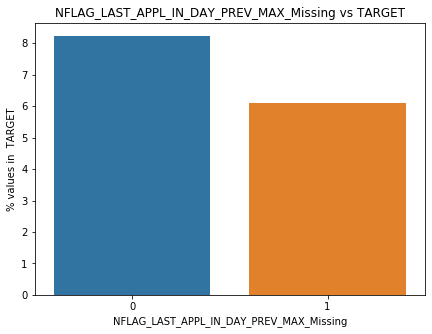

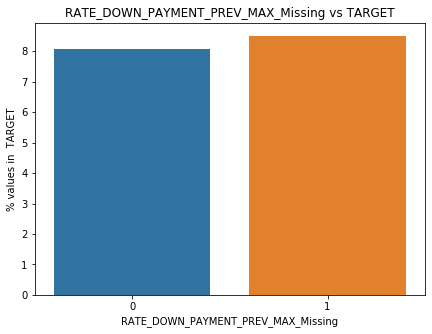

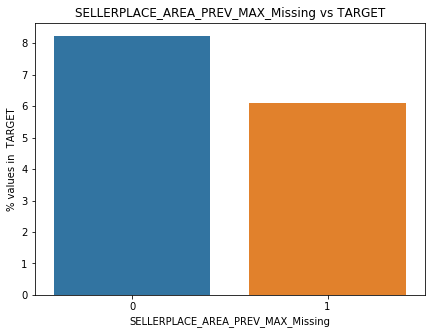

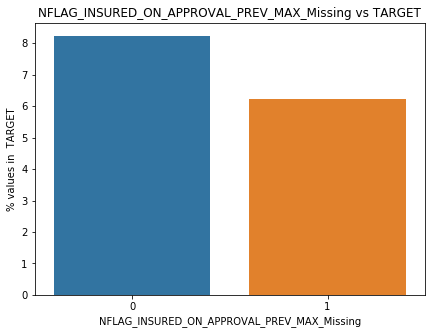

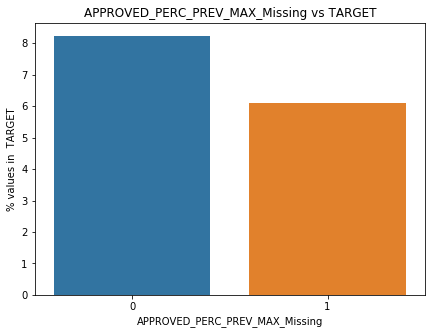

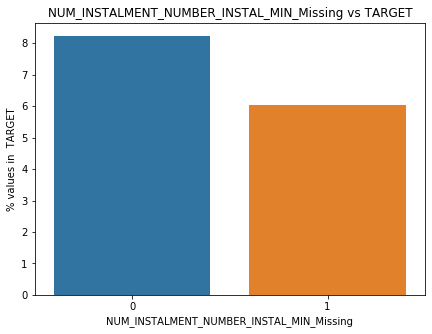

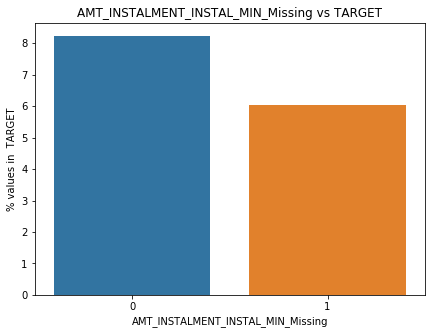

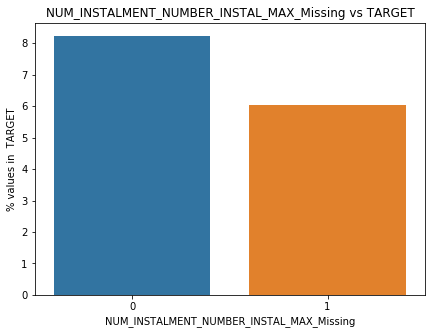

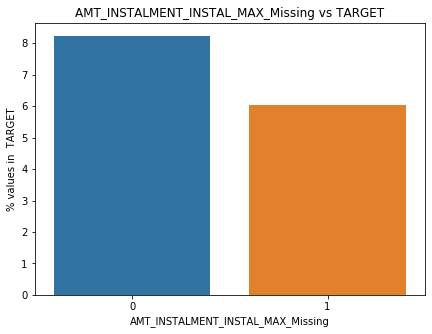

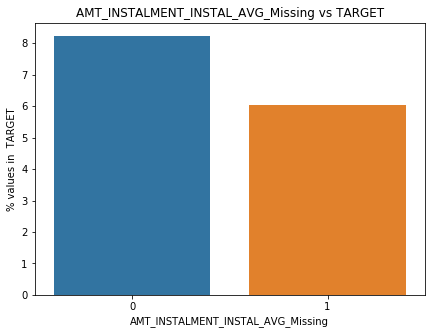

In [87]:
for i in cat+disc:
    if len(train[i].value_counts()) < 10:
        classify_cat_disc_analysis(train, i)

<b>Highest chances of defaulting found in:<br></b>
1. Cash loans in NAME_CONTRACT_TYPE.
2. Males in CODE_GENDER.
3. Those who did not have a car (N) in FLAG_OWN_CAR.
4. Those who did not have a house (N) in FLAG_OWN_REALTY.
5. OTHER_B, Group of people, Other_A, Spouse/partner, Unaccompanied in NAME_TYPE_SUITE.
6. Pensioner and Businessmen in NAME_INCOME_TYPE.
7. Lower secondary, Secondary/secondary special, Incomplete higher special in NAME_EDUCATION_TYPE.
8. Married, Separated in NAME_FAMILY_STATUS.
9. Rented apartment, With parents in NAME_HOUSING_TYPE.
10. <b>WEEKEND_APPR_PROCESS drop this variable.</b>
11. Others, Wooden, Stone/brick in WALLSMATERIAL_MODE.
12. Chances of defaulting increases slightly with increasing number of kids (CNT_CHILDREN).
13. Those who had provided a work phone no. in FLAG_WORK_PHONE.
14. Those who had not provided a personal mobile no. in FLAG_WORK_PHONE.
15. FLAG_EMAIL Those who did not provide an email.
16. 1 and 3 in REGION_RATING_CLIENT.
17. Working far away from home in REG_REGION_NOT_WORK_REGION.
18. Works in a city far away from his home city in REG_CITY_NOT_WORK_CITY.
19. Lives in a city different from contact address in REG_CITY_NOT_LIVE_CITY.
20. Those who did not submit Document 3 in FLAG_DOCUMENT_3.
21. Those who did not submit Document 6 in FLAG_DOCUMENT_6.
22. Those who did not submit Document 8 in FLAG_DOCUMENT_8.
23. Those who submitted a total of 4 documents out of all in NO_OF_DOCS_SUBMITTED.
24. Those who had been previously refused a loan had a higher chance in NAME_CONTRACT_STATUS_PREV_Refused.
25. Those who chose payment method Cash in NAME_PAYMENT_TYPE_PREV_Cash.
26. Those who came to apply for the previous loan with spouse in NAME_TYPE_SUIT_PREV_Spouse,partner.
27. Most of the indicator variables of missing values.


<br>

In [88]:
imp_Cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',\
          'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE', 'CNT_CHILDREN',\
          'FLAG_WORK_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION',\
          'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',\
          'NO_OF_DOCS_SUBMITTED', 'NAME_CONTRACT_STATUS_PREV_Refused', 'NAME_PAYMENT_TYPE_PREV_Cash',\
           'CODE_REJECT_REASON_PREV_HC', 'NAME_TYPE_SUIT_PREV_Spouse,partner', 'NAME_PORTFOLIO_PREV_Cards',\
          'PRODUCT_COMBINATION_PREV_Card X-Sell']

In [89]:
miss_indic = [i for i in train.columns if 'Missing' in i]
miss_indic

['NAME_TYPE_SUITE_Missing',
 'EXT_SOURCE_1_Missing',
 'EXT_SOURCE_2_Missing',
 'EXT_SOURCE_3_Missing',
 'APARTMENTS_AVG_Missing',
 'BASEMENTAREA_AVG_Missing',
 'ENTRANCES_AVG_Missing',
 'FLOORSMAX_AVG_Missing',
 'LANDAREA_AVG_Missing',
 'NONLIVINGAREA_AVG_Missing',
 'EMERGENCYSTATE_MODE_Missing',
 'OBS_30_CNT_SOCIAL_CIRCLE_Missing',
 'DEF_30_CNT_SOCIAL_CIRCLE_Missing',
 'AMT_REQ_CREDIT_BUREAU_HOUR_Missing',
 'AMT_REQ_CREDIT_BUREAU_DAY_Missing',
 'AMT_REQ_CREDIT_BUREAU_WEEK_Missing',
 'AMT_REQ_CREDIT_BUREAU_MON_Missing',
 'AMT_REQ_CREDIT_BUREAU_QRT_Missing',
 'AMT_REQ_CREDIT_BUREAU_YEAR_Missing',
 'INCOME_PERC_ANNUITY_Missing',
 'PAYMENT_RATE_Missing',
 'AMT_CREDIT_SUM_LIMIT_BUREAU_Missing',
 'MONTHS_BALANCE_POS_MIN_Missing',
 'CNT_INSTALMENT_POS_MIN_Missing',
 'CNT_INSTALMENT_FUTURE_POS_MIN_Missing',
 'SK_DPD_POS_x_Missing',
 'SK_DPD_DEF_POS_x_Missing',
 'MONTHS_BALANCE_POS_MAX_Missing',
 'CNT_INSTALMENT_POS_MAX_Missing',
 'SK_DPD_POS_y_Missing',
 'SK_DPD_DEF_POS_y_Missing',
 'AMT_ANNU


<br>

### Missing values:

In [90]:
b = train.isna().sum()
missing = b[b>0].index.tolist()
missing

['NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAREA_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'INCOME_PERC_ANNUITY',
 'PAYMENT_RATE',
 'AMT_CREDIT_SUM_LIMIT_BUREAU',
 'MONTHS_BALANCE_POS_MIN',
 'CNT_INSTALMENT_POS_MIN',
 'CNT_INSTALMENT_FUTURE_POS_MIN',
 'SK_DPD_POS_x',
 'SK_DPD_DEF_POS_x',
 'MONTHS_BALANCE_POS_MAX',
 'CNT_INSTALMENT_POS_MAX',
 'SK_DPD_POS_y',
 'SK_DPD_DEF_POS_y',
 'AMT_ANNUITY_PREV_MIN',
 'AMT_APPLICATION_PREV_MIN',
 'AMT_DOWN_PAYMENT_PREV_MIN',
 'HOUR_APPR_PROCESS_START_PREV_MIN',
 'NFLAG_LAST_APPL_IN_DAY_PREV_MIN',
 'RATE_DOWN_PAYMENT_PREV_MIN',
 'SELLERPLACE_AREA_PREV_MIN',
 'CNT_PAYMENT_PR

In [91]:
print( np.ceil(len(missing)/len(data.columns)*100),'% of the variables have missing values')

32.0 % of the variables have missing values


In [92]:
missing_cat = list(set(missing).intersection(set(cat+disc)))
missing_cat

['NAME_TYPE_SUITE']

In [93]:
missing_num = list(set(missing).intersection(set(cont)))
missing_num

['EXT_SOURCE_1',
 'APPROVED_PERC_PREV_MAX',
 'CNT_PAYMENT_PREV_MIN',
 'OWN_CAR_AGE',
 'INCOME_PERC_ANNUITY',
 'YEARS_BEGINEXPLUATATION_AVG',
 'SK_DPD_DEF_POS_x',
 'MONTHS_BALANCE_POS_MAX',
 'AMT_APPLICATION_PREV_MIN',
 'NUM_INSTALMENT_NUMBER_INSTAL_MAX',
 'RATE_DOWN_PAYMENT_PREV_MAX',
 'AMT_ANNUITY_PREV_MIN',
 'YEARS_FIRST_DUE_PREV_MIN',
 'CNT_INSTALMENT_POS_MIN',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'SK_DPD_POS_y',
 'YEARS_LAST_DUE_1ST_VERSION_PREV_MIN',
 'AMT_CREDIT_SUM_LIMIT_BUREAU',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'APPROVED_PERC_PREV_MIN',
 'NFLAG_LAST_APPL_IN_DAY_PREV_MIN',
 'CNT_INSTALMENT_POS_MAX',
 'AMT_INSTALMENT_INSTAL_MAX',
 'APARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'NUM_INSTALMENT_NUMBER_INSTAL_MIN',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'SK_DPD_DEF_POS_y',
 'YEARS_LAST_DUE_PREV_MIN',
 'CNT_INSTALMENT_FUTURE_POS_MIN',
 'HOUR_APPR_PROCESS_START_PREV_MAX',
 'HOUR_APPR_PROCESS_START_PREV_MIN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'SK_DPD_POS_x',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'AMT_DOWN_PAYM

In [94]:
for i in missing_num:
    print(i)
    print(train[i].quantile(0.5))
    print('\n')

EXT_SOURCE_1
0.5049240583755656


APPROVED_PERC_PREV_MAX
1.1055605381165918


CNT_PAYMENT_PREV_MIN
6.0


OWN_CAR_AGE
-1.0


INCOME_PERC_ANNUITY
0.16290909090909092


YEARS_BEGINEXPLUATATION_AVG
0.9816


SK_DPD_DEF_POS_x
0.0


MONTHS_BALANCE_POS_MAX
-4.0


AMT_APPLICATION_PREV_MIN
18328.5


NUM_INSTALMENT_NUMBER_INSTAL_MAX
12.0


RATE_DOWN_PAYMENT_PREV_MAX
0.10526525406825867


AMT_ANNUITY_PREV_MIN
5722.92


YEARS_FIRST_DUE_PREV_MIN
3.967123287671233


CNT_INSTALMENT_POS_MIN
6.0


AMT_REQ_CREDIT_BUREAU_YEAR
1.0


SK_DPD_POS_y
0.0


YEARS_LAST_DUE_1ST_VERSION_PREV_MIN
2.978082191780822


AMT_CREDIT_SUM_LIMIT_BUREAU
0.0


AMT_REQ_CREDIT_BUREAU_DAY
0.0


APPROVED_PERC_PREV_MIN
0.6793627540743453


NFLAG_LAST_APPL_IN_DAY_PREV_MIN
1.0


CNT_INSTALMENT_POS_MAX
12.0


AMT_INSTALMENT_INSTAL_MAX
35197.177500000005


APARTMENTS_AVG
0.0876


NONLIVINGAREA_AVG
0.0036


NUM_INSTALMENT_NUMBER_INSTAL_MIN
1.0


AMT_REQ_CREDIT_BUREAU_HOUR
0.0


SK_DPD_DEF_POS_y
0.0


YEARS_LAST_DUE_PREV_MIN
3.1410958904

In [95]:
def impute(df_tr, df_te, miss_cat, miss_num, miss):
    for col_name in miss:
#         print(col_name)
        if col_name in miss_cat:
            mode = df_tr[col_name].value_counts().index[0]
#             print(mode)
            df_tr[col_name].fillna(mode, inplace=True)
            df_te[col_name].fillna(mode, inplace=True)
            
        elif col_name in miss_num:
            median = np.quantile(df_tr[col_name].dropna(), 0.5)
#             print(median)
            df_tr[col_name].fillna(median, inplace=True)
            df_te[col_name].fillna(median, inplace=True)
        
    return df_tr, df_te

In [96]:
train, test = impute(train, test, missing_cat, missing_num, missing)

In [97]:
train.isna().sum().any(), test.isna().sum().any()

(False, True)

 
 <br>

SK_DPD_DEF_POS_x


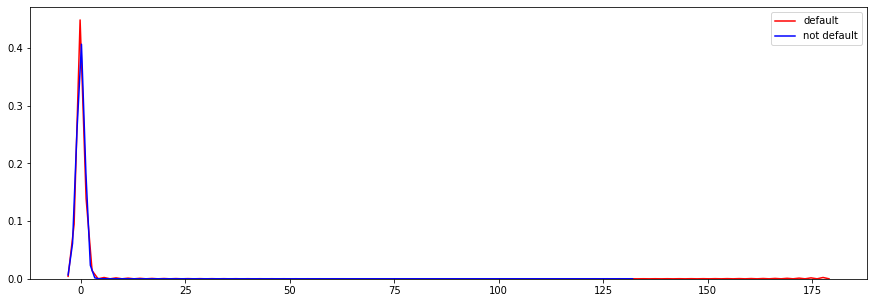

AMT_INCOME_TOTAL


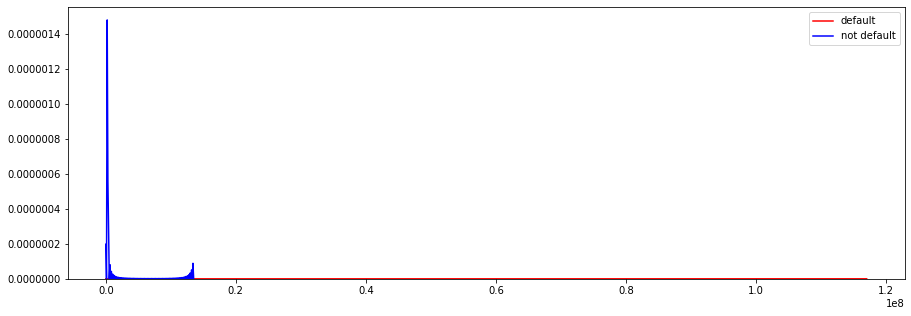

SELLERPLACE_AREA_PREV_MIN


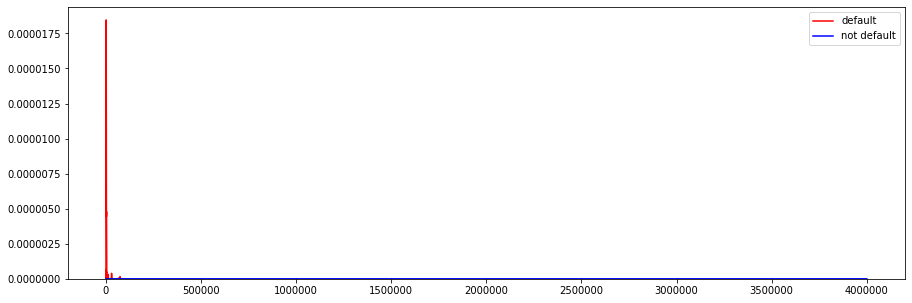

SELLERPLACE_AREA_PREV_MAX


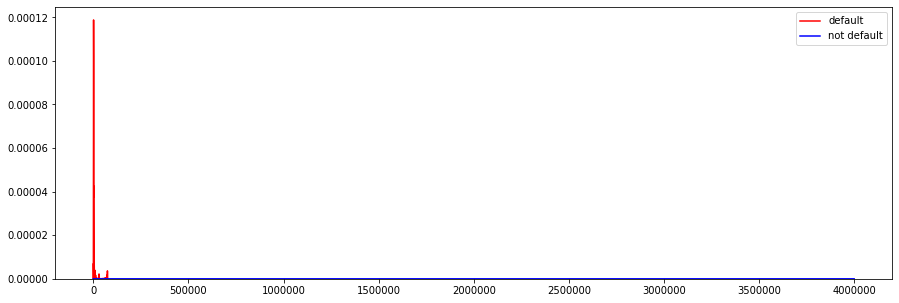

AMT_REQ_CREDIT_BUREAU_QRT


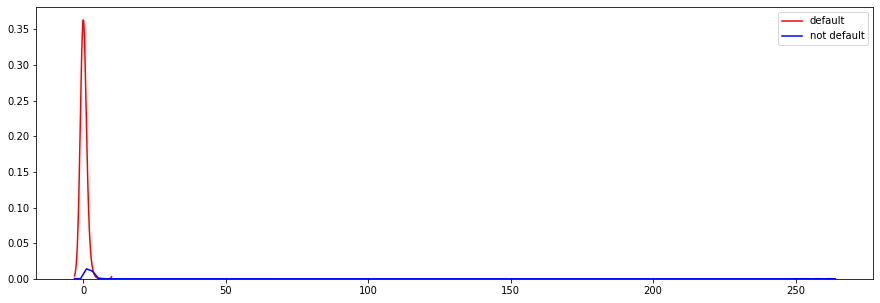

SK_DPD_POS_x


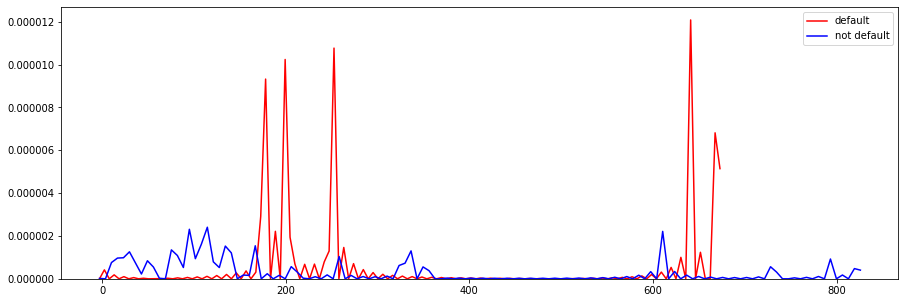

DEBT_RATE_BUREAU


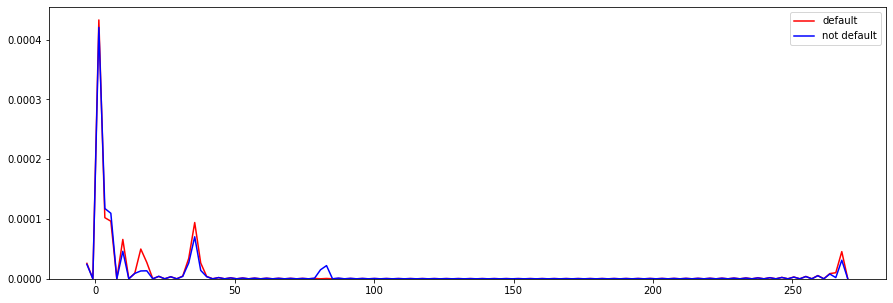

SK_DPD_DEF_POS_y


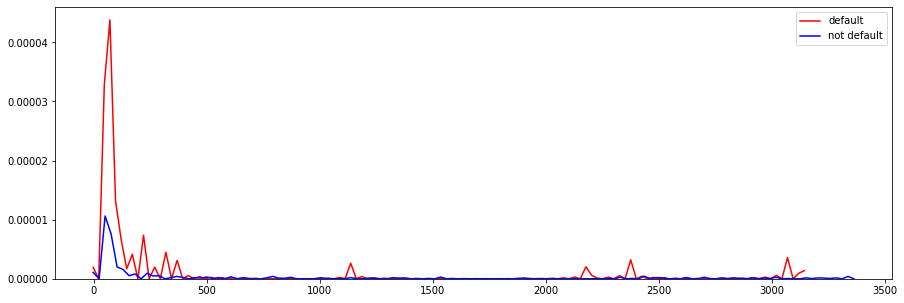

NFLAG_LAST_APPL_IN_DAY_PREV_MAX


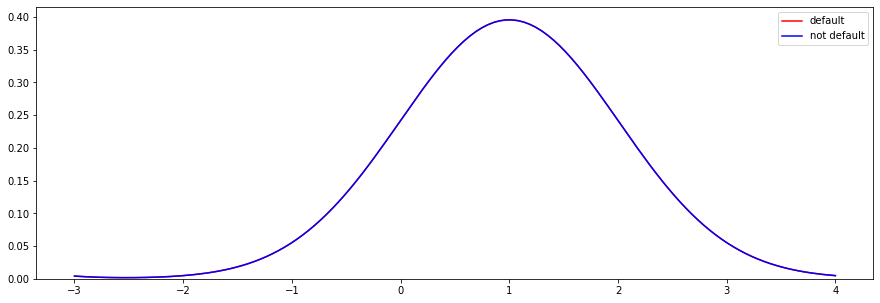

AMT_INSTALMENT_INSTAL_MIN


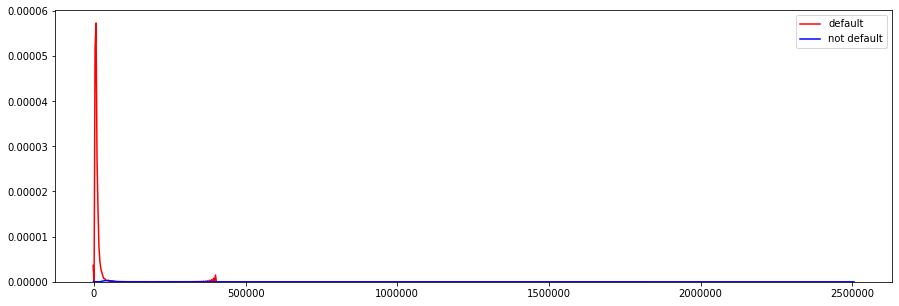

AMT_DOWN_PAYMENT_PREV_MIN


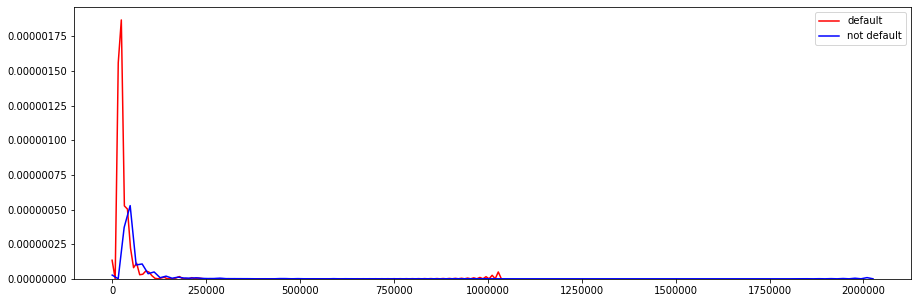

In [98]:
def outlier_analysis(df_tr, skew, target):
    for col_name in skew:
#         print(col_name)
        q1 = np.quantile(df_tr[col_name].dropna(), 0.25)
        q3 = np.quantile(df_tr[col_name].dropna(), 0.75)
        iqr = q3-q1
        lower = df_tr.loc[ df_tr[col_name] < q1 - 3*iqr, col_name]
        upper = df_tr.loc[ df_tr[col_name] > q3 + 3*iqr, col_name]
        normal = df_tr.loc[ (df_tr[col_name] < q3 + 3*iqr) & (df_tr[col_name] > q1 - 3*iqr), col_name]
        
        classify_cont_analysis(train,[col_name], target)
        
#         print('Mean of the vales below lower bound : ', lower.mean())
#         print('Mean of the regular values : ', normal.mean())
#         print('Mean of the vales above upper bound : ', upper.mean())
#         print('='*90)
#         plt.figure(figsize=(20,7))
#         sns.kdeplot(lower, color='red', label='lower outliers')
#         sns.kdeplot(normal, color='blue', label='regular data')
#         sns.kdeplot(upper, color='black', label='upper outliers')
#         plt.show()
        
outlier_analysis(train, skewed, 'TARGET')

The outliers seem to be carrying some meaning with respect to the target variable.



<br>

In [99]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
55035       163770       0    Revolving loans           F            N   
147994      271600       0         Cash loans           M            Y   
202059      334226       0    Revolving loans           M            Y   
275032      418769       0         Cash loans           M            Y   
173399      300944       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
55035                Y             0          225000.0    405000.0   
147994               Y             0          189000.0    675000.0   
202059               Y             0          157500.0    180000.0   
275032               Y             0          292500.0   1024740.0   
173399               Y             0           76500.0    384048.0   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
55035    Unaccompanied  Commercial associate               Higher education   
147994   Unaccompanied  Commercial associate  Secondary / secondary special   
202059   Unaccompanied               Working  Secondary / secondary special   
275032   Unaccompanied         State servant               Higher education   
173399   Unaccompanied               Working               Higher education   

       NAME_FAMILY_STATUS  REGION_POPULATION_RELATIVE  YEARS_BIRTH  \
55035             Married                    0.019689    56.463014   
147994            Married                    0.022800    35.660274   
202059     Civil marriage                    0.006671    25.230137   
275032            Married                    0.019689    37.216438   
173399            Married                    0.031329    36.432877   

        YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  OWN_CAR_AGE  \
55035         7.698630            7.635616         10.627397         -1.0   
147994        5.934247            1.750685          9.136986         12.0   
202059        1.945205            1.578082          4.391781         18.0   
275032        5.449315            3.652055         12.838356          6.0   
173399        1.068493            4.421918          9.435616         13.0   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  \
55035                 1           1           0                     2   
147994                0           0           0                     2   
202059                0           0           0                     2   
275032                1           0           1                     2   
173399                0           0           0                     2   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
55035                        13                           0   
147994                        8                           1   
202059                       14                           0   
275032                       14                           0   
173399                       13                           0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
55035                        0                       0      0.504924   
147994                       0                       1      0.614000   
202059                       0                       0      0.311040   
275032                       0                       0      0.504924   
173399                       0                       0      0.381958   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
55035       0.630230      0.130947          0.1608            0.1162   
147994      0.021272      0.126898          0.0876            0.0763   
202059      0.331401      0.276441          0.0876            0.0763   
275032      0.457376      0.740799          0.0619            0.0763   
173399      0.595265      0.535276          0.0876            0.0763   

        YEARS_BEGINEXPLUATATION_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  \
55035                        0

In [100]:
binarize = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for i in binarize:
    train[i] = [1 if i=='Y' else 0 for i in train[i]]
    test[i] = [1 if i=='Y' else 0 for i in test[i]]
    
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
55035       163770       0    Revolving loans           F             0   
147994      271600       0         Cash loans           M             1   
202059      334226       0    Revolving loans           M             1   
275032      418769       0         Cash loans           M             1   
173399      300944       0         Cash loans           F             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
55035                 1             0          225000.0    405000.0   
147994                1             0          189000.0    675000.0   
202059                1             0          157500.0    180000.0   
275032                1             0          292500.0   1024740.0   
173399                1             0           76500.0    384048.0   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
55035    Unaccompanied  Commercial associate               Higher education   
147994   Unaccompanied  Commercial associate  Secondary / secondary special   
202059   Unaccompanied               Working  Secondary / secondary special   
275032   Unaccompanied         State servant               Higher education   
173399   Unaccompanied               Working               Higher education   

       NAME_FAMILY_STATUS  REGION_POPULATION_RELATIVE  YEARS_BIRTH  \
55035             Married                    0.019689    56.463014   
147994            Married                    0.022800    35.660274   
202059     Civil marriage                    0.006671    25.230137   
275032            Married                    0.019689    37.216438   
173399            Married                    0.031329    36.432877   

        YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  OWN_CAR_AGE  \
55035         7.698630            7.635616         10.627397         -1.0   
147994        5.934247            1.750685          9.136986         12.0   
202059        1.945205            1.578082          4.391781         18.0   
275032        5.449315            3.652055         12.838356          6.0   
173399        1.068493            4.421918          9.435616         13.0   

        FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  REGION_RATING_CLIENT  \
55035                 1           1           0                     2   
147994                0           0           0                     2   
202059                0           0           0                     2   
275032                1           0           1                     2   
173399                0           0           0                     2   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
55035                        13                           0   
147994                        8                           1   
202059                       14                           0   
275032                       14                           0   
173399                       13                           0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
55035                        0                       0      0.504924   
147994                       0                       1      0.614000   
202059                       0                       0      0.311040   
275032                       0                       0      0.504924   
173399                       0                       0      0.381958   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
55035       0.630230      0.130947          0.1608            0.1162   
147994      0.021272      0.126898          0.0876            0.0763   
202059      0.331401      0.276441          0.0876            0.0763   
275032      0.457376      0.740799          0.0619            0.0763   
173399      0.595265      0.535276          0.0876            0.0763   

        YEARS_BEGINEXPLUATATION_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  \
55035             


<br>


In [101]:
train.to_csv('pre-processed_train.csv')

In [102]:
test.to_csv('pre-processed_test.csv')

In [103]:
train.shape, test.shape

((214866, 185), (92086, 185))